In [1]:
from simulation import get_agent_working_result, estimate_results, Generator_of_desired_PR
import matplotlib.pyplot as plt
from network_arch import Agent
import numpy as np

In [2]:
agent = Agent()


In [3]:

def apply_solution(solution, Generator_of_desired_PR = Generator_of_desired_PR):

    agent.updateParams(solution)

    [total_Production_in_dinamics,
     desired_total_Production_in_dinamics,
     Production_Error_in_dinamics,

     total_cost_of_work_for_elecs,
     total_run_out_for_elecs,

     Outs,
     Temperatures,
     States,
     Targets,
     switch_nums_for_elecs,
     Control_signals,

     Output_derivative_for_elecs,
     Output_dderivative_for_elecs] = get_agent_working_result(agent)

    return [Production_Error_in_dinamics, total_run_out_for_elecs, switch_nums_for_elecs,
            total_Production_in_dinamics, desired_total_Production_in_dinamics, Control_signals]


In [4]:
param_count = 0
for param in agent.model.parameters():
  print(param.data.shape)
  param_count += np.product(param.data.shape)
print(param_count)

torch.Size([50, 99])
torch.Size([50])
torch.Size([50, 50])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])
8060


In [5]:
random_solution = np.random.rand(8060,1) * 6 - 3

In [6]:
import pickle

In [7]:
file_params = open('serialised_data_CMAES_MarkovDelta_t/best_params.pkl', 'rb')
best_params = pickle.load(file_params)
file_params.close()

In [8]:
%%time

[Production_Error_in_dinamics, total_run_out_for_elecs, switch_nums_for_elecs,
            total_Production_in_dinamics, desired_total_Production_in_dinamics, Control_signals] = apply_solution(best_params)

[neg_J, RMSE, mean_error, asymetric_error, max_total_run_out, run_out_deviation_RMSE] = estimate_results([Production_Error_in_dinamics, total_run_out_for_elecs])

print('=========================== SCORE')
print('neg_J = ' + str(neg_J))
print('RMSE = ' + str(RMSE))
print('mean_error = ' + str(mean_error))
print('asymetric_error = ' + str(asymetric_error))
print('max_total_run_out = ' + str(max_total_run_out))
#print(min_max_tot_run_out)
print('run_out_deviation_RMSE = ' + str(run_out_deviation_RMSE))
print("switc num = ", end=' ')
print(switch_nums_for_elecs)
print(sum(switch_nums_for_elecs))

# base
# neg_J = -14.132410933053999
# RMSE = 37.3001497605948
# mean_error = 14.063624773919313
# asymetric_error = 10.617351519001677
# max_total_run_out = 34189.499999999935
# run_out_deviation_RMSE = 6755.2850537612885
# switc num =  [6 4 4 4 2]
# 20

# best params
# neg_J = -80.5848114579245
# RMSE = 161.8310687186569
# mean_error = -124.20570511071216
# asymetric_error = 154.27067204773428
# max_total_run_out = 45870.19999997473
# run_out_deviation_RMSE = 13197.621639054027
# switc num =  [1 4 3 1 8]
# 17



=========================== SCORE
neg_J = -47.370364729744296
RMSE = 149.74347349982082
mean_error = 10.0482664456318
asymetric_error = 7.033093047914159
max_total_run_out = 39410.6999999892
run_out_deviation_RMSE = 12624.50351077173
switc num =  [3 7 3 1 7]
21
CPU times: user 1.59 s, sys: 10.8 ms, total: 1.6 s
Wall time: 1.6 s


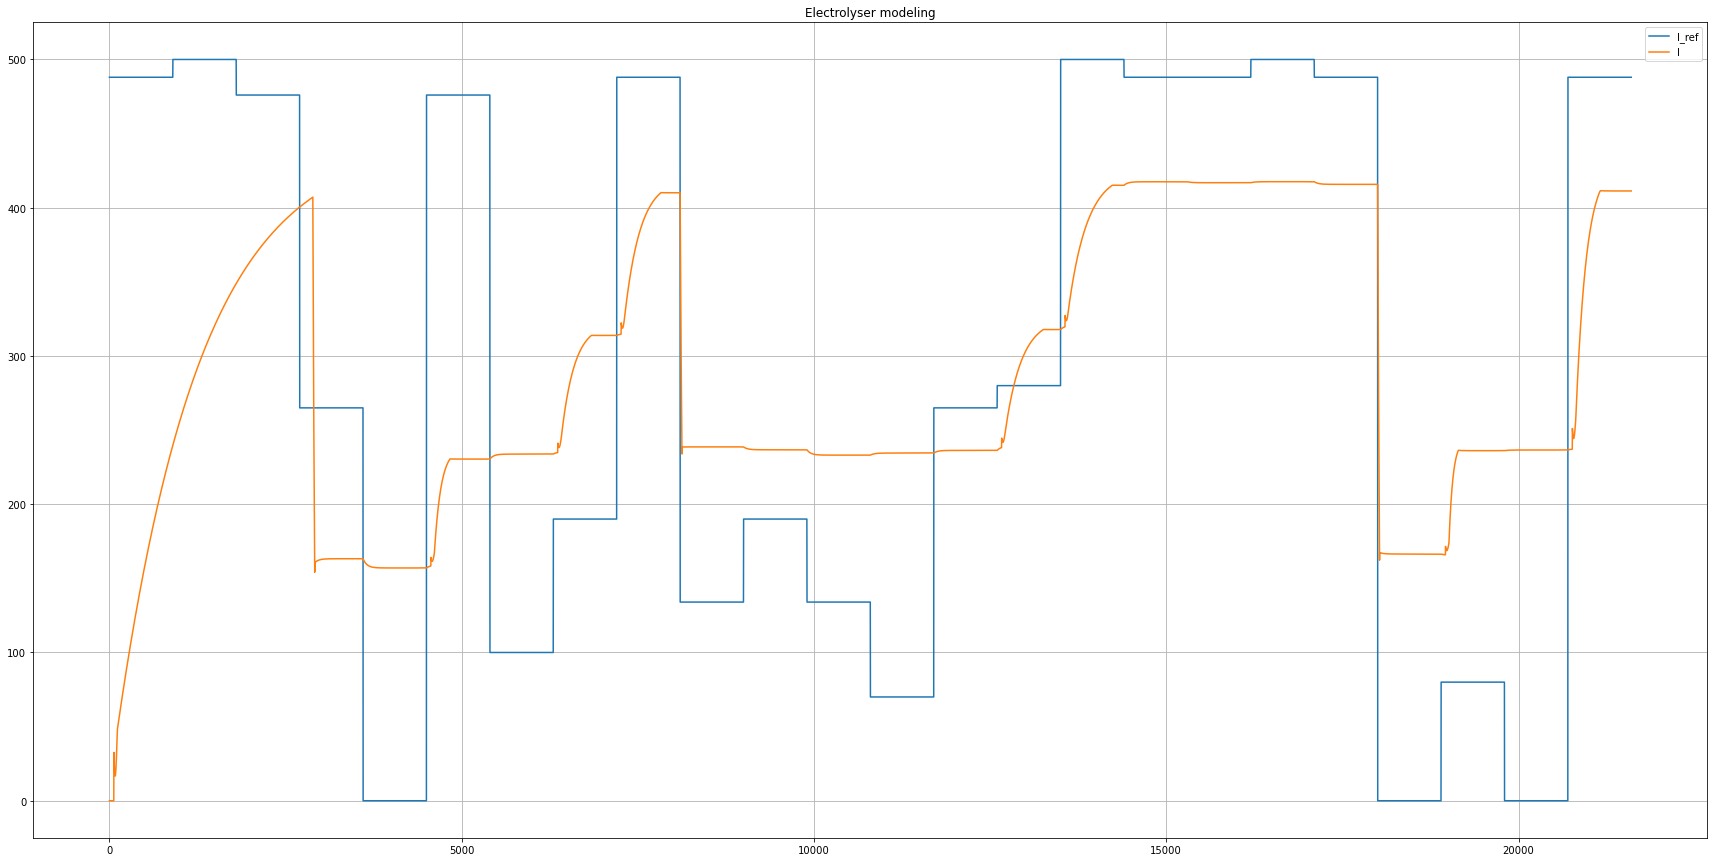

In [9]:
plt.figure(figsize=(30, 15))
plt.title("Electrolyser modeling")
plt.plot(desired_total_Production_in_dinamics, label='I_ref')
plt.plot(total_Production_in_dinamics, label='I')

plt.legend()
plt.grid(visible=True)
# сколько недозапасли от дневного потребления
# 15%

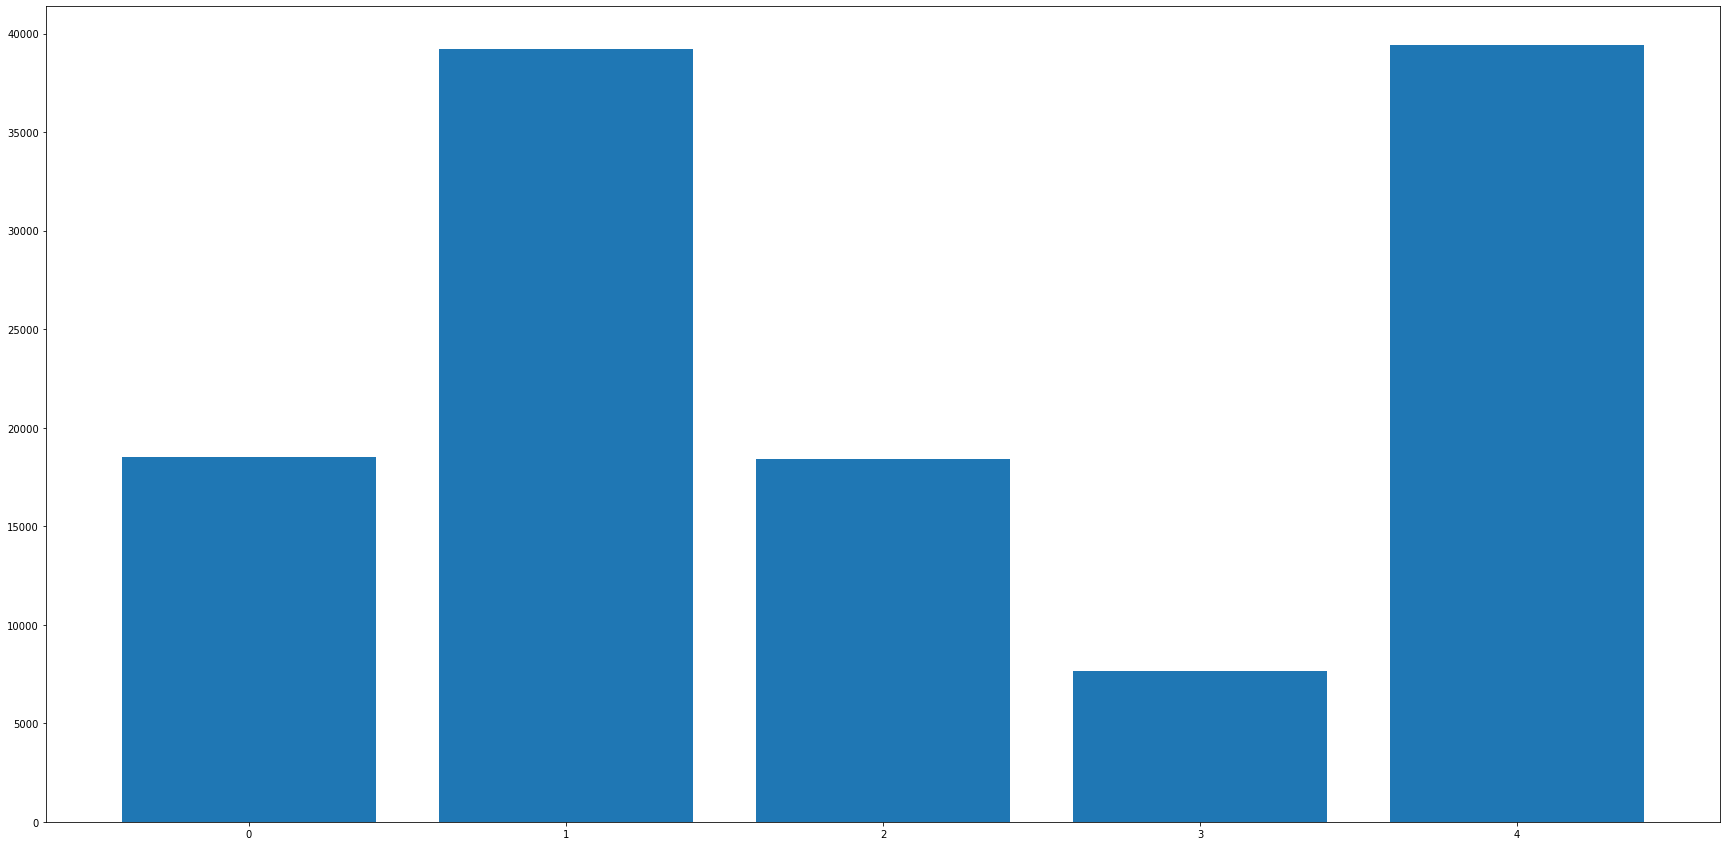

In [10]:
num_elecs = 5
names = list(range(num_elecs))
values = total_run_out_for_elecs

plt.figure(figsize=(30, 15))
plt.bar(names, values)
plt.show()

In [11]:
def asymetric_plus(x, a, b):

    return (np.log(1 + np.e**(x)) * a)**2 + (np.log(1 + np.e**(-x)) / b)**2


In [12]:
print(asymetric_plus(-117/10, 2, 1))
print(asymetric_plus(40/10, 2, 1))

136.89019407490747
64.58244479278702


In [13]:
# from simulation import *


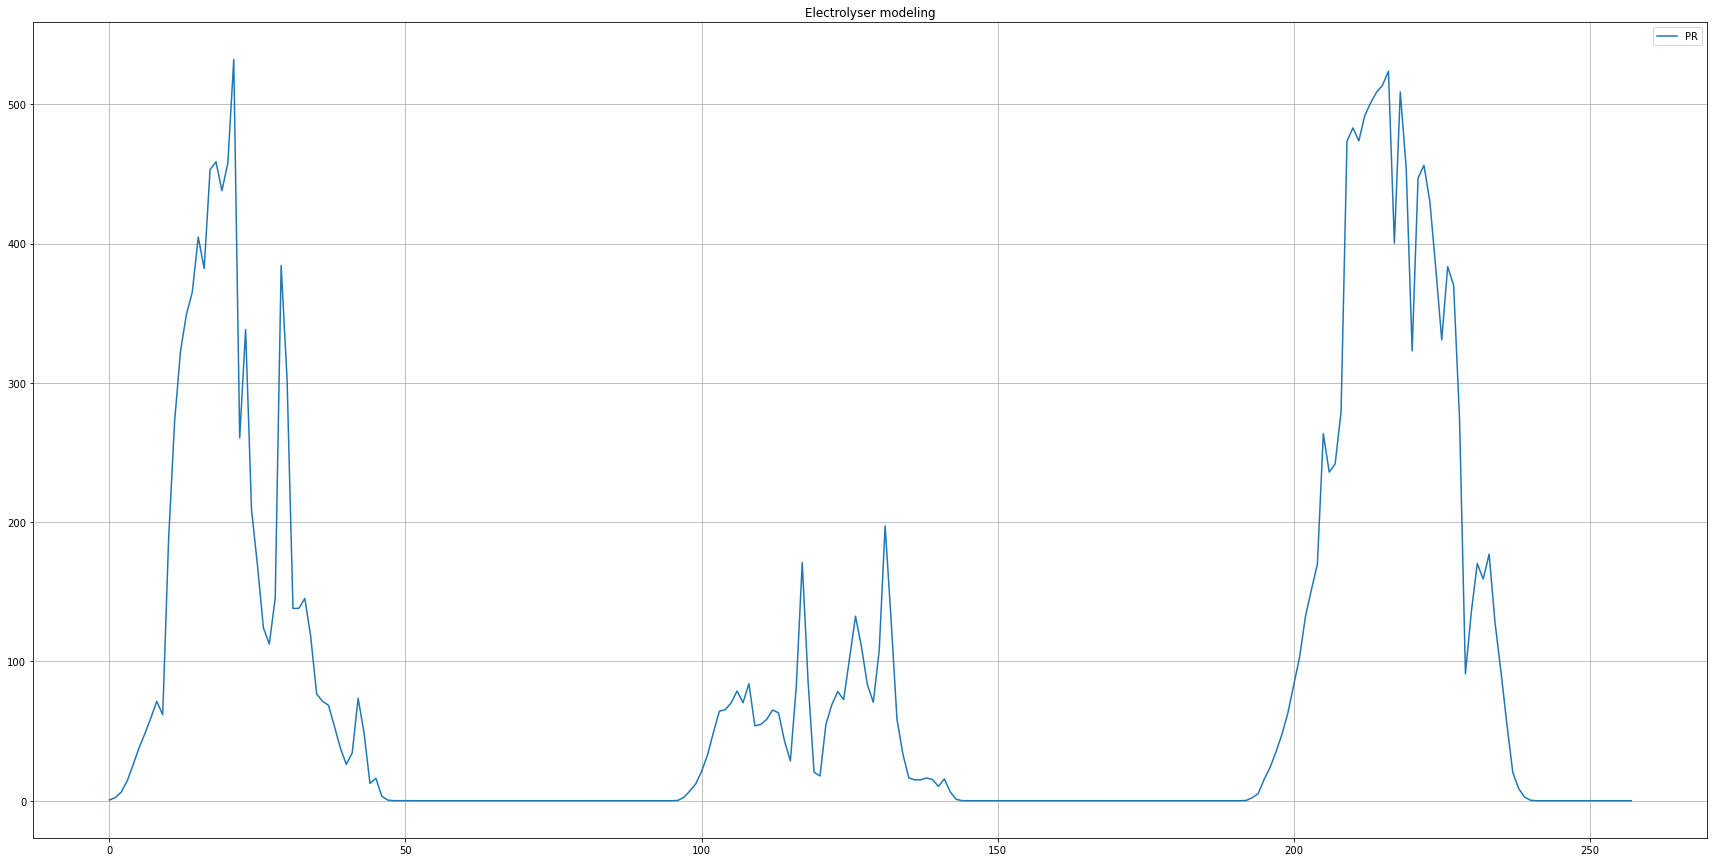

In [3]:
plt.figure(figsize=(30, 15))
plt.title("Electrolyser modeling")
plt.plot(PR_experimental, label='PR')
plt.legend()
plt.grid(visible=True)

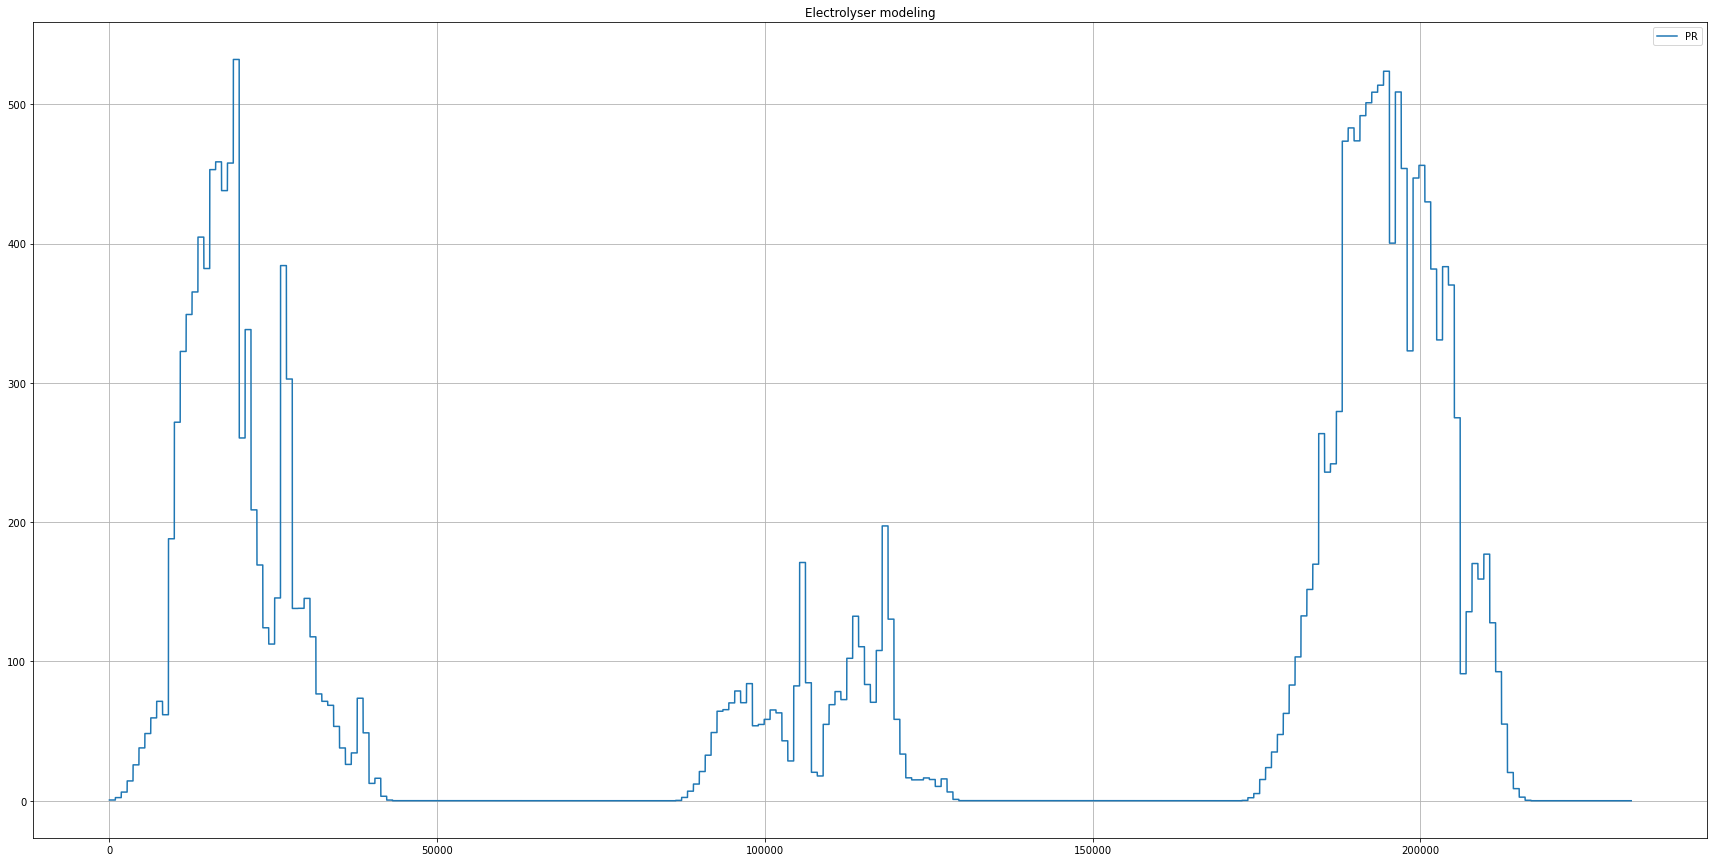

In [4]:
plt.figure(figsize=(30, 15))
plt.title("Electrolyser modeling")
plt.plot(np.array(Irradiance_1sec)/2, label='PR')
plt.legend()
plt.grid(visible=True)

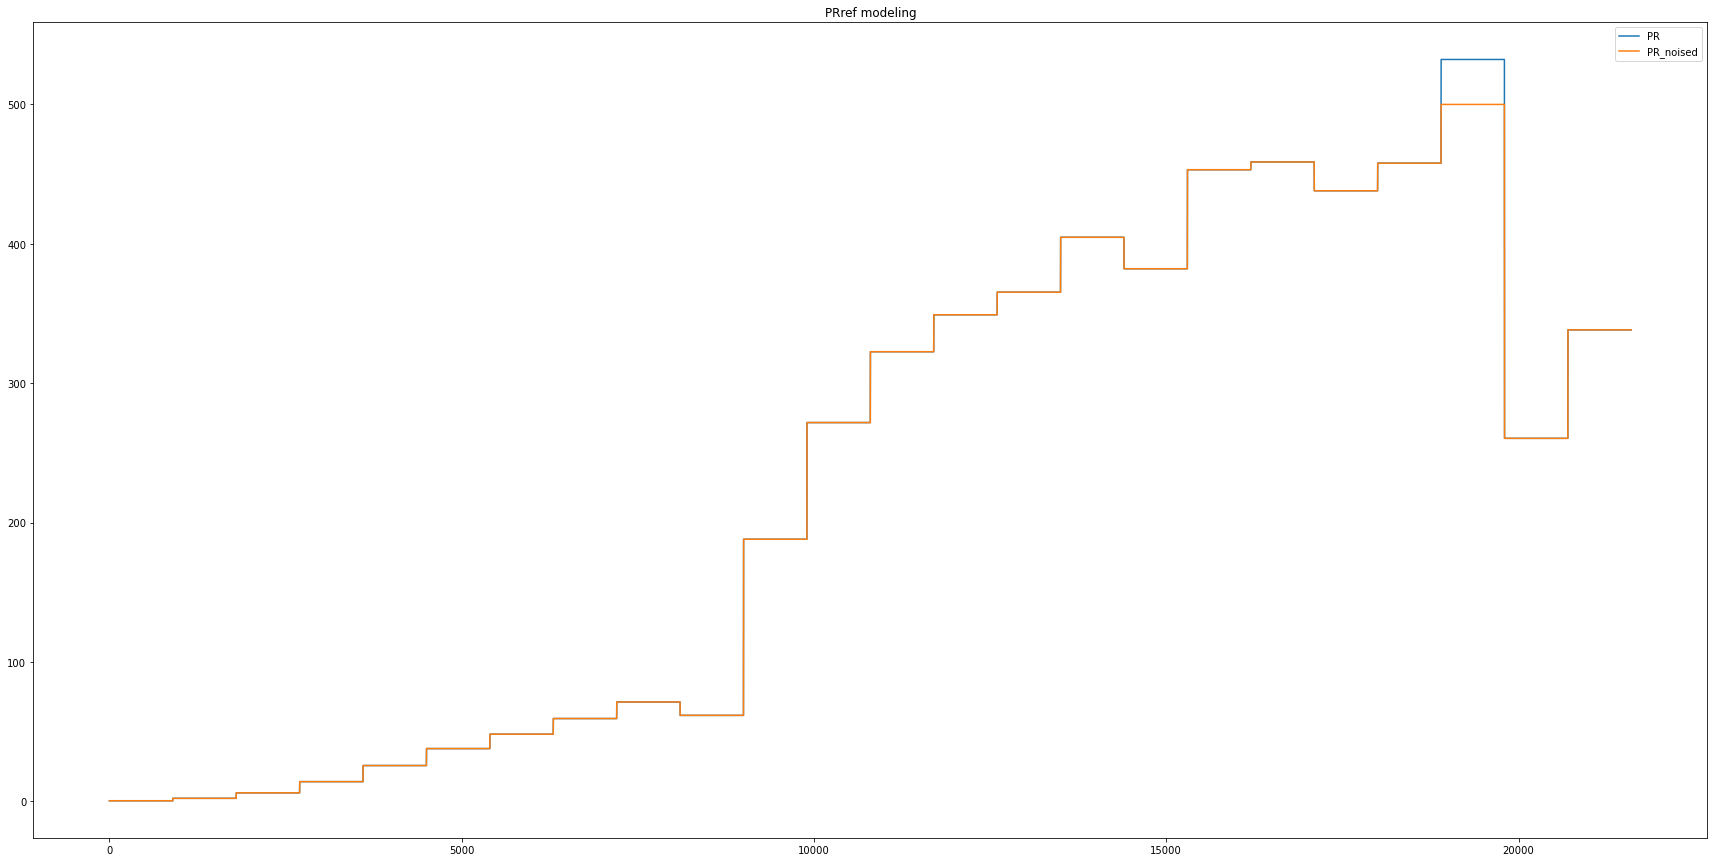

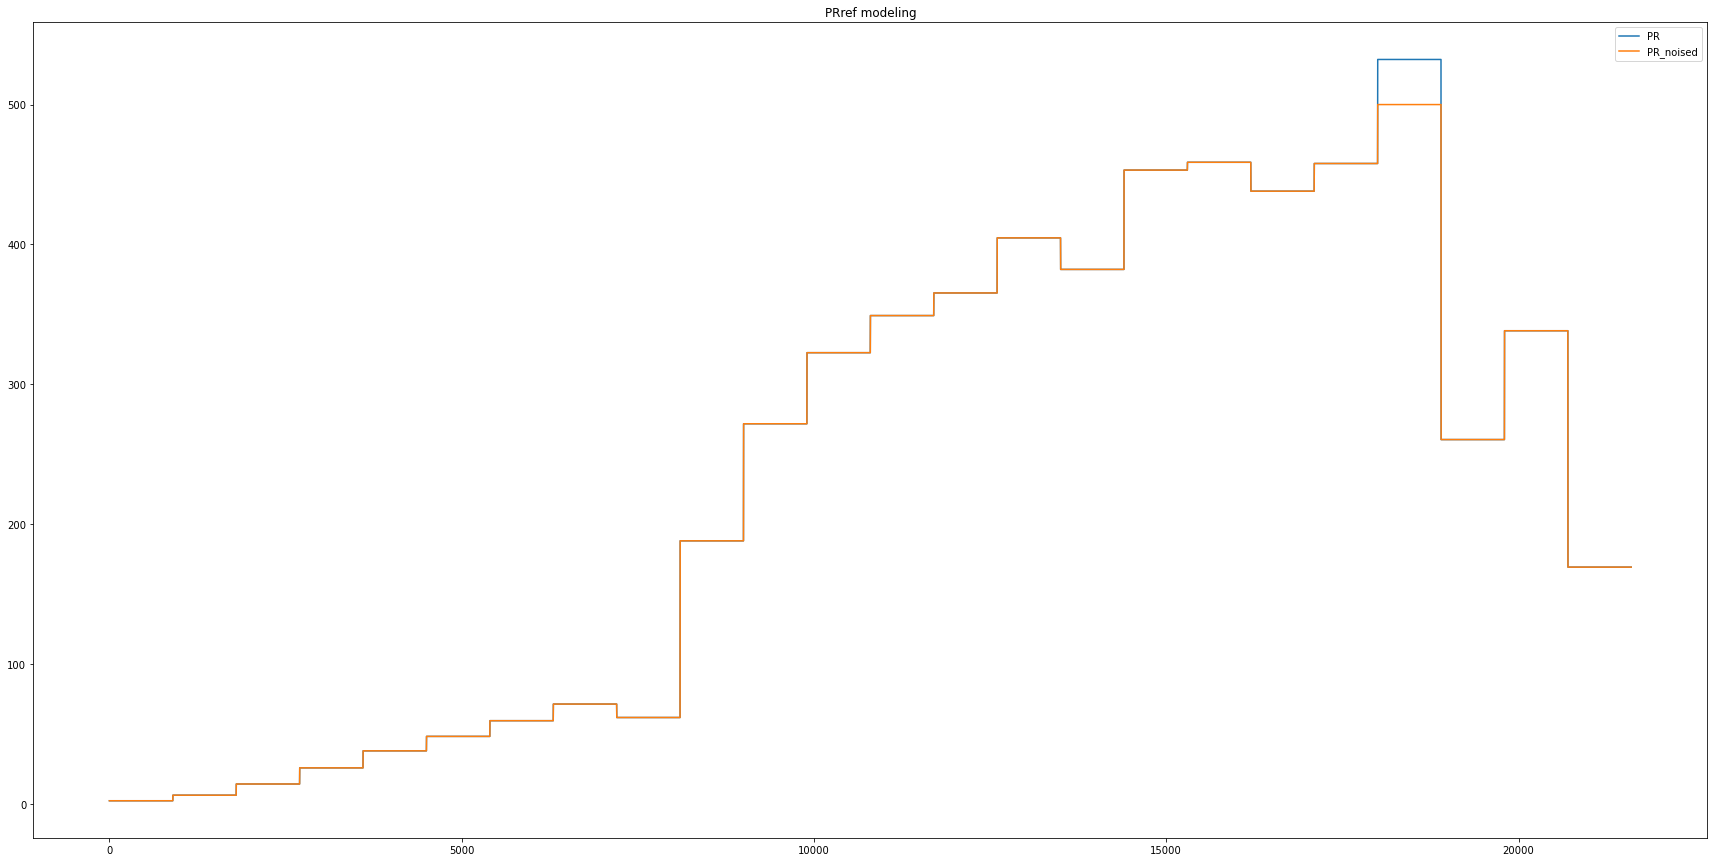

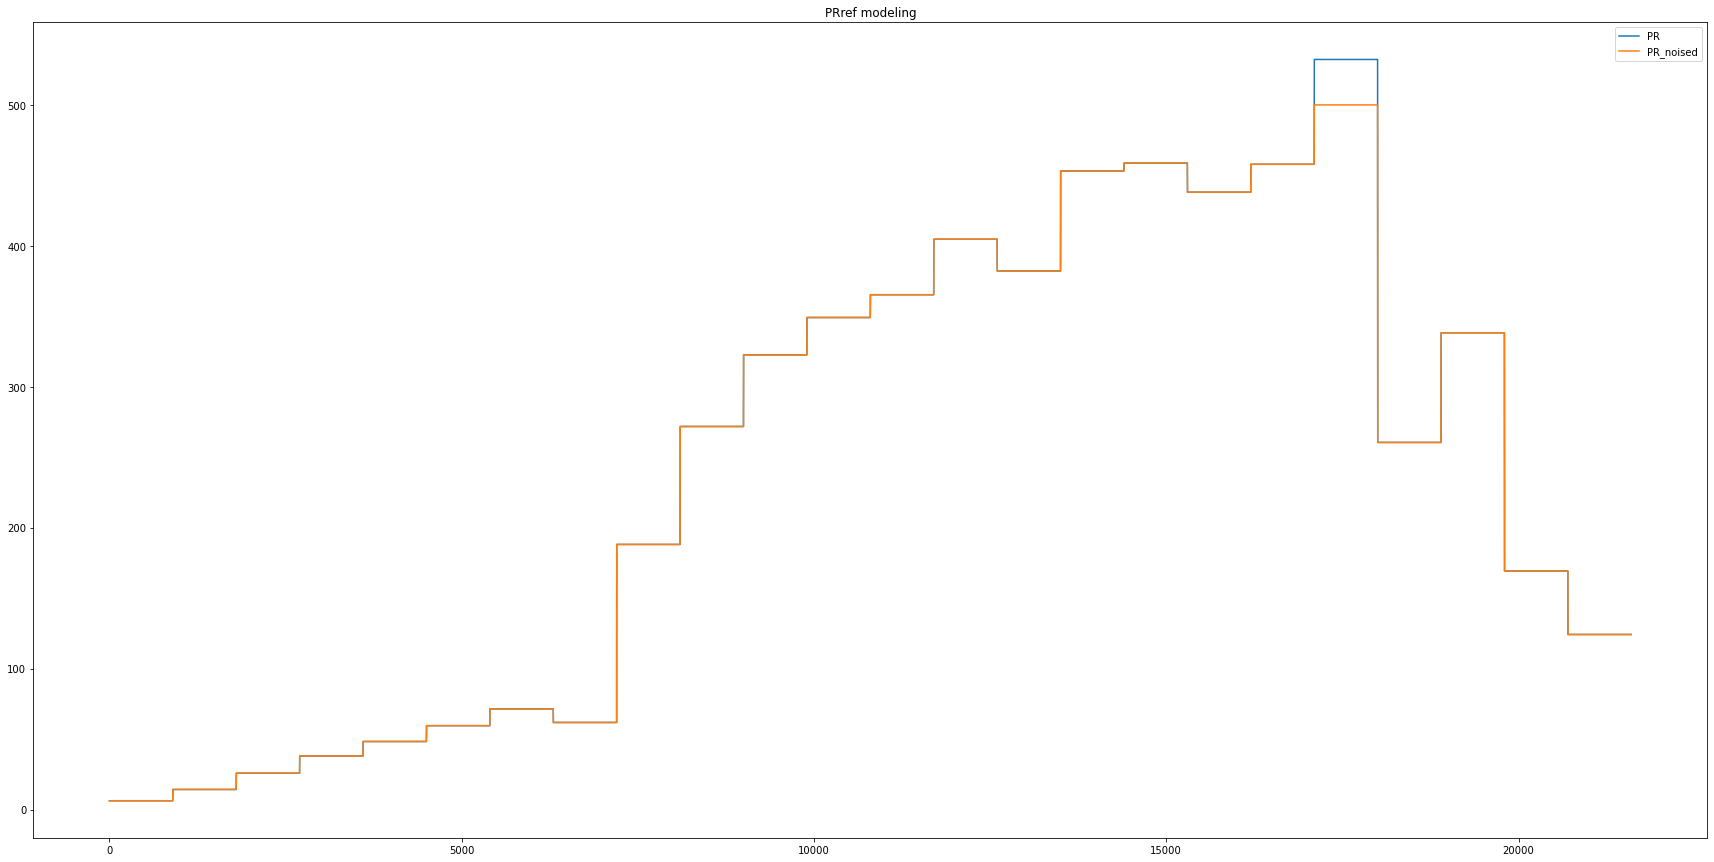

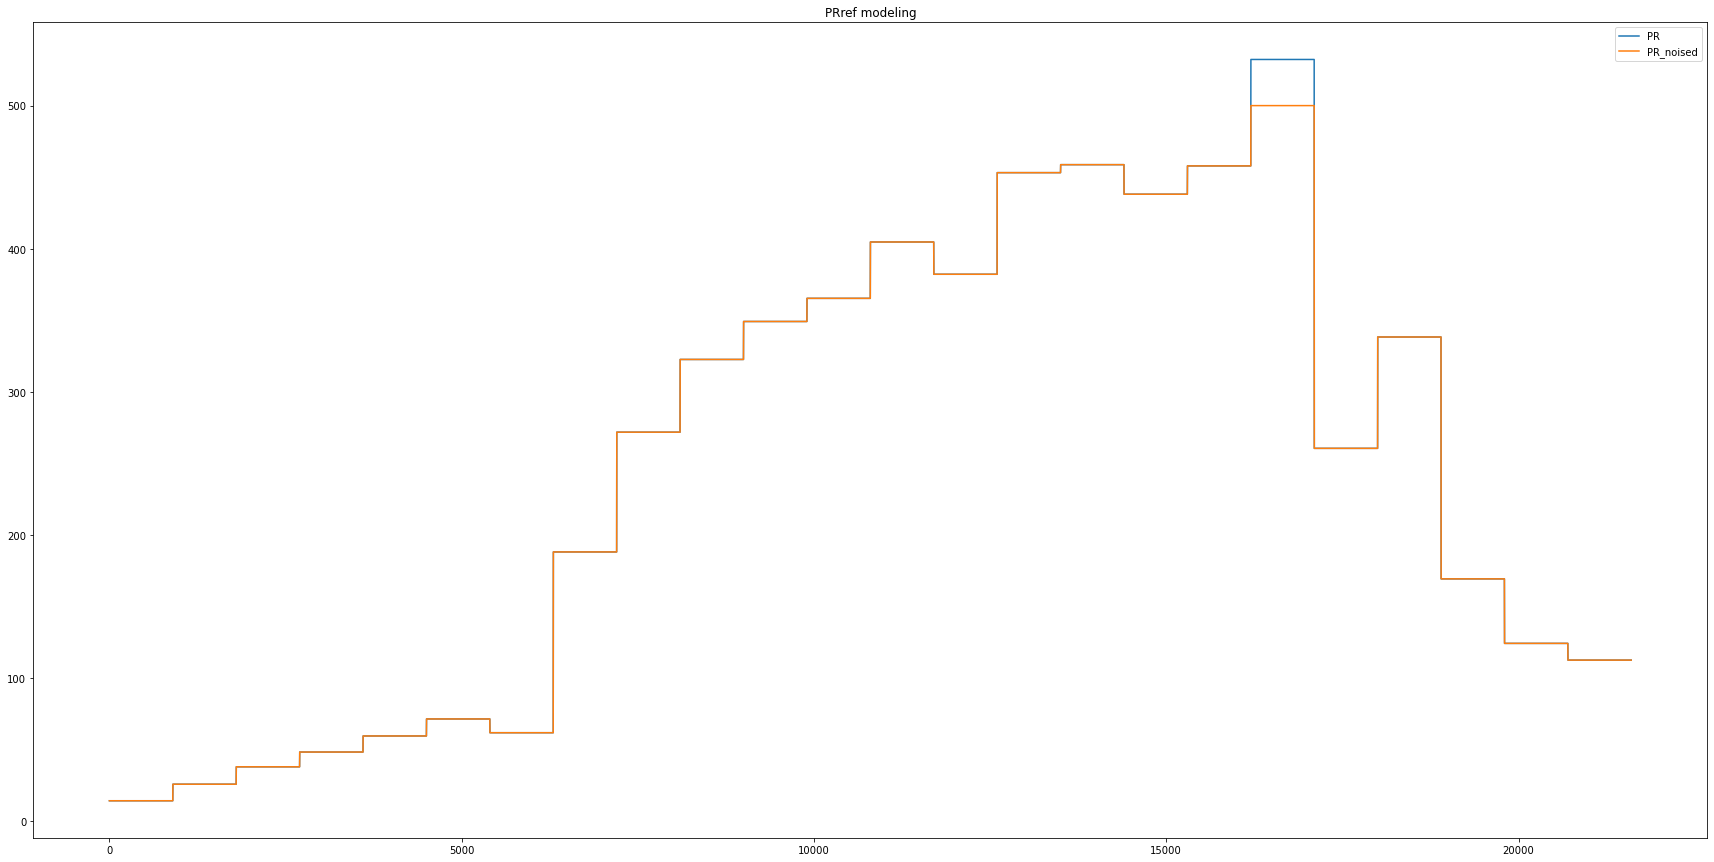

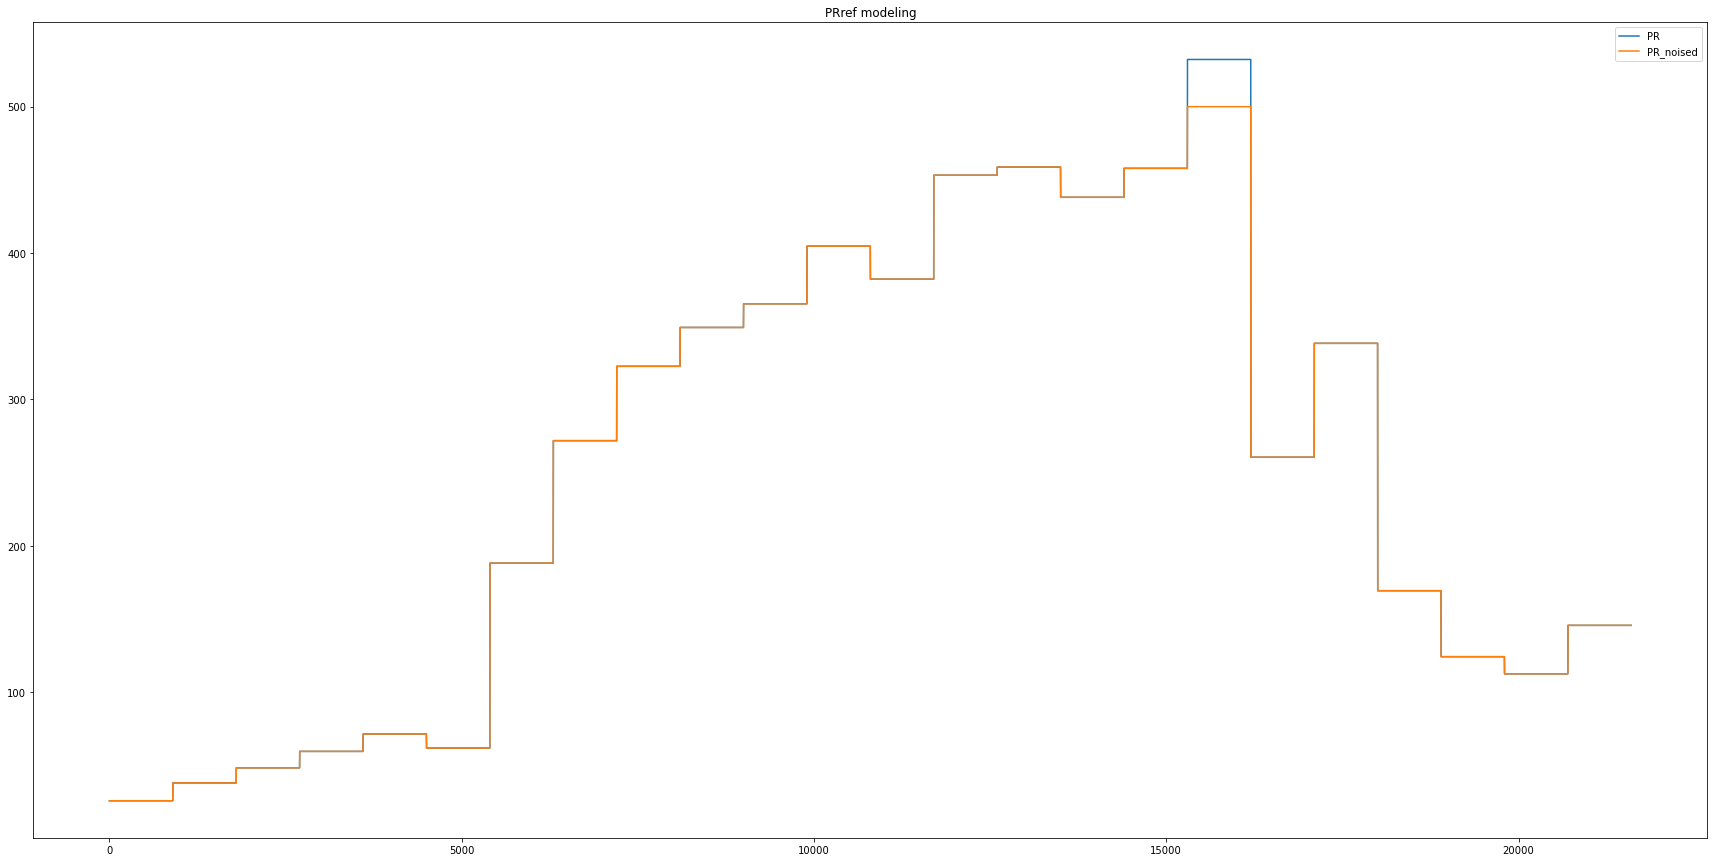

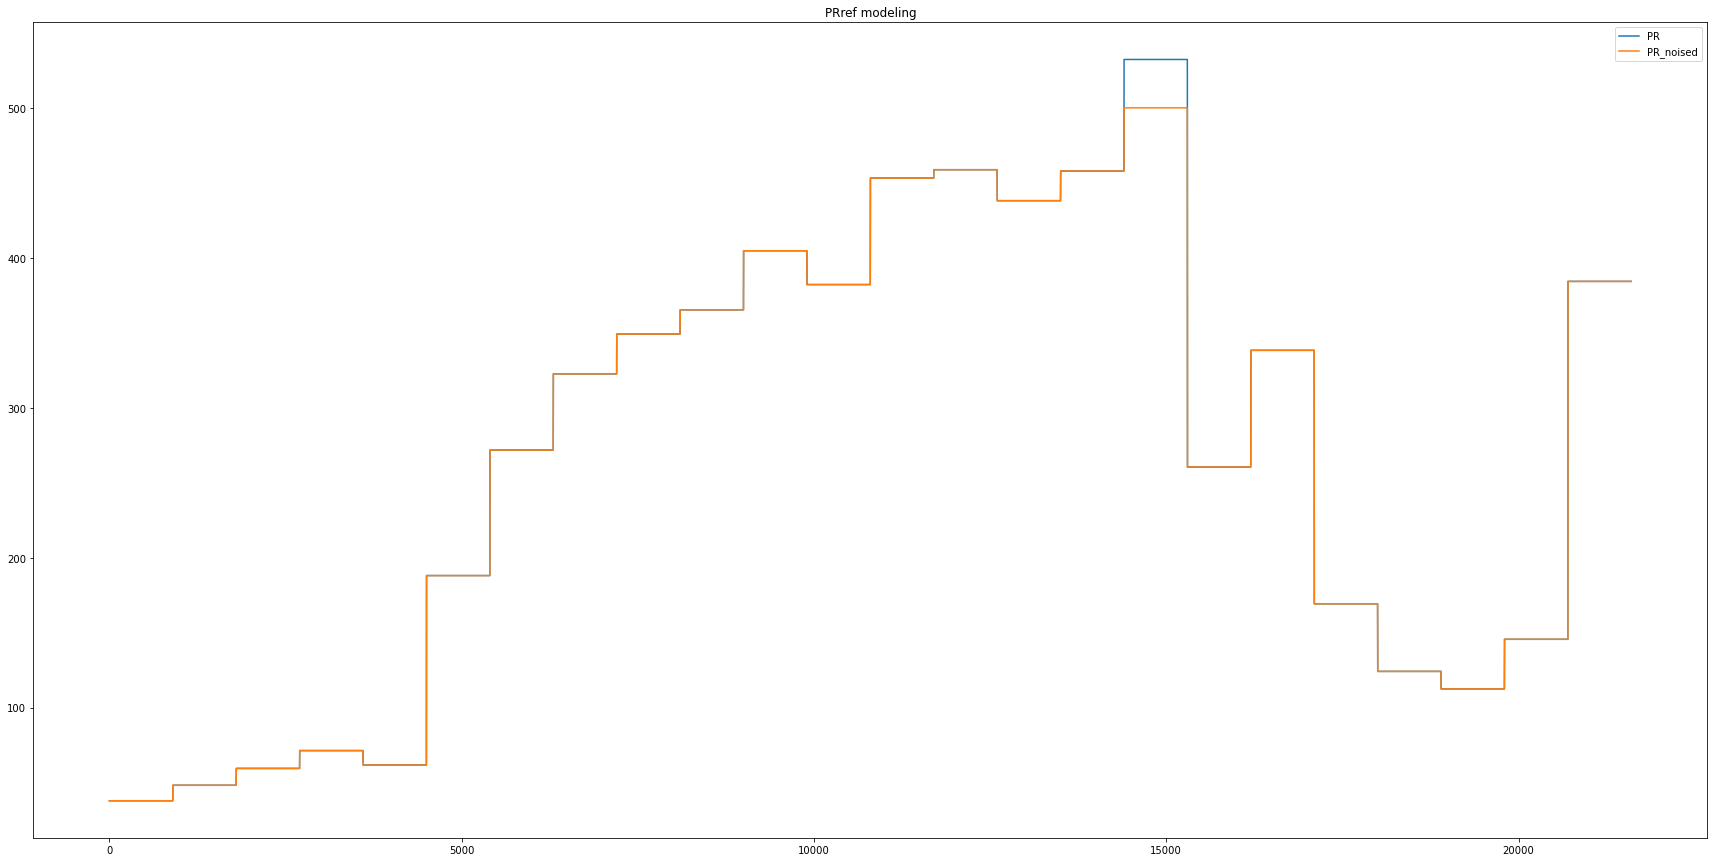

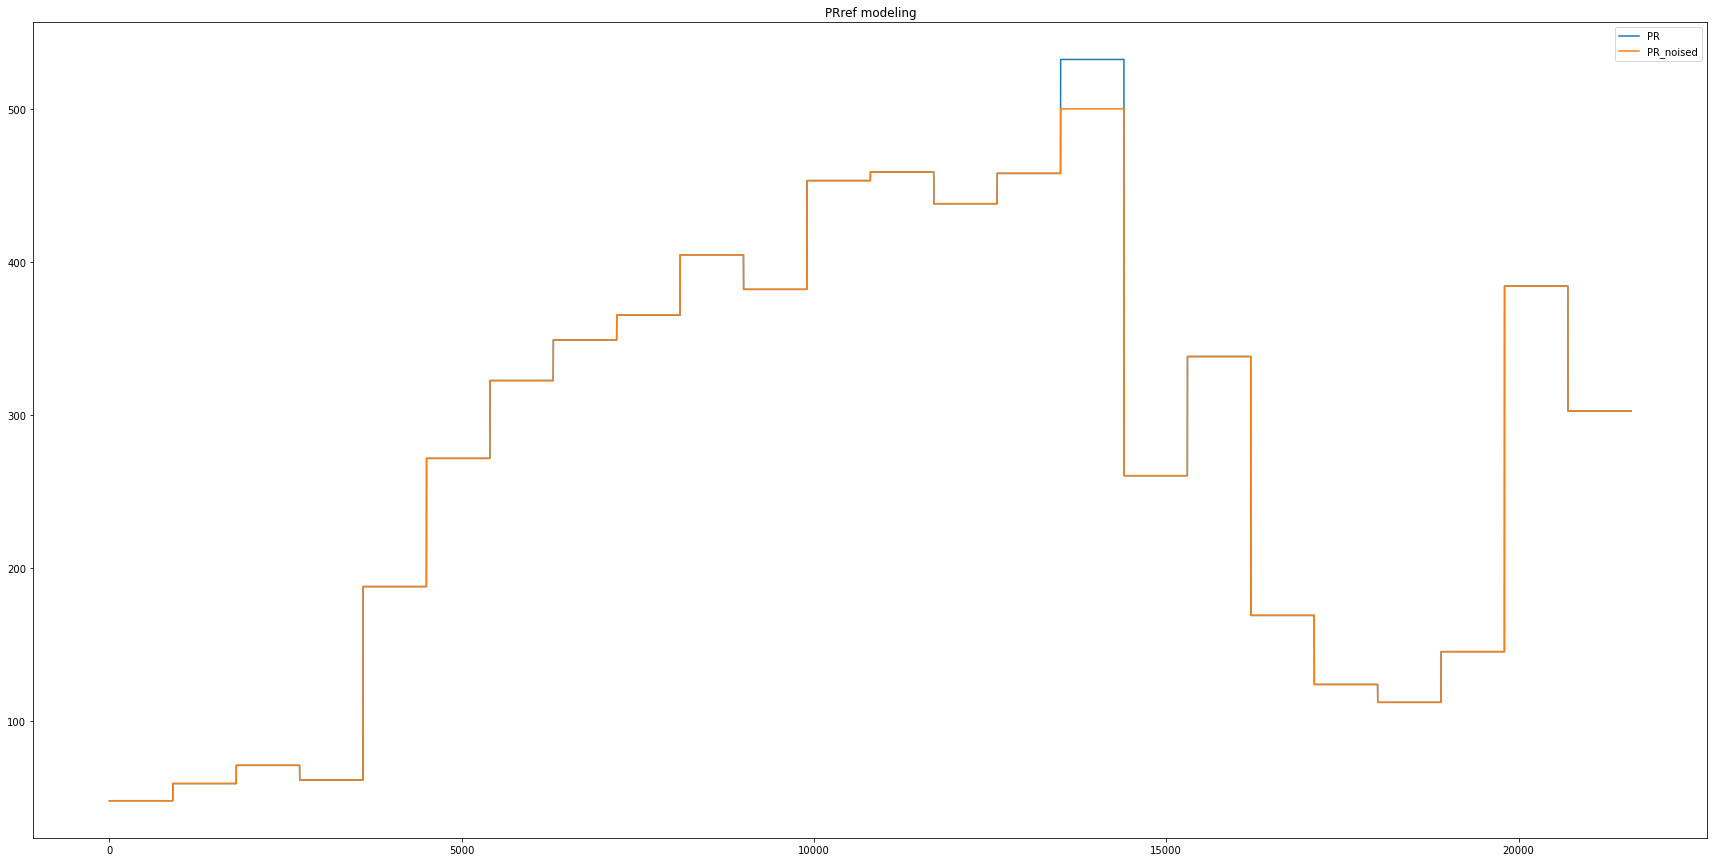

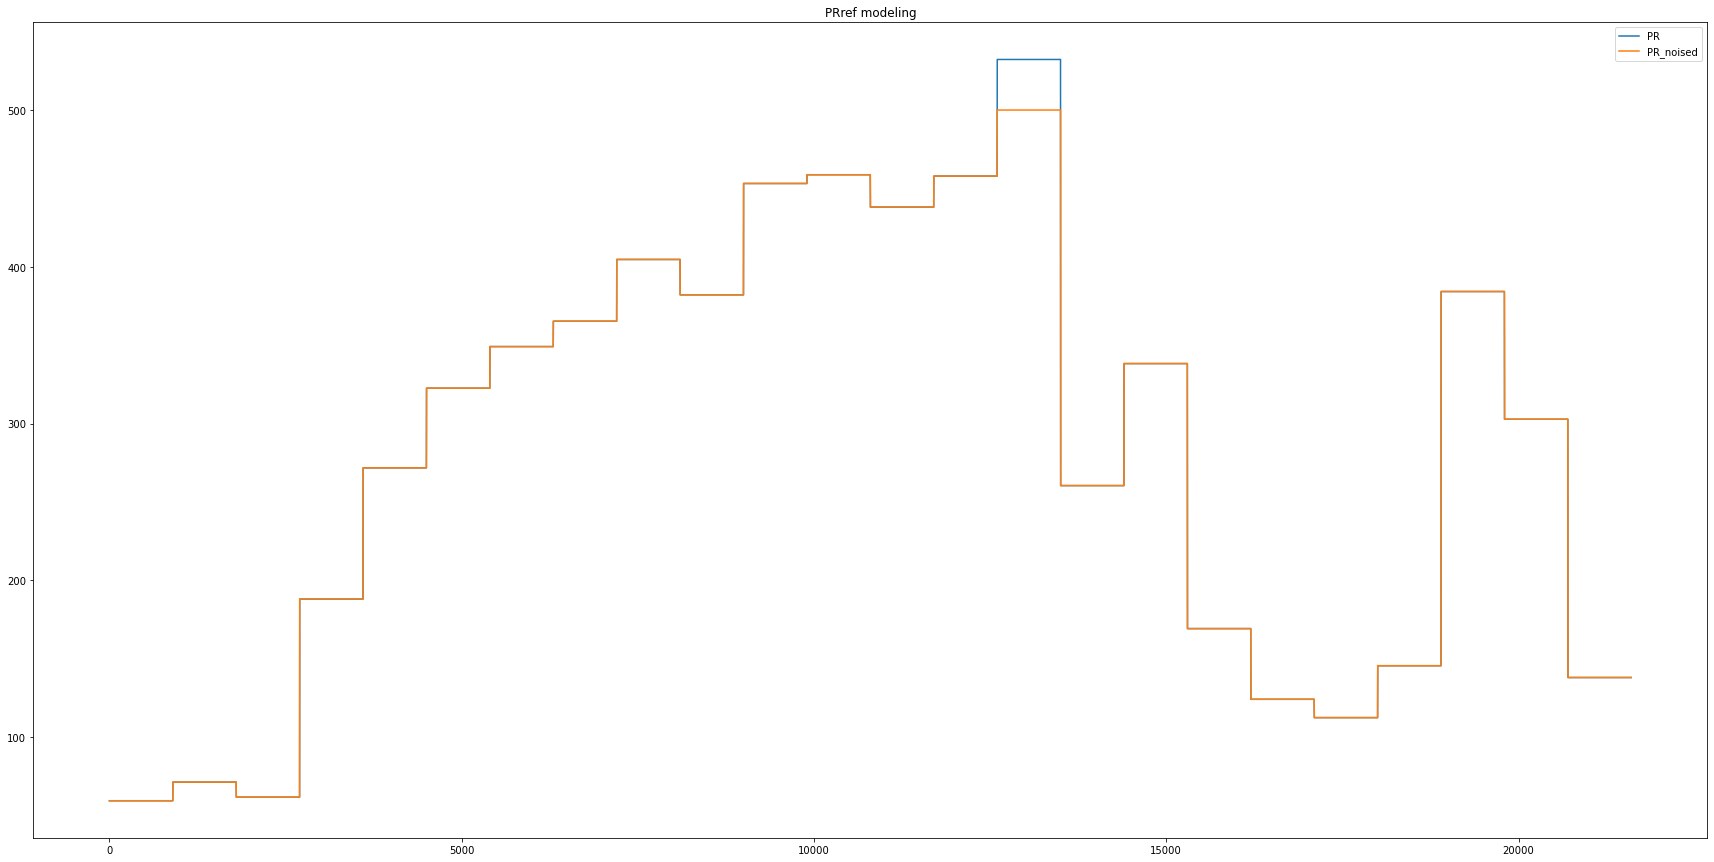

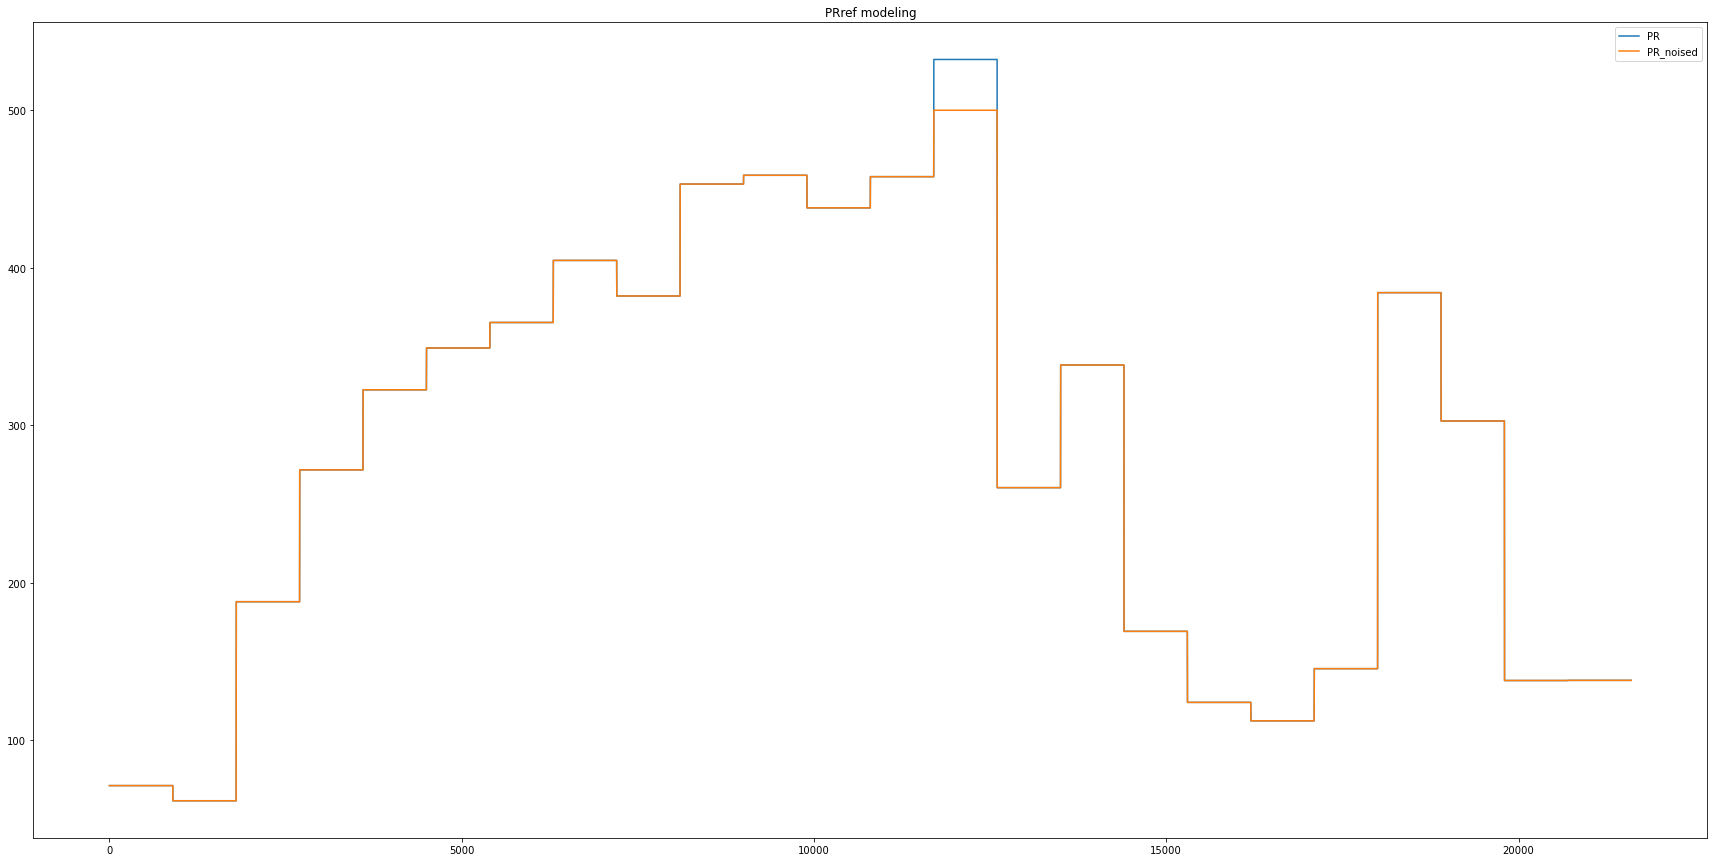

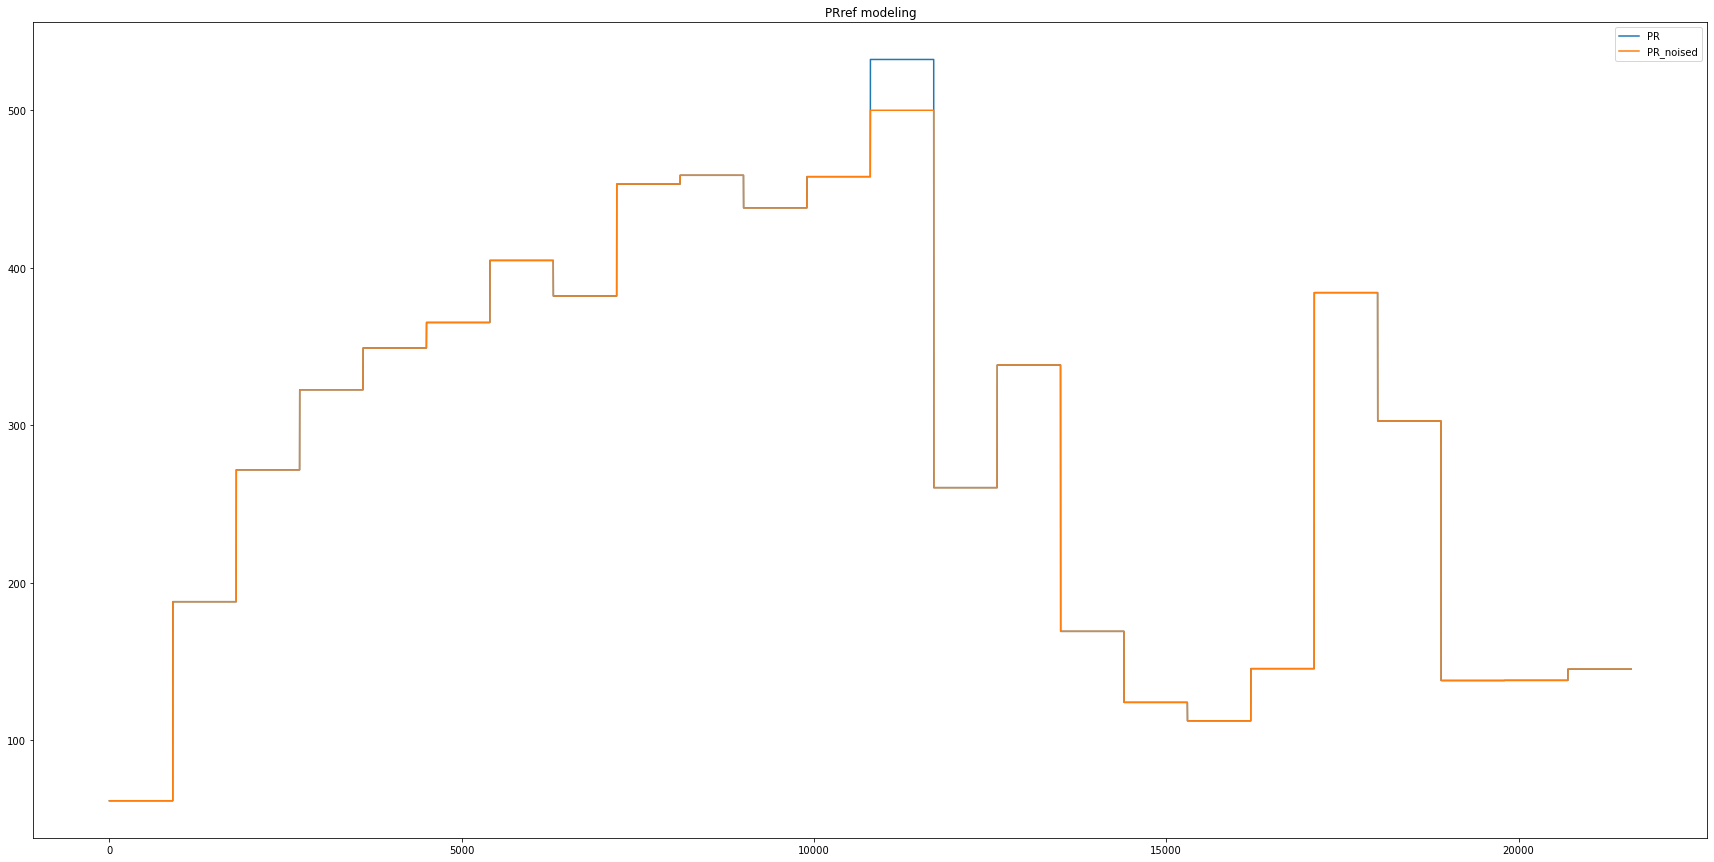

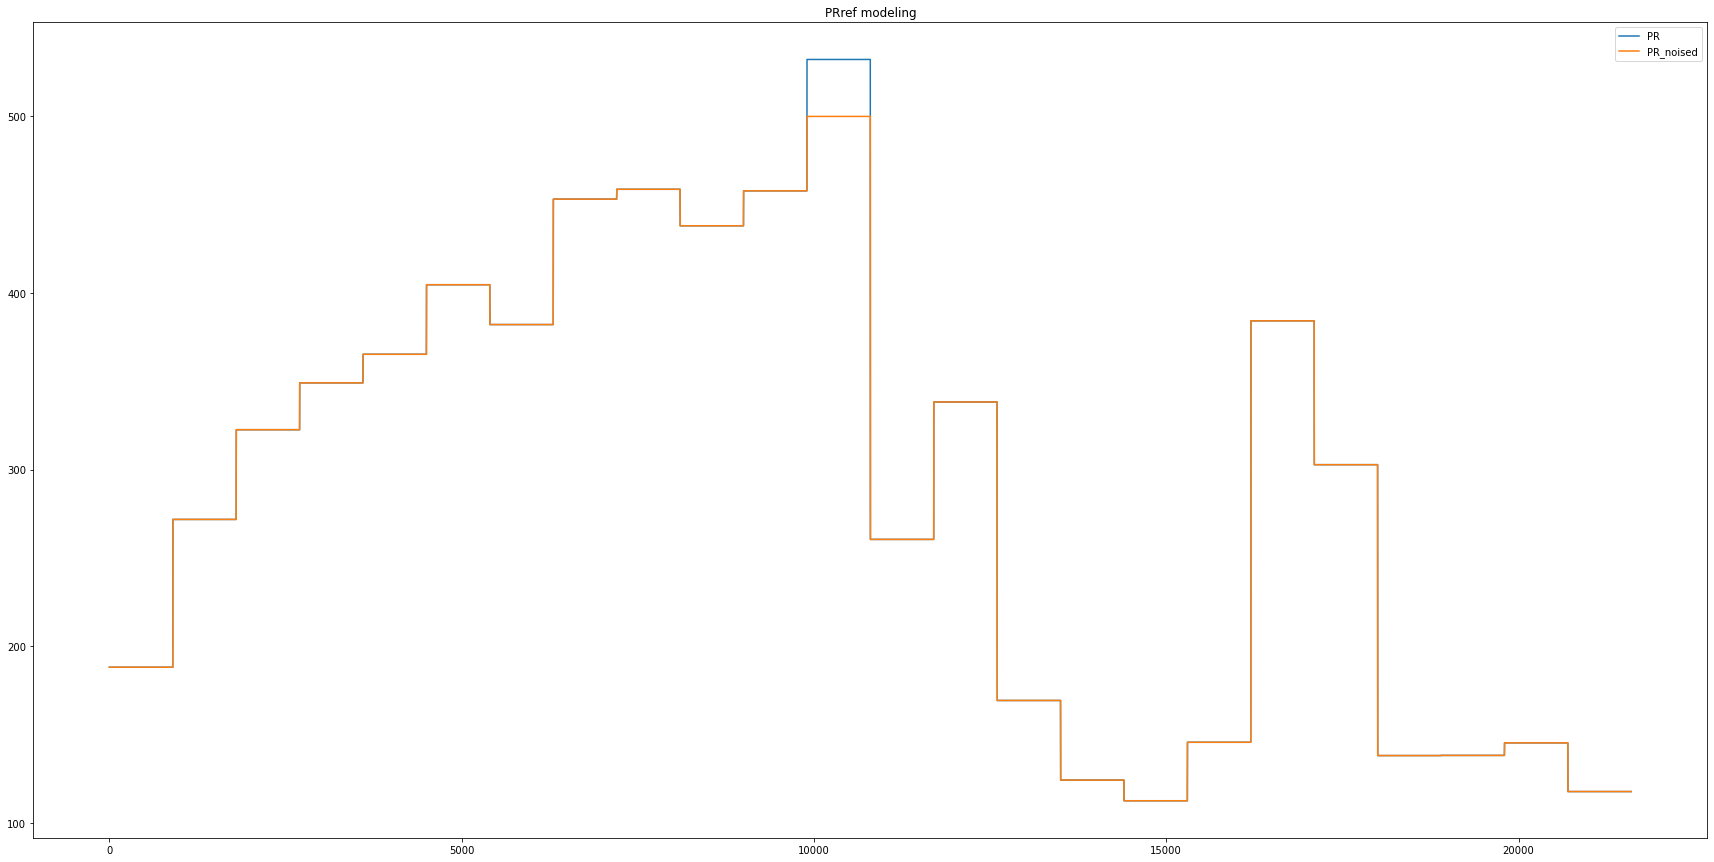

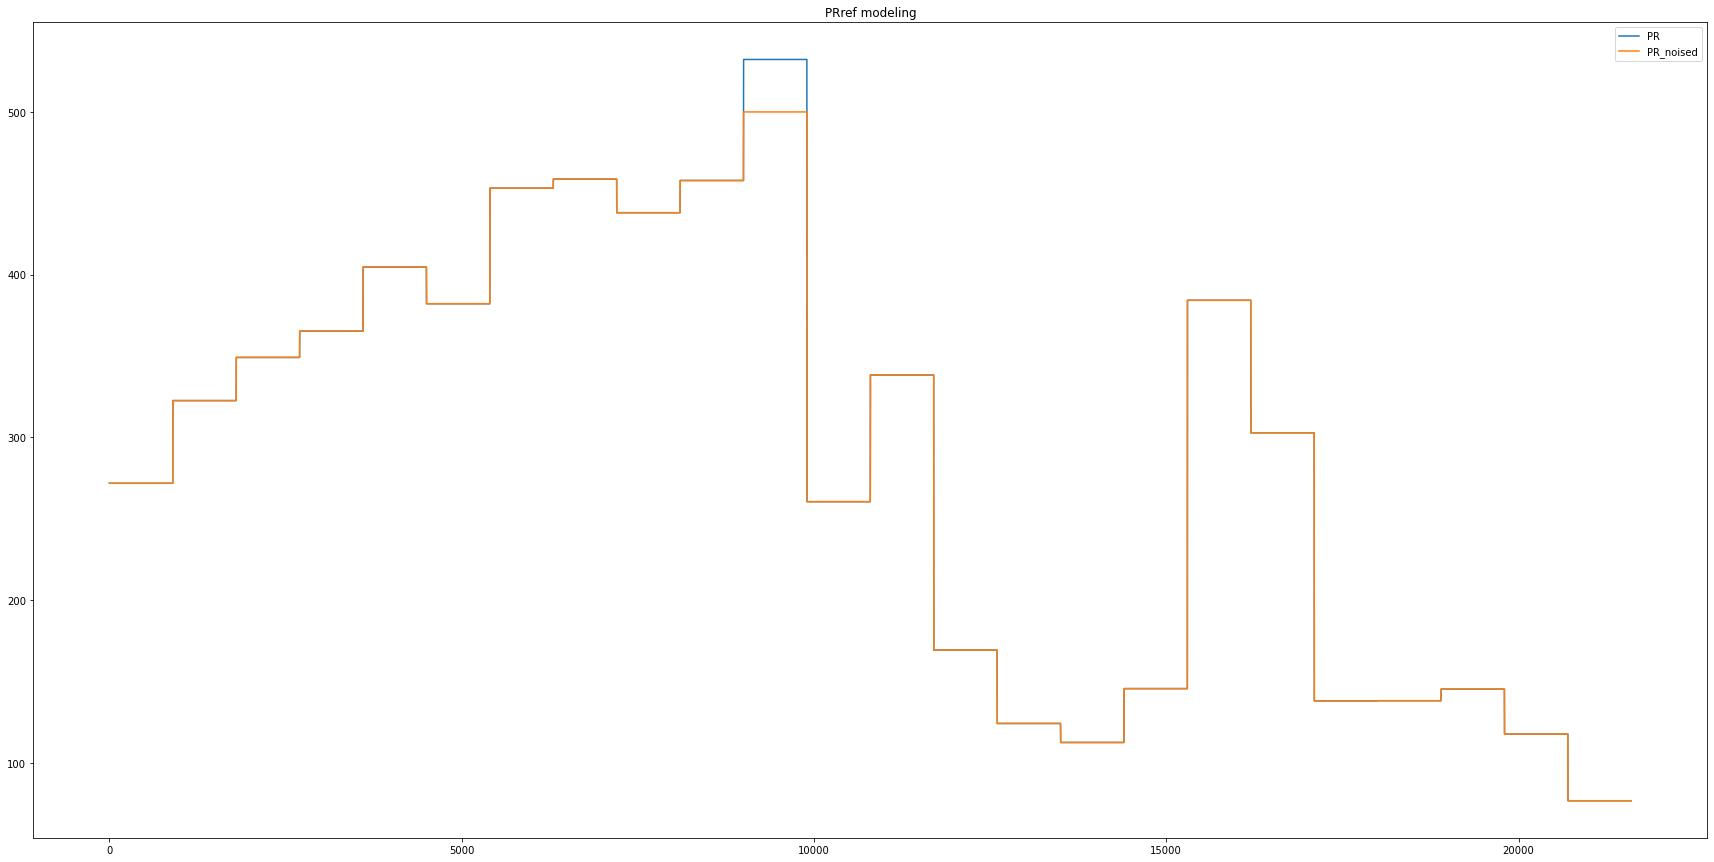

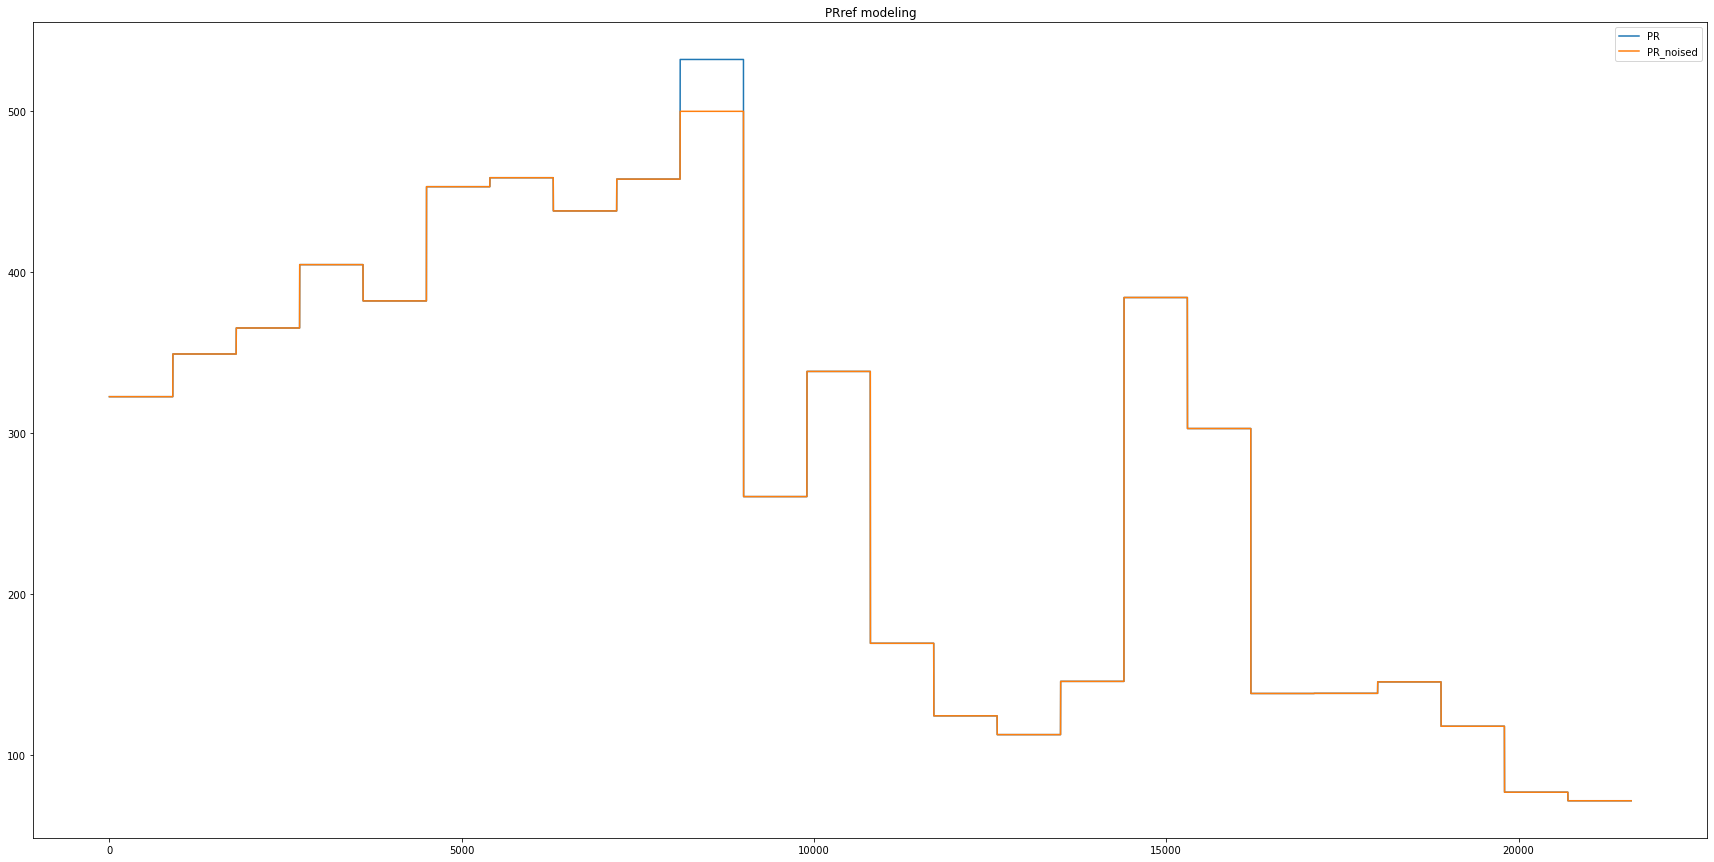

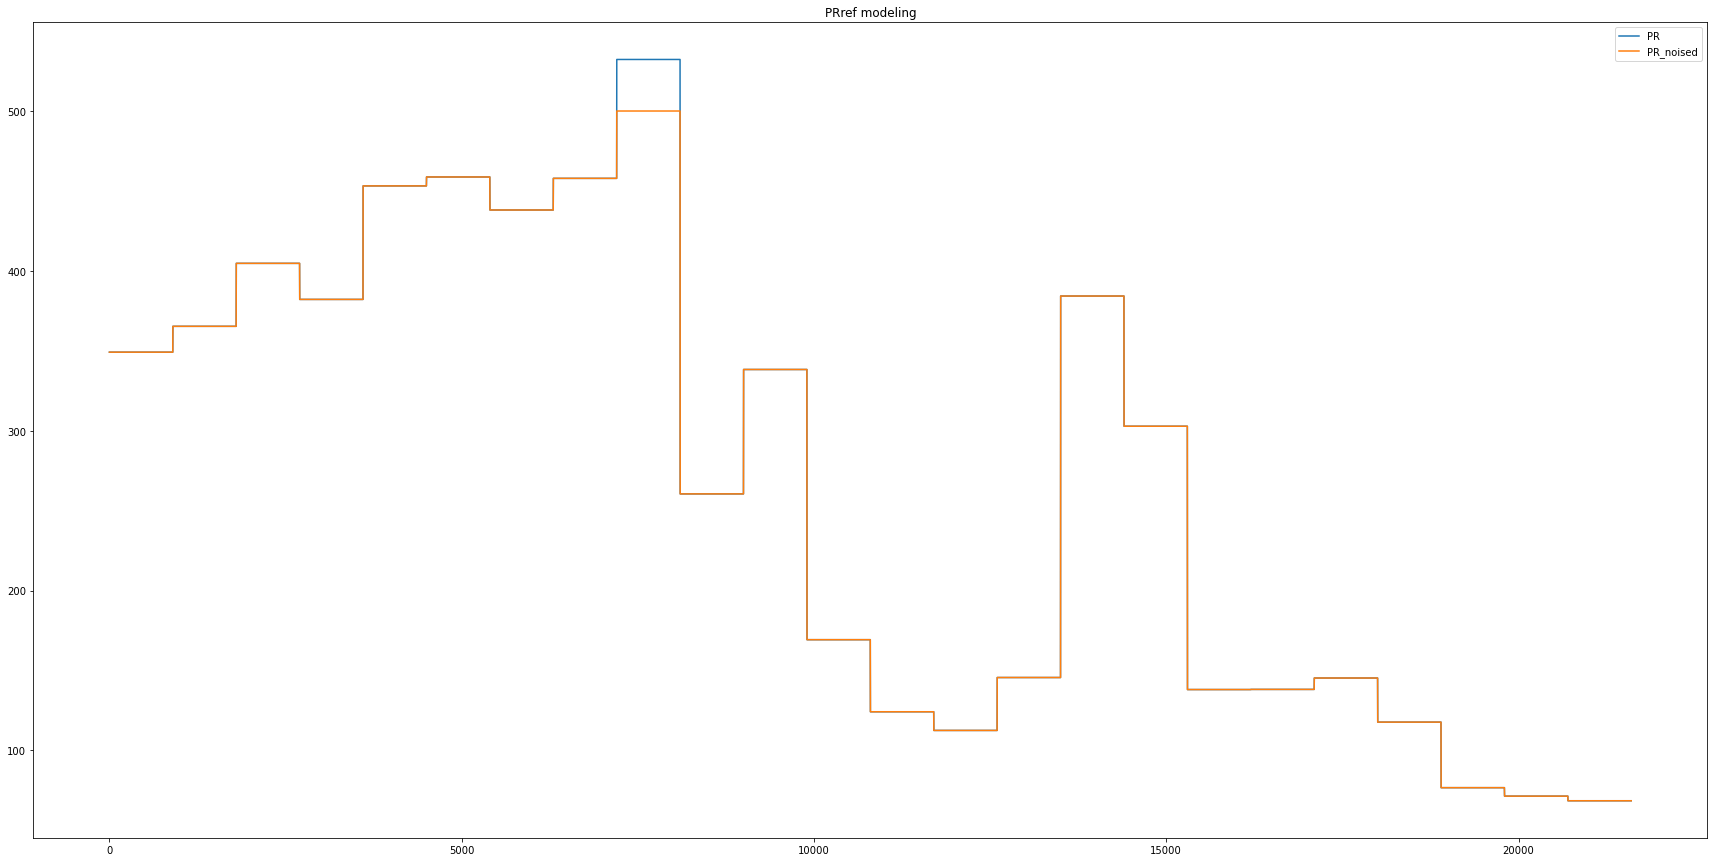

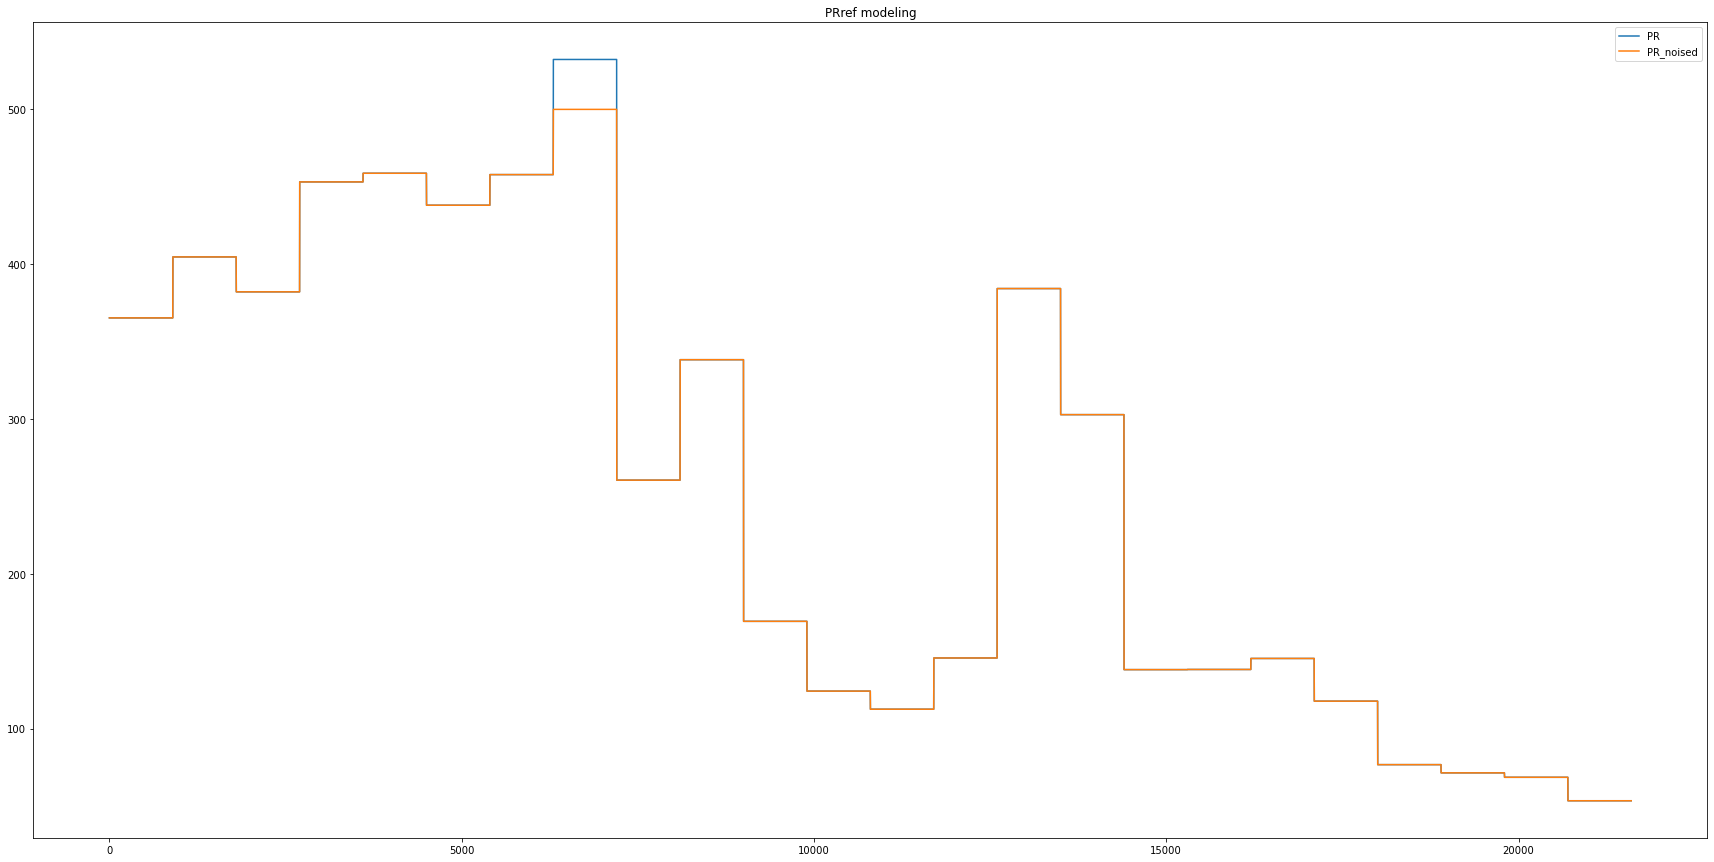

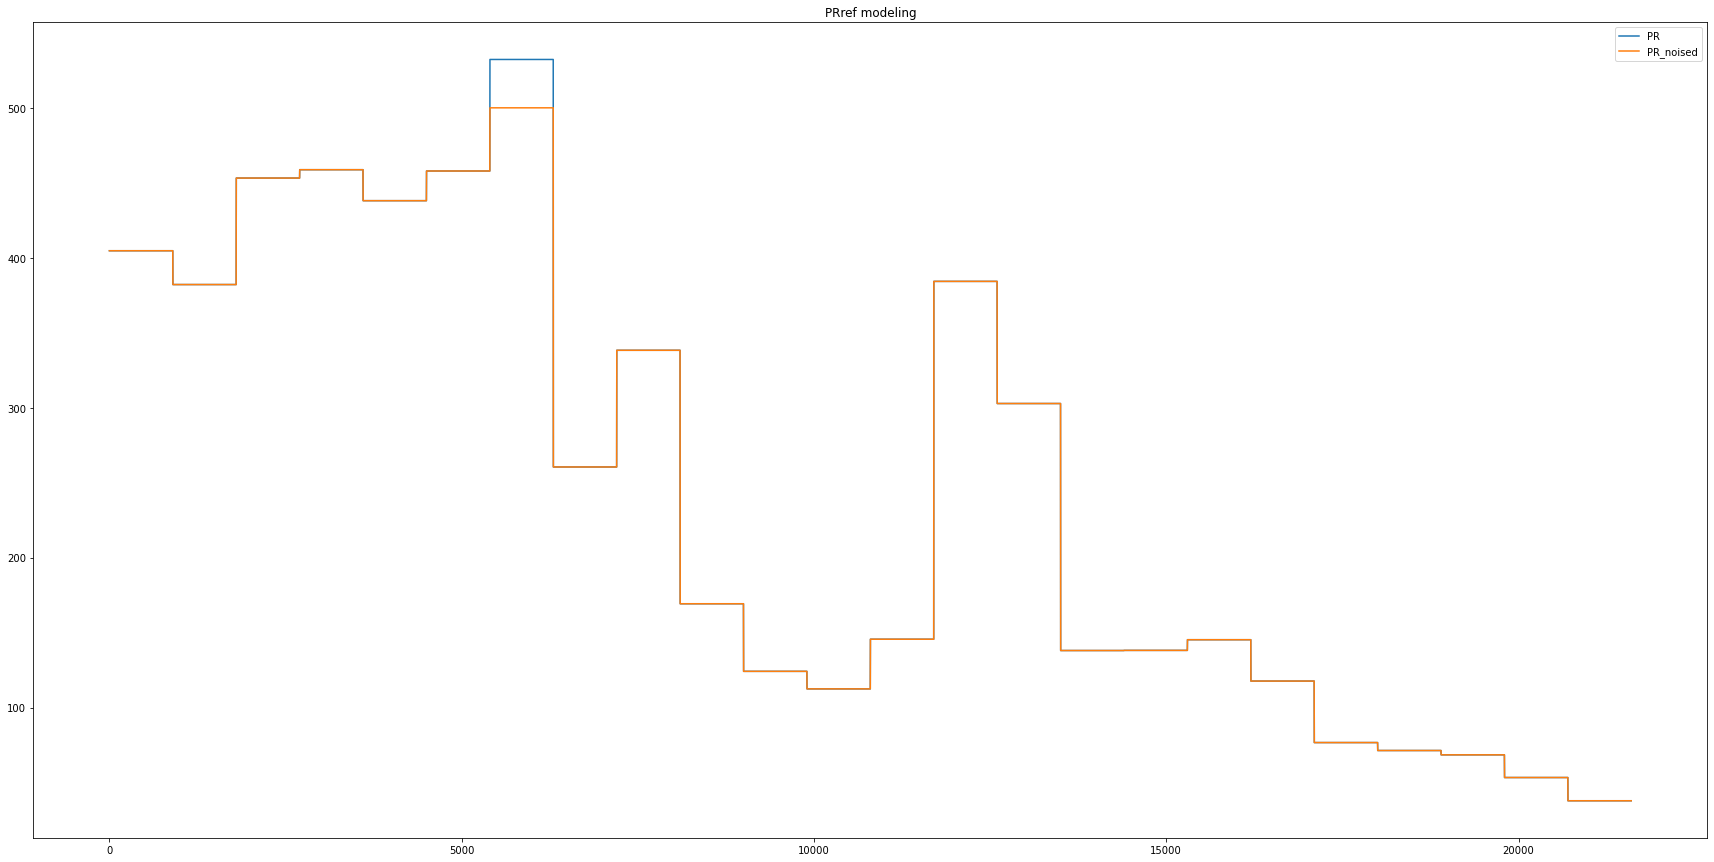

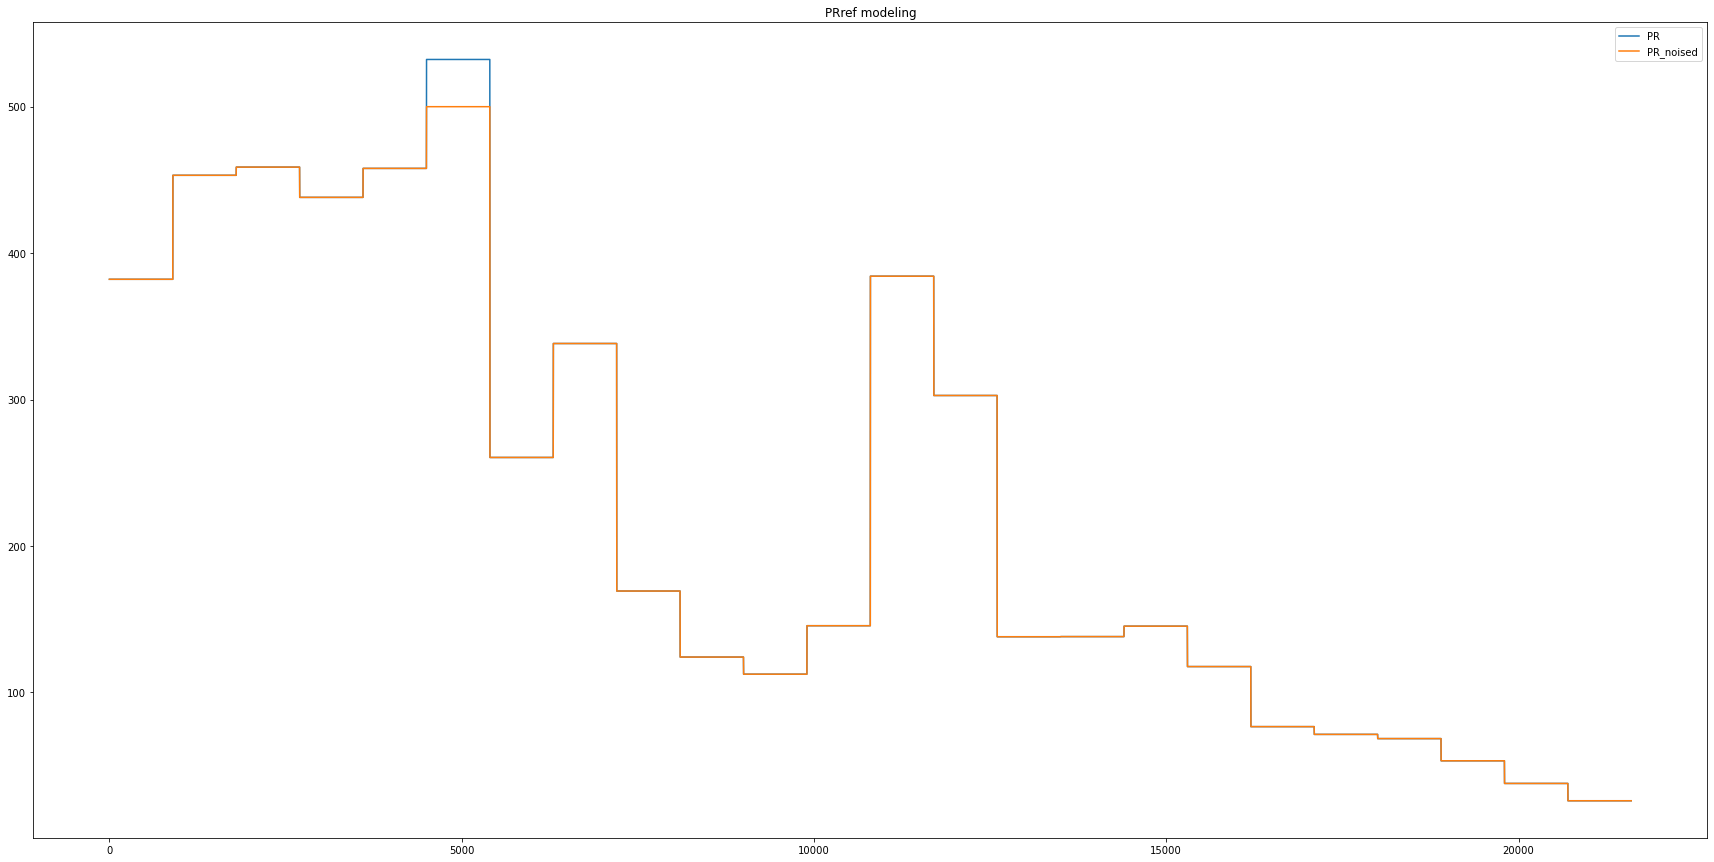

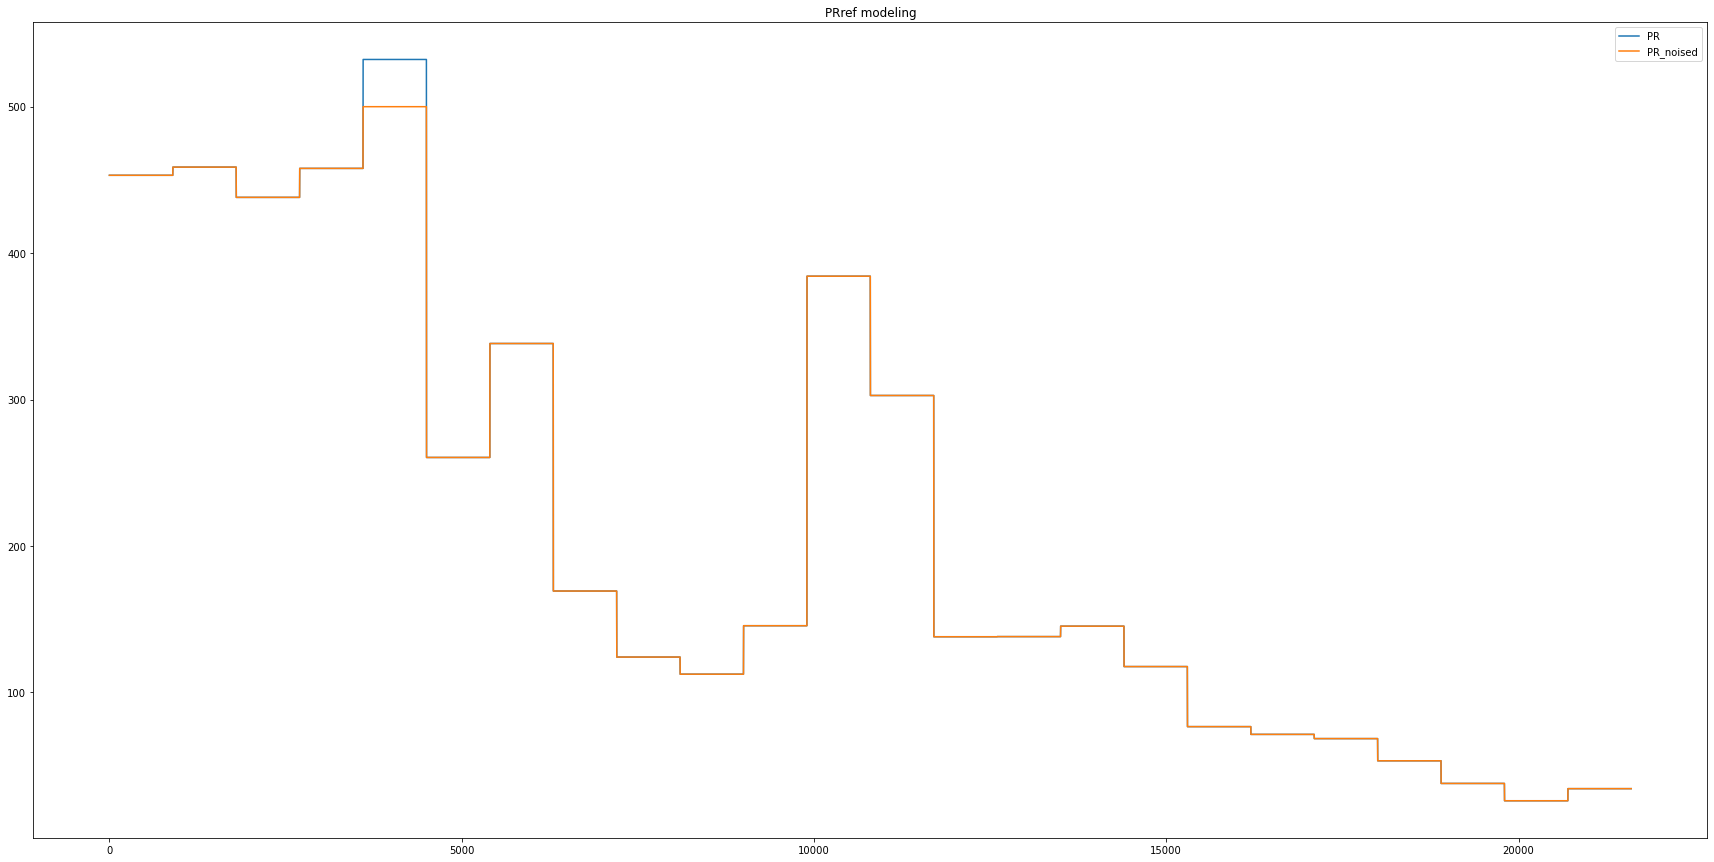

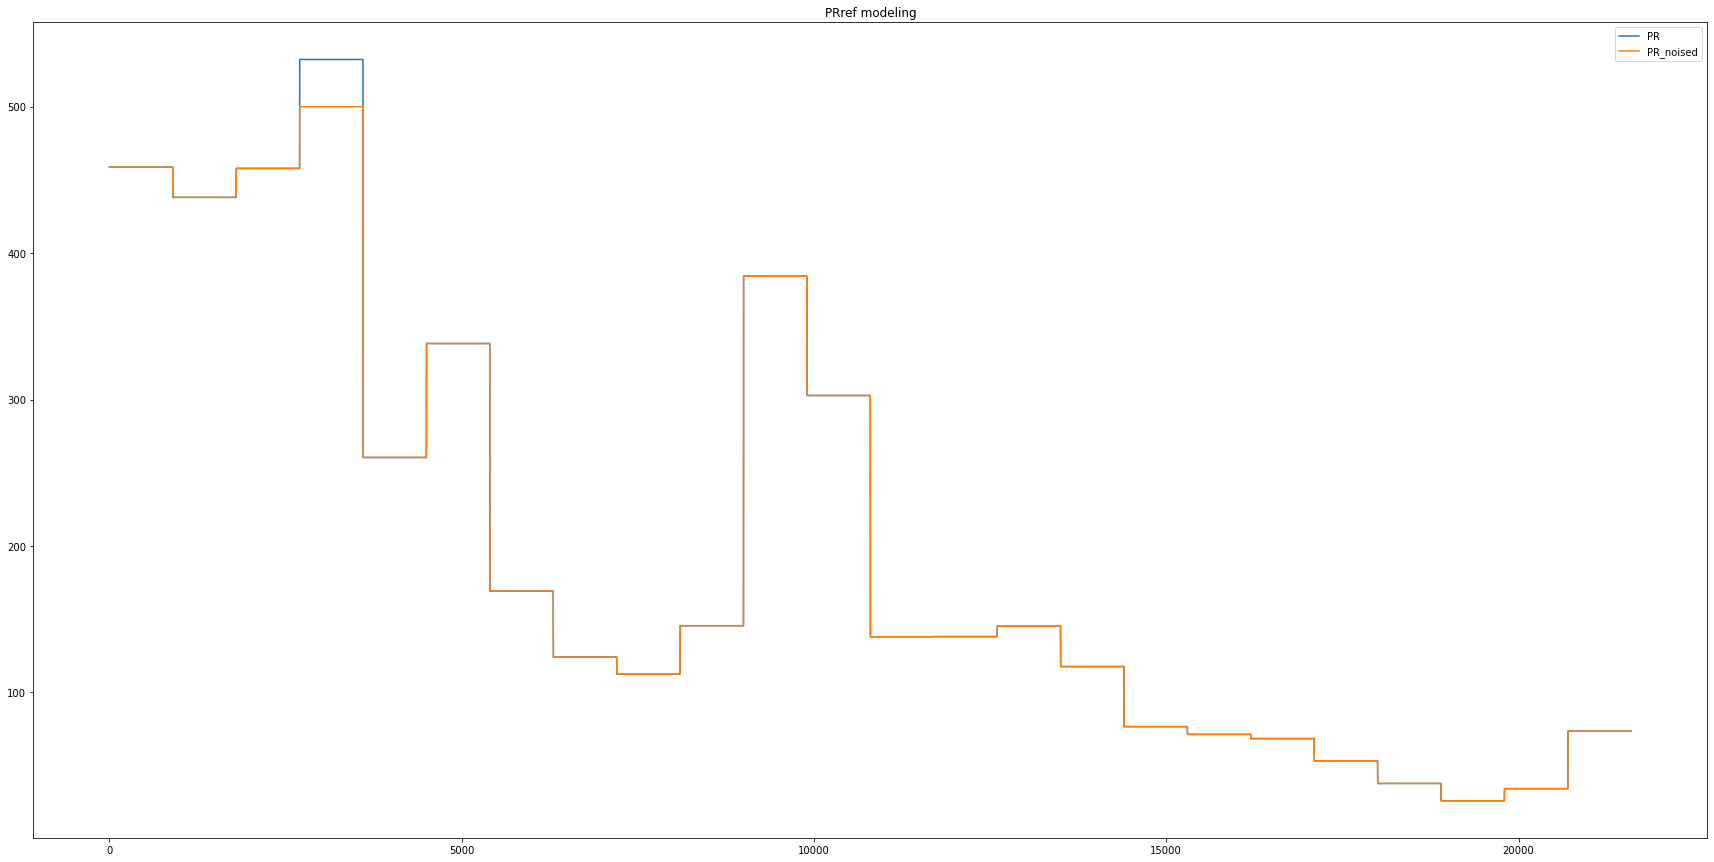

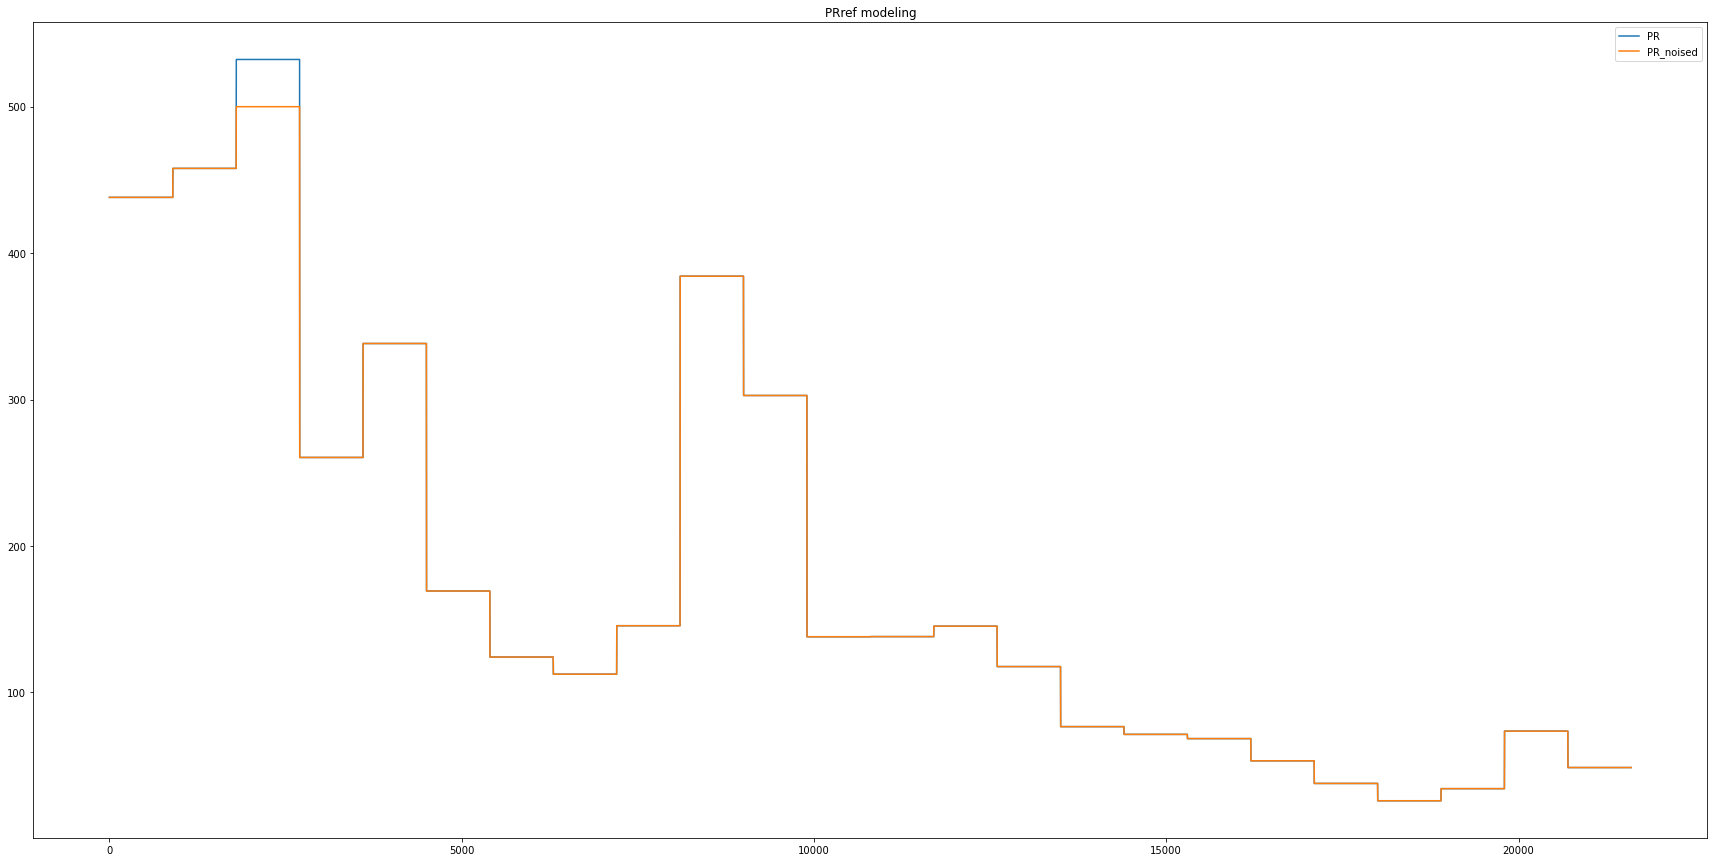

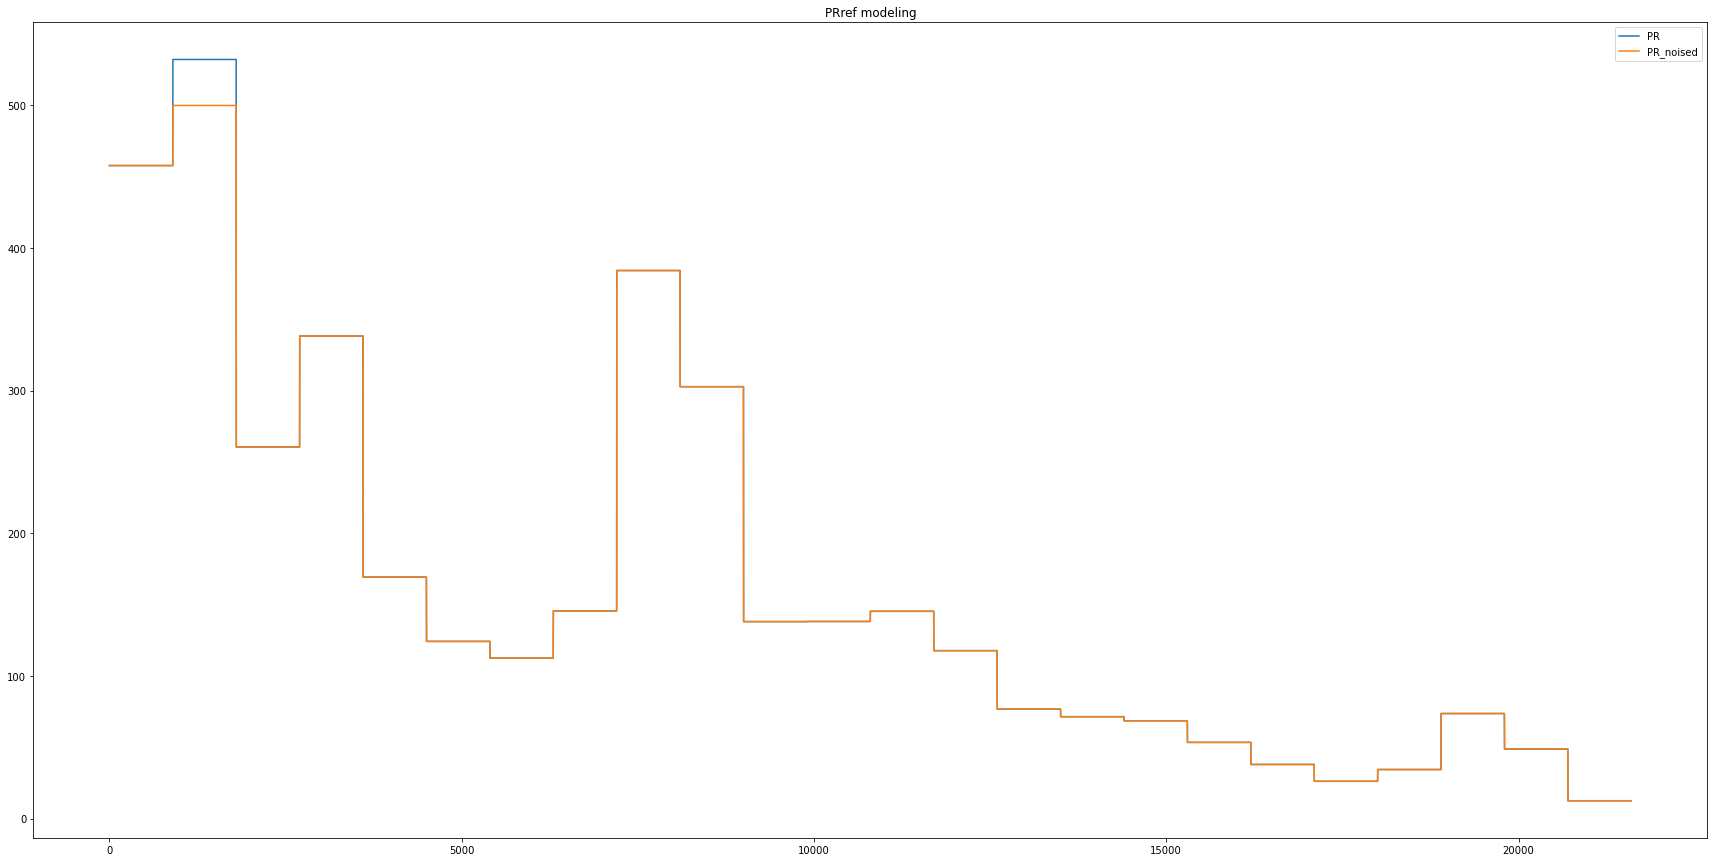

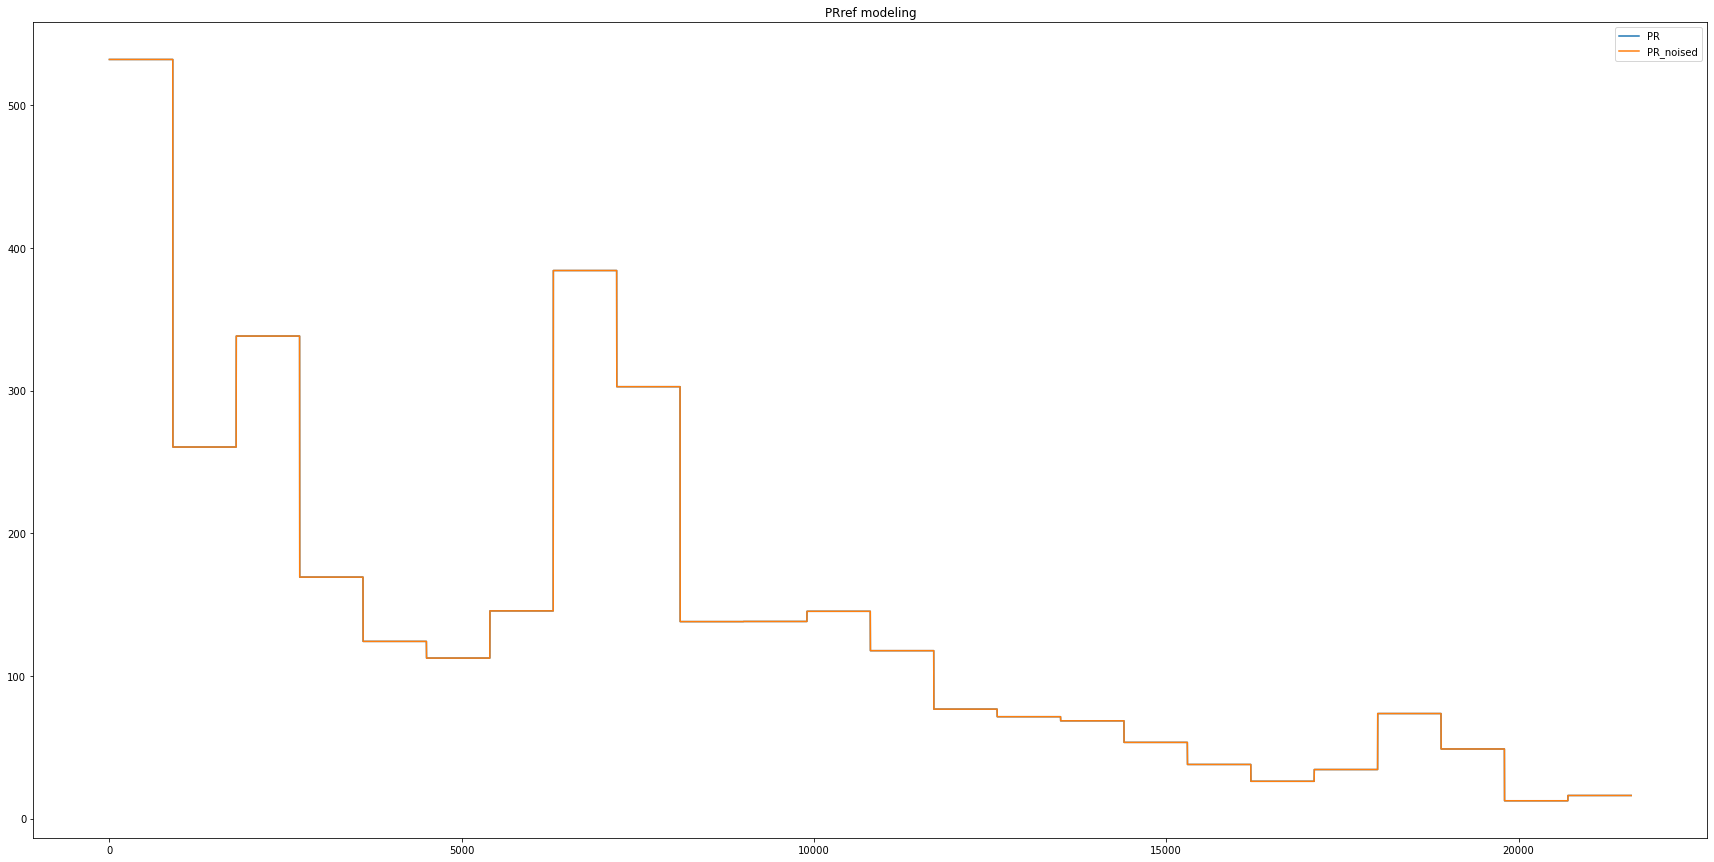

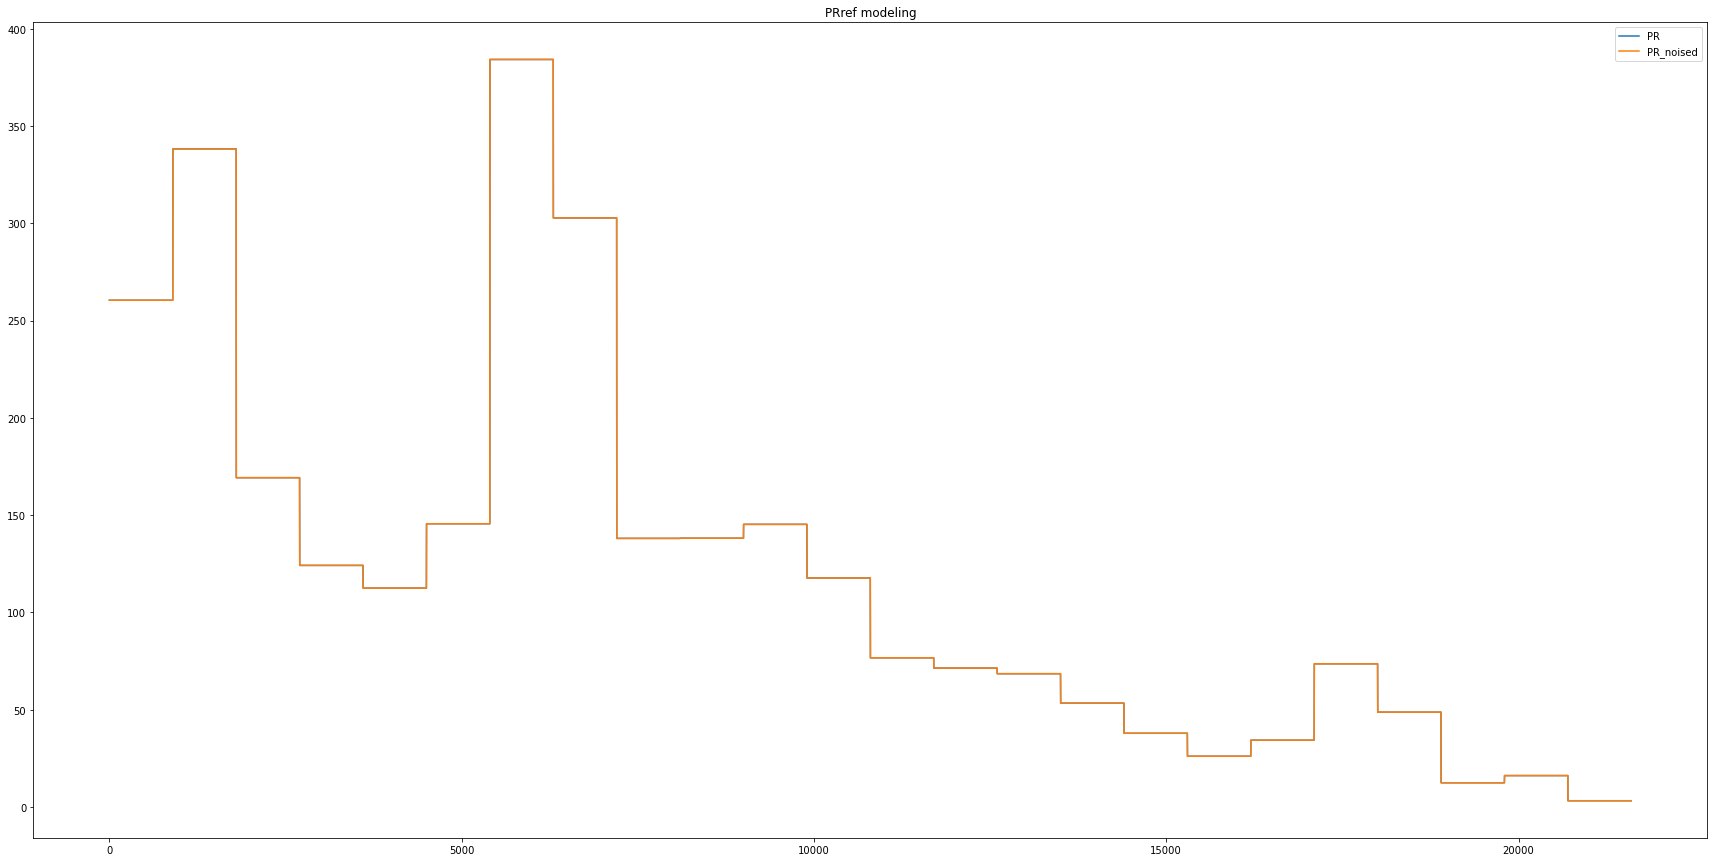

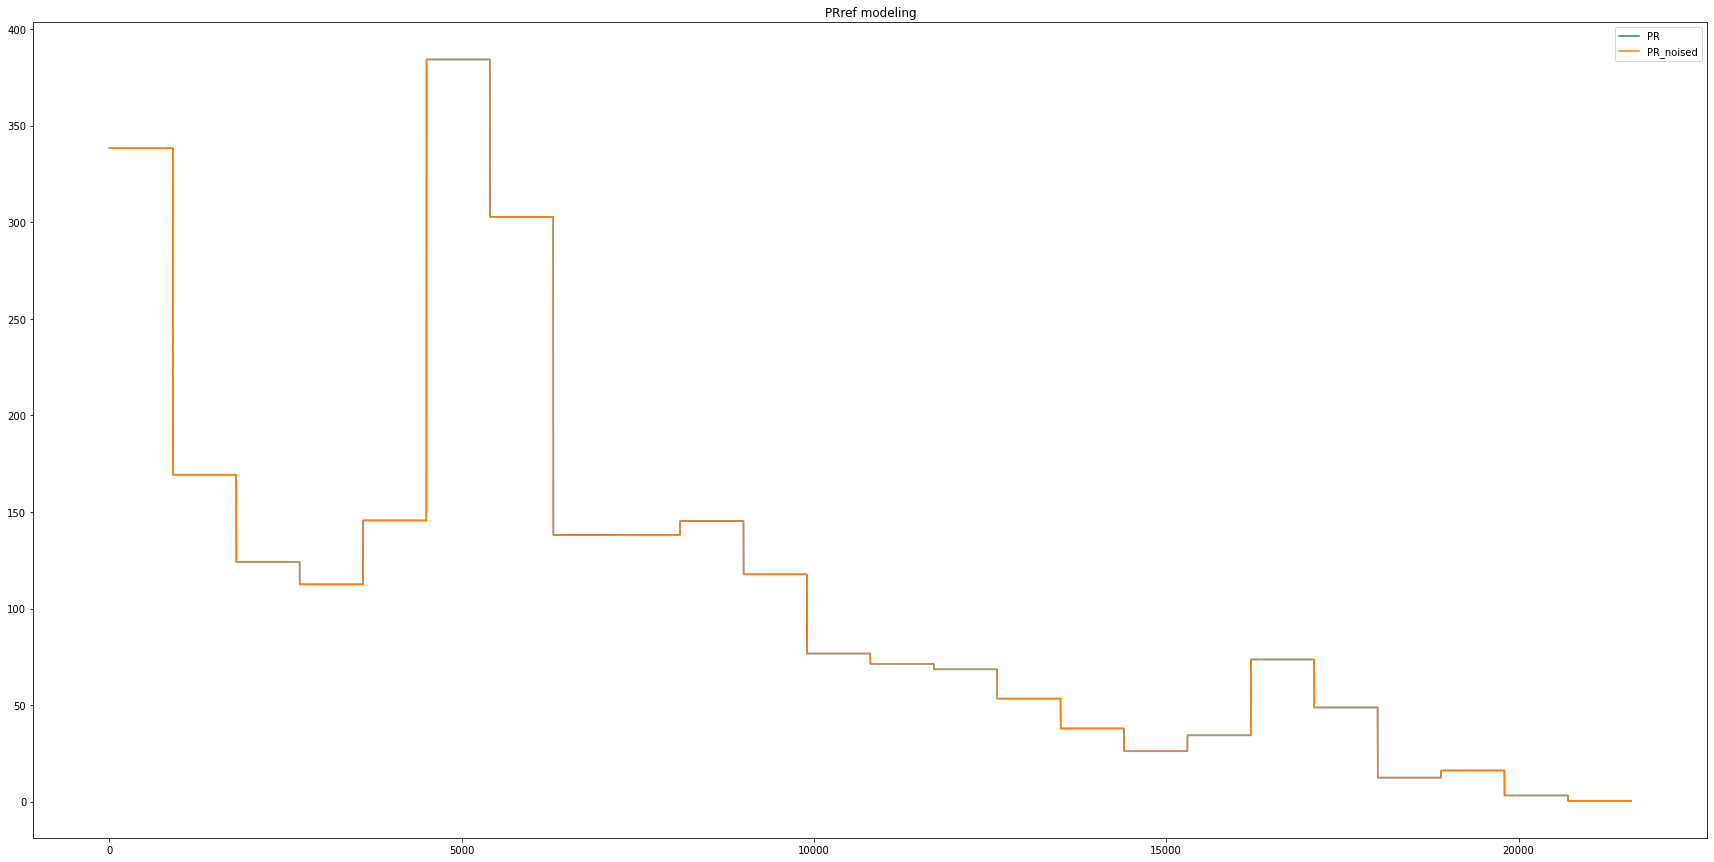

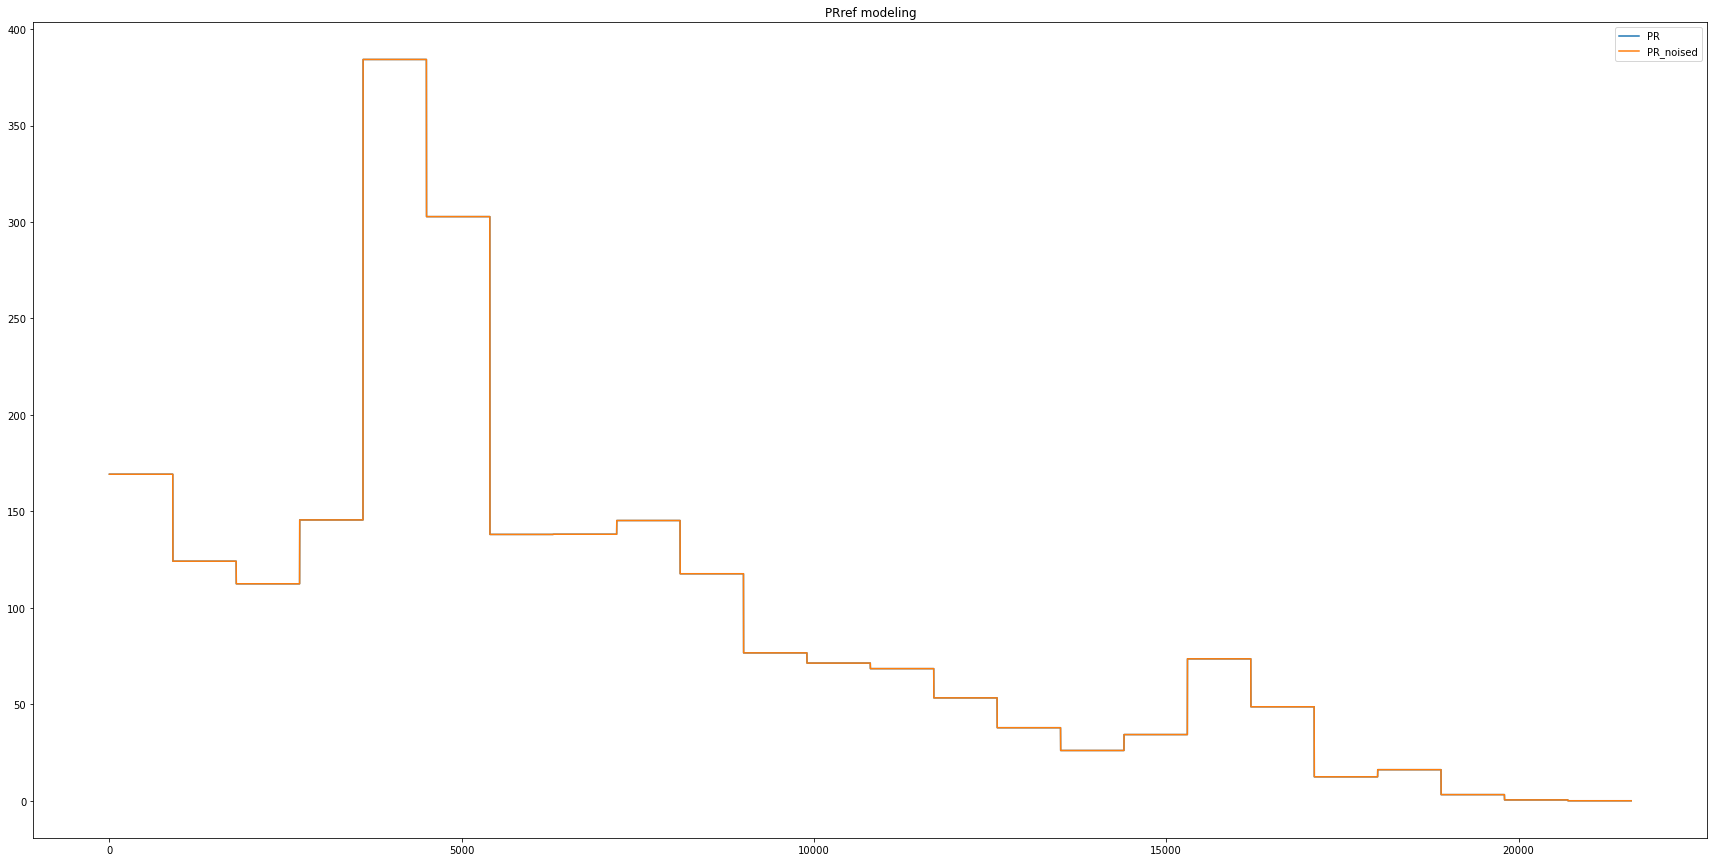

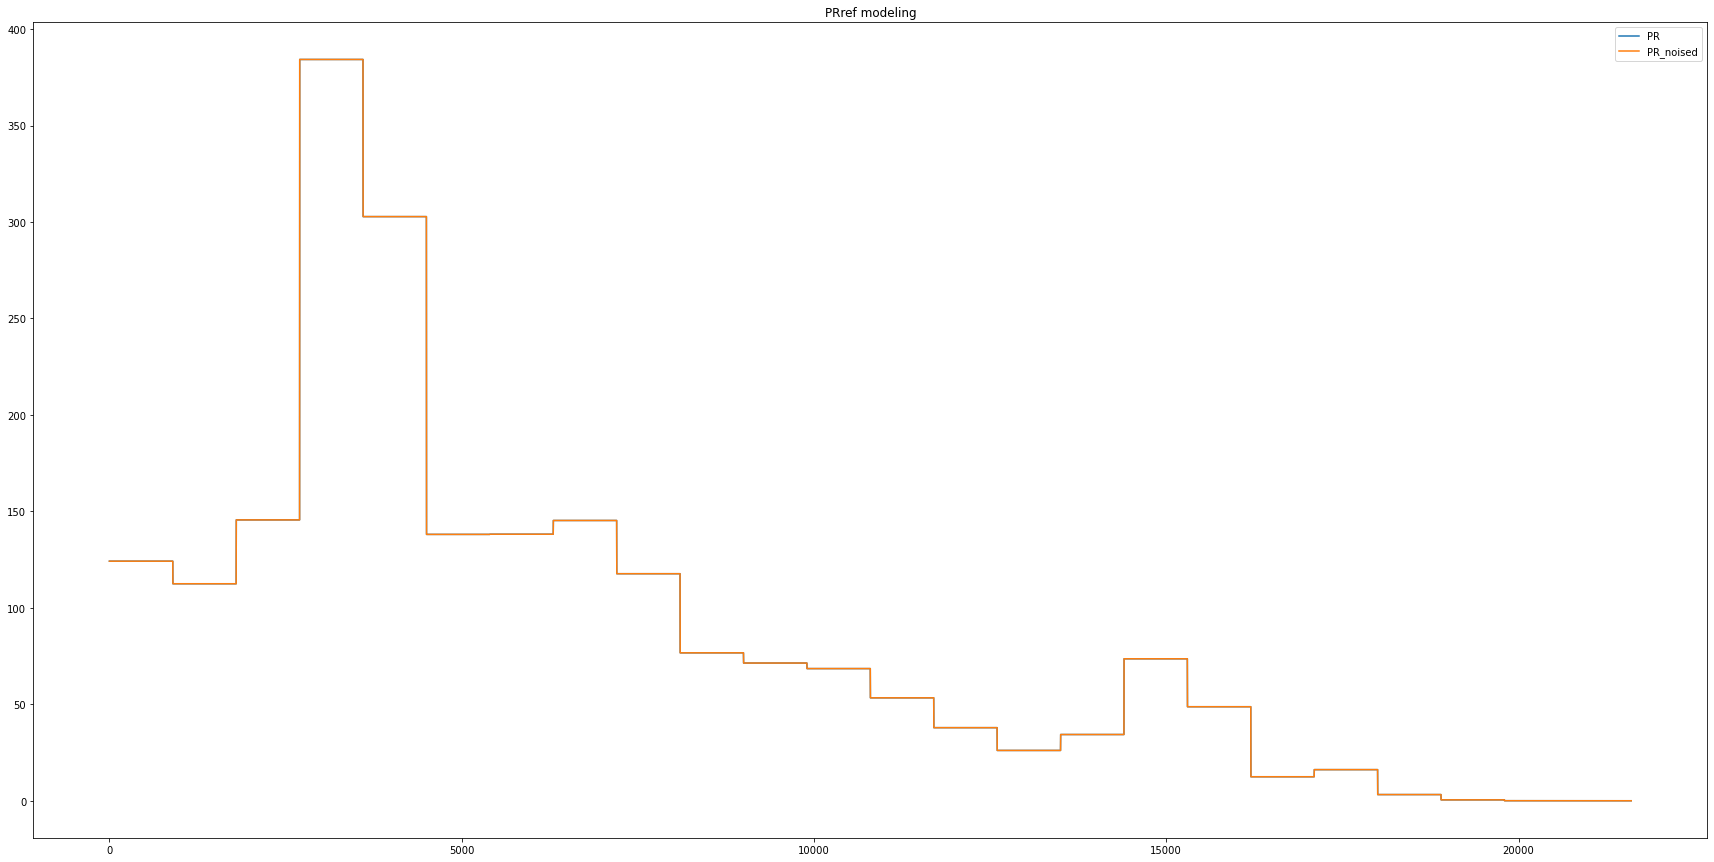

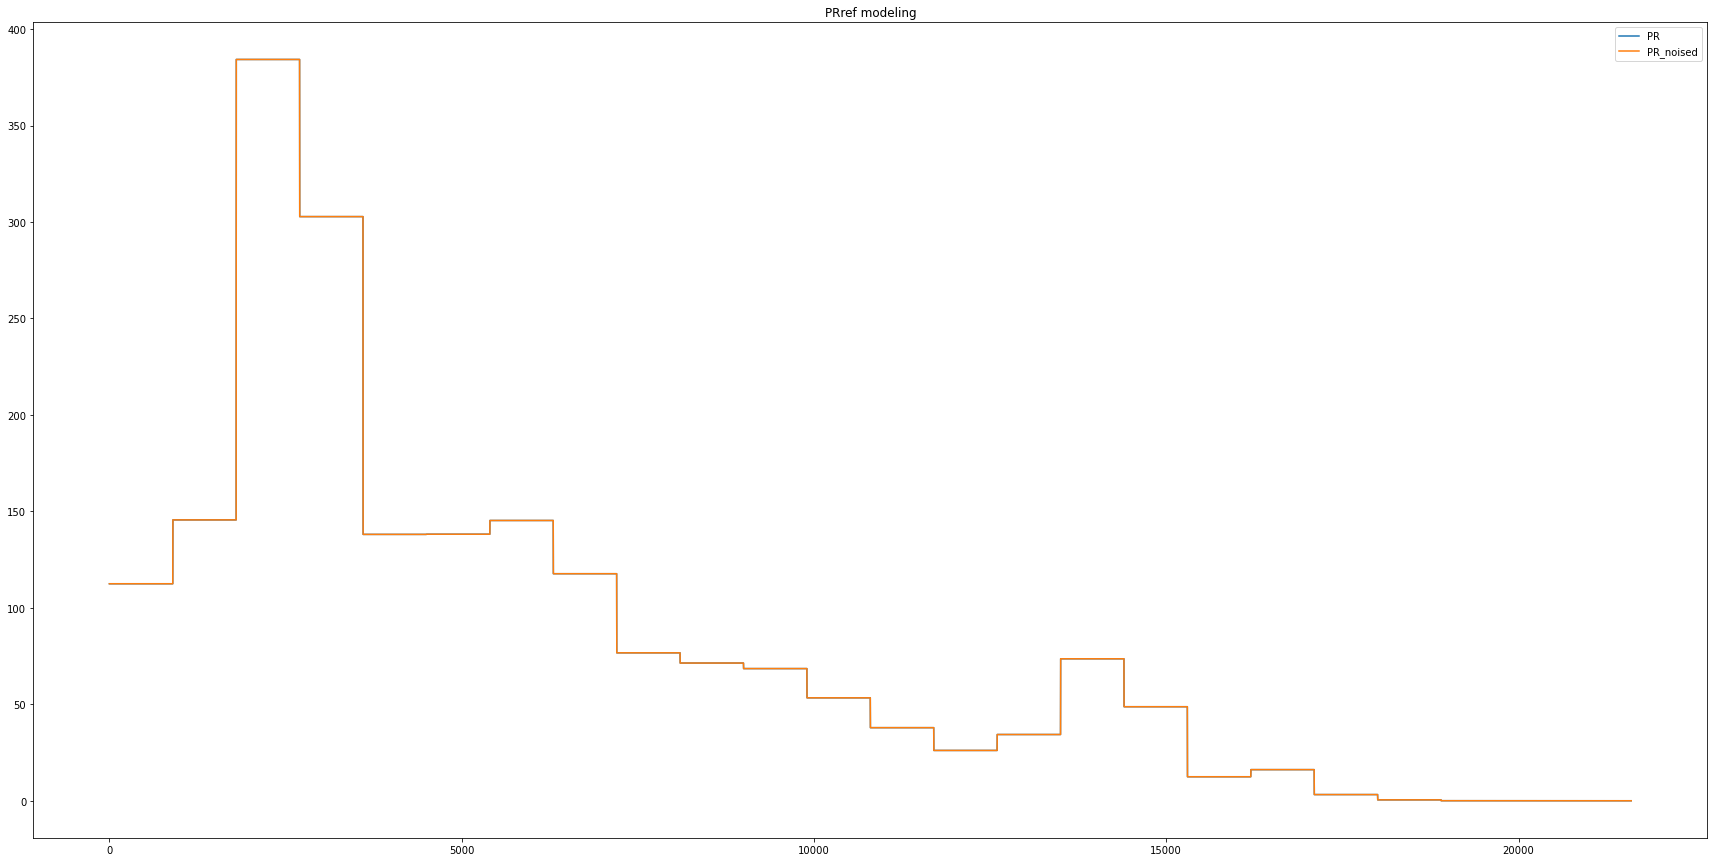

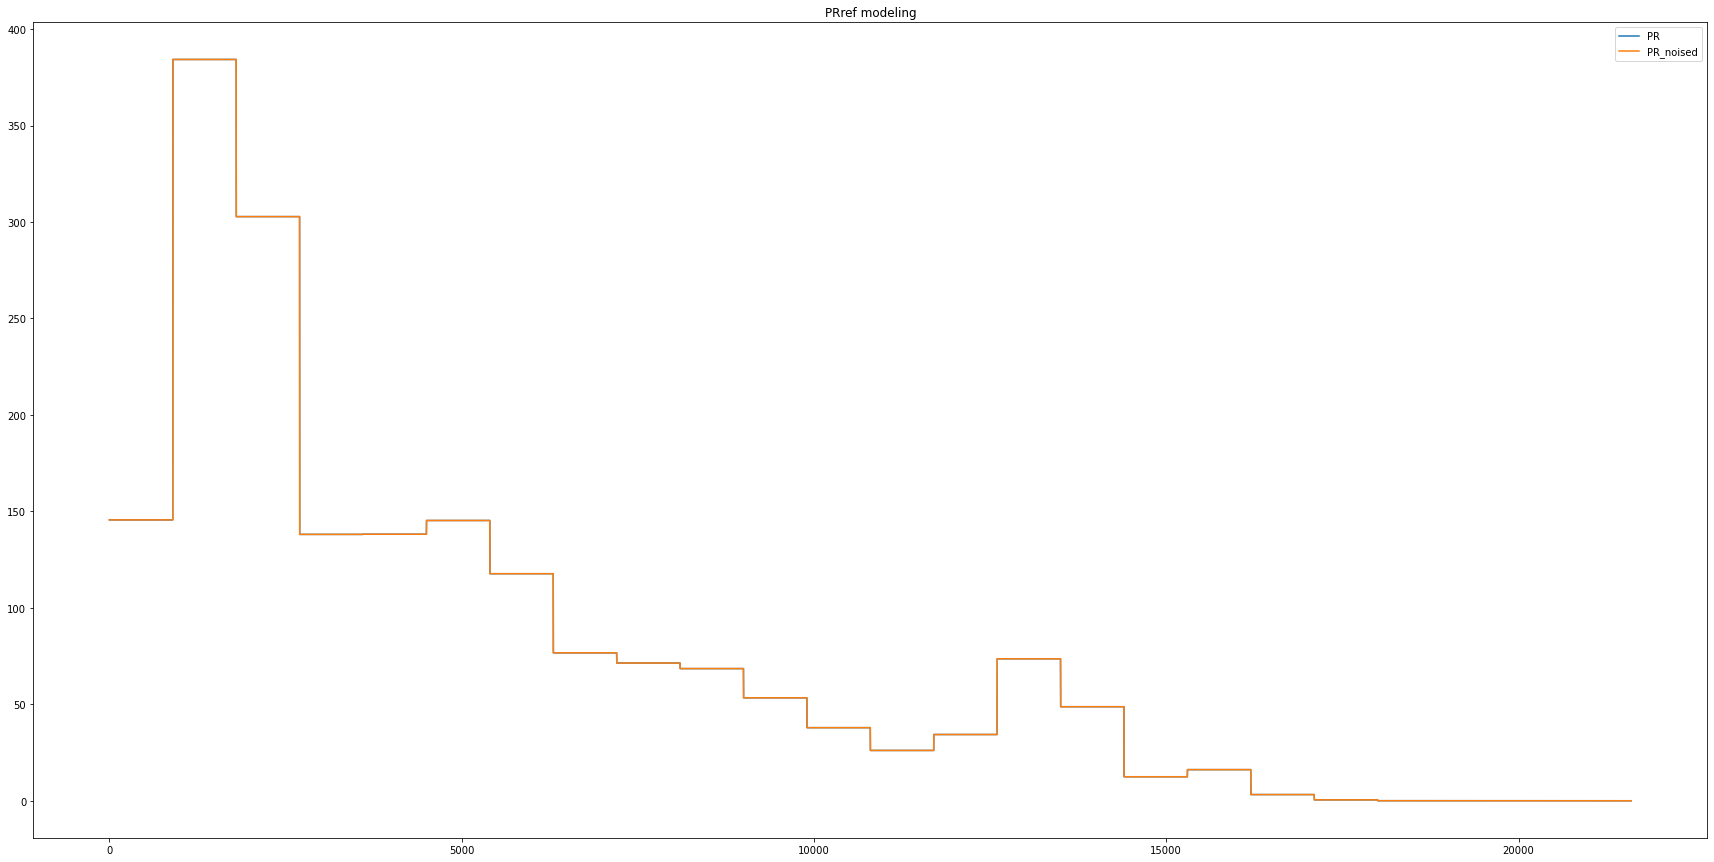

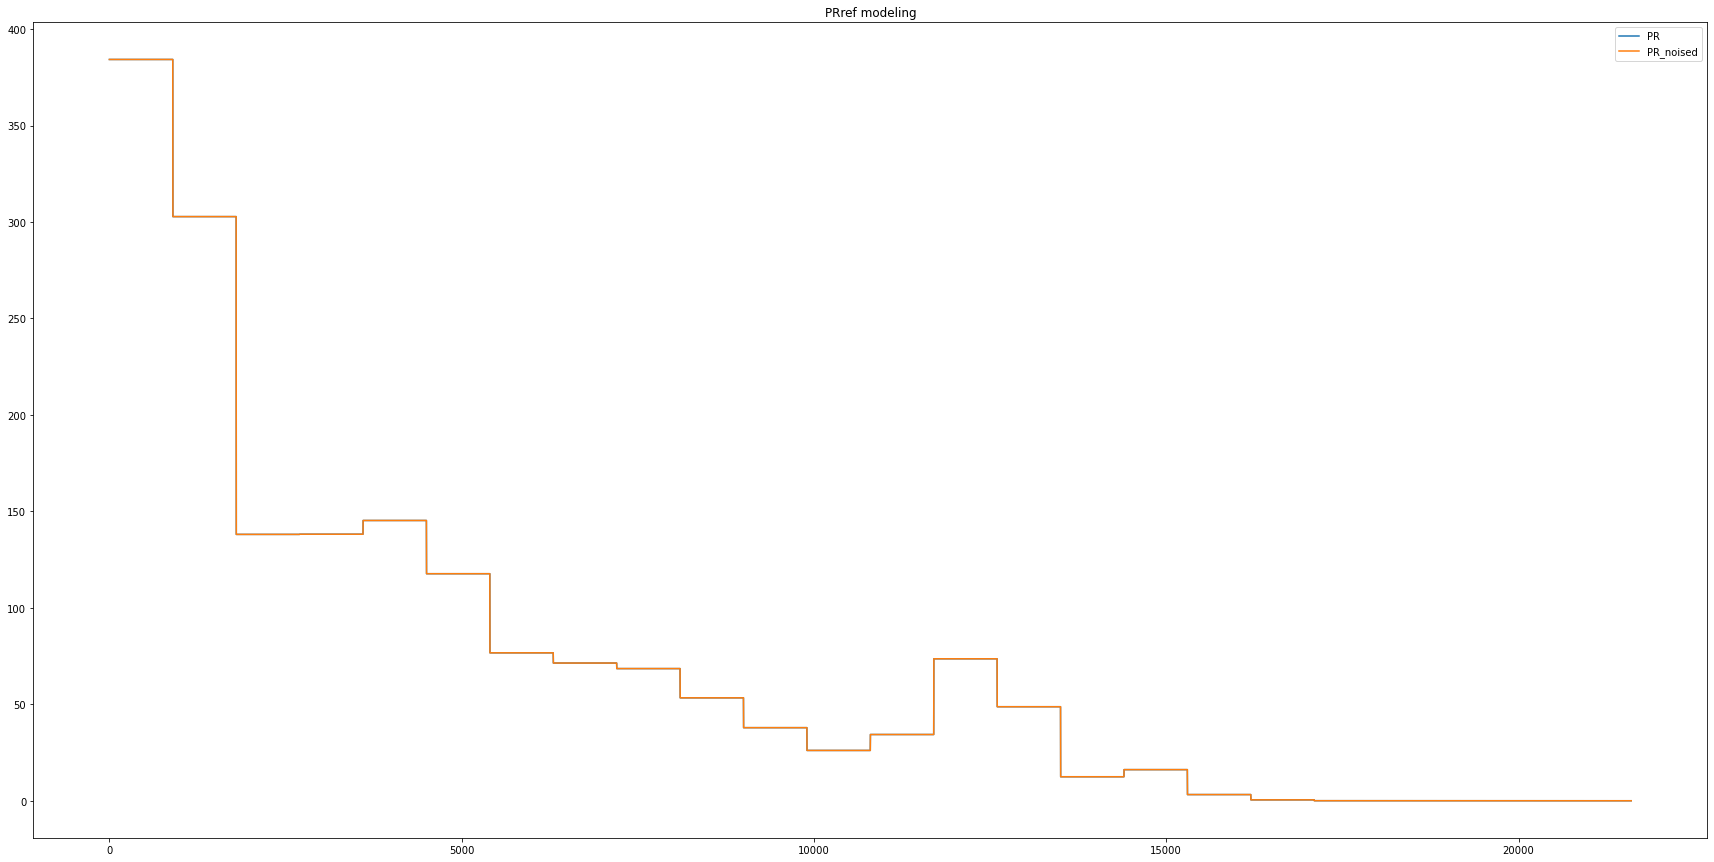

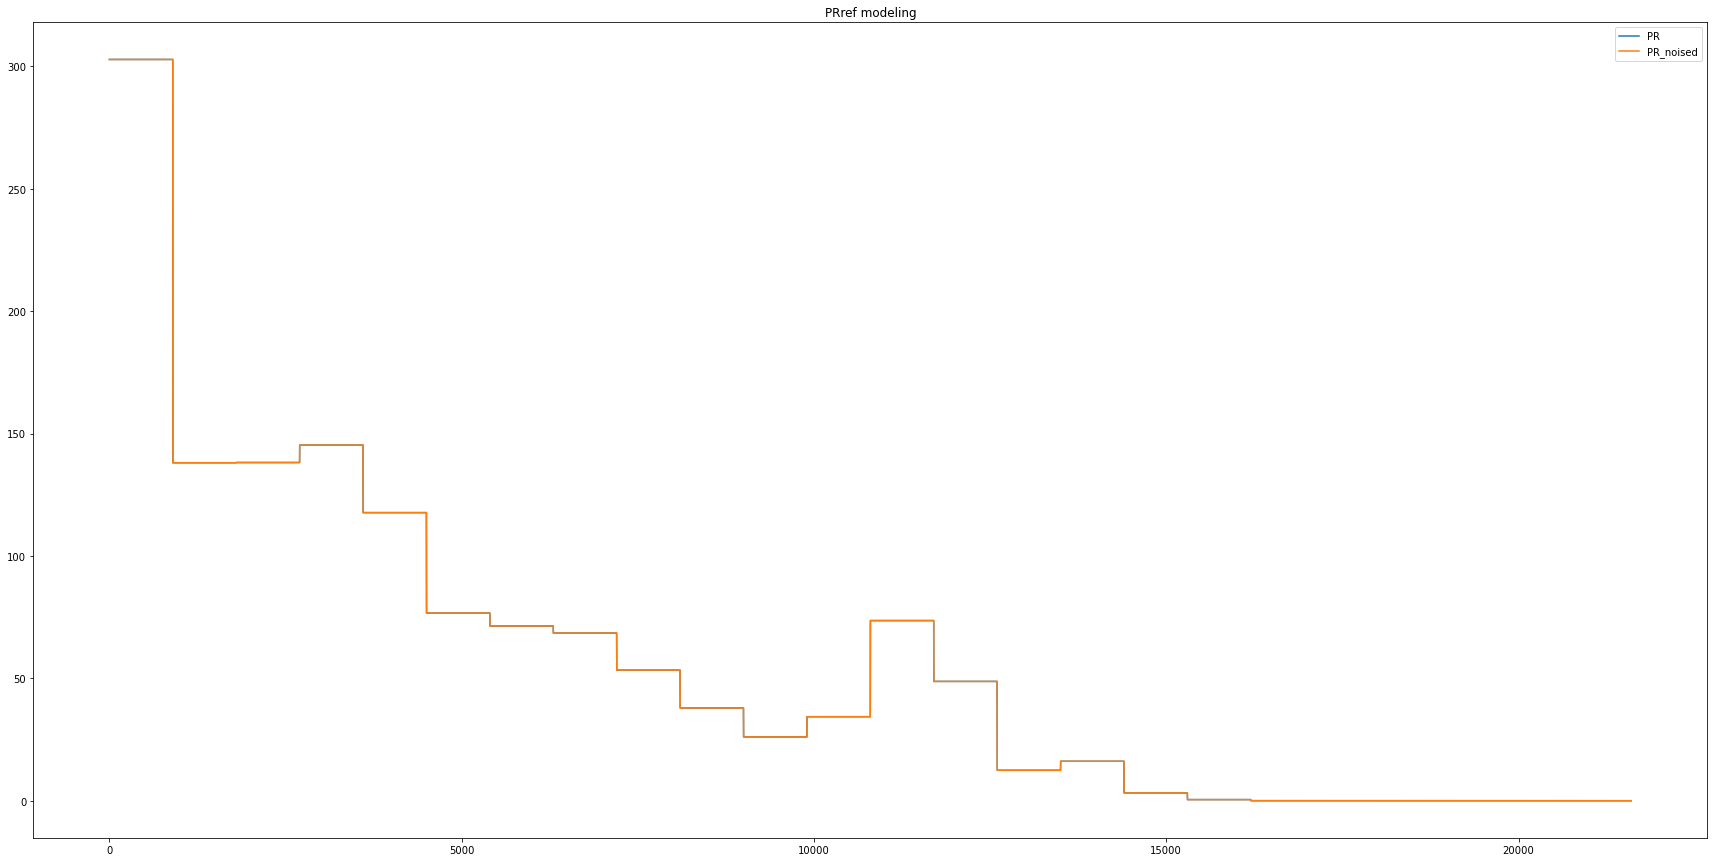

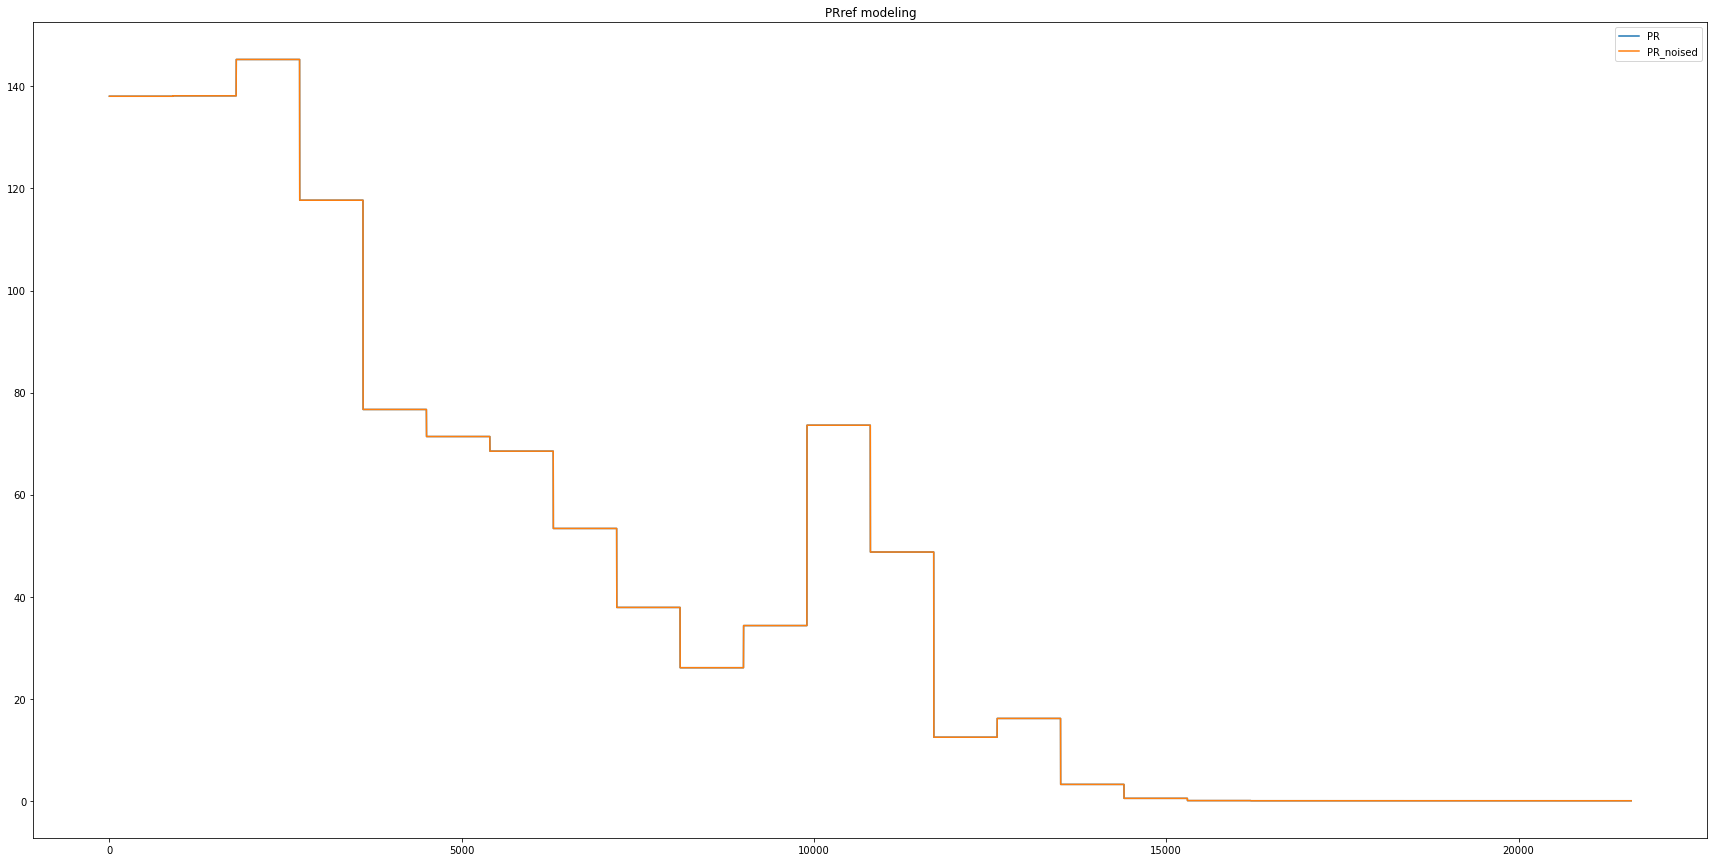

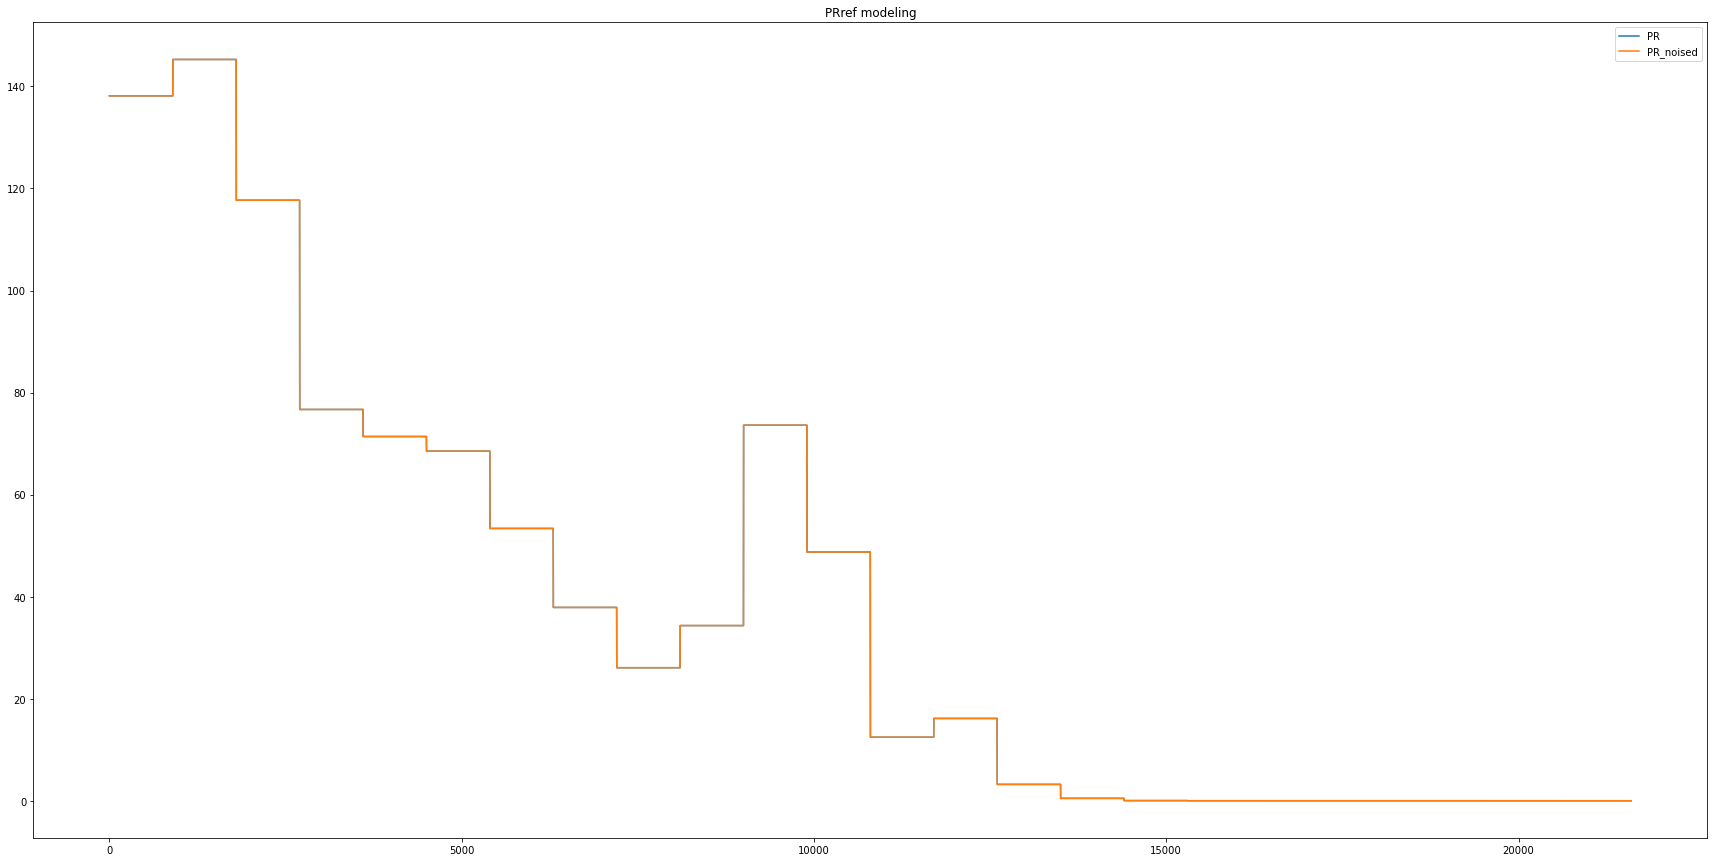

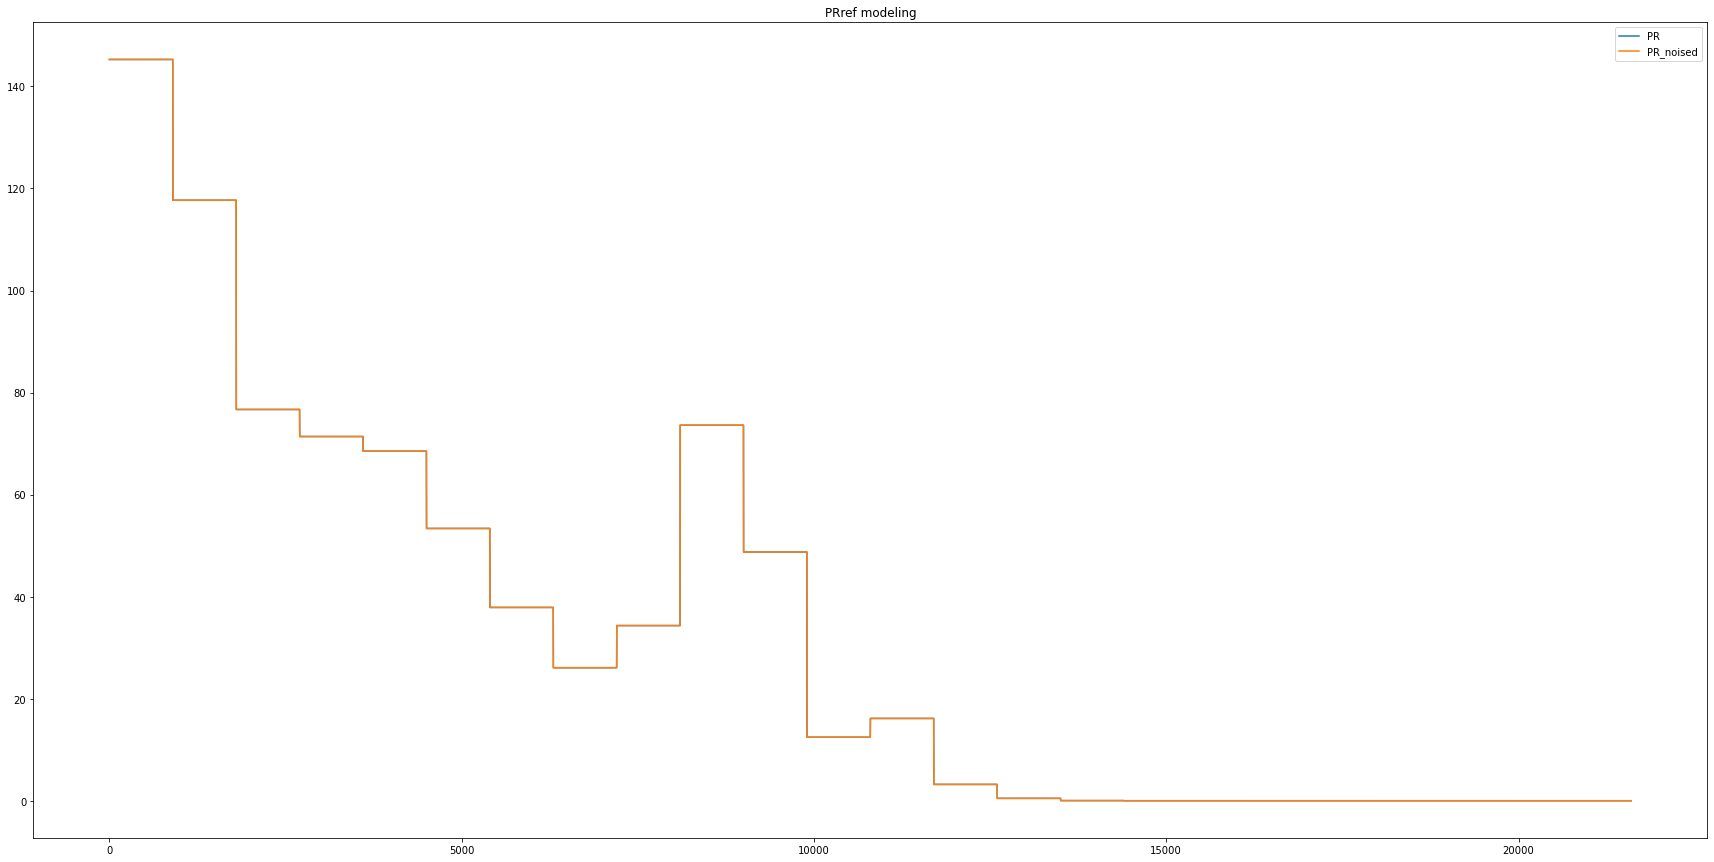

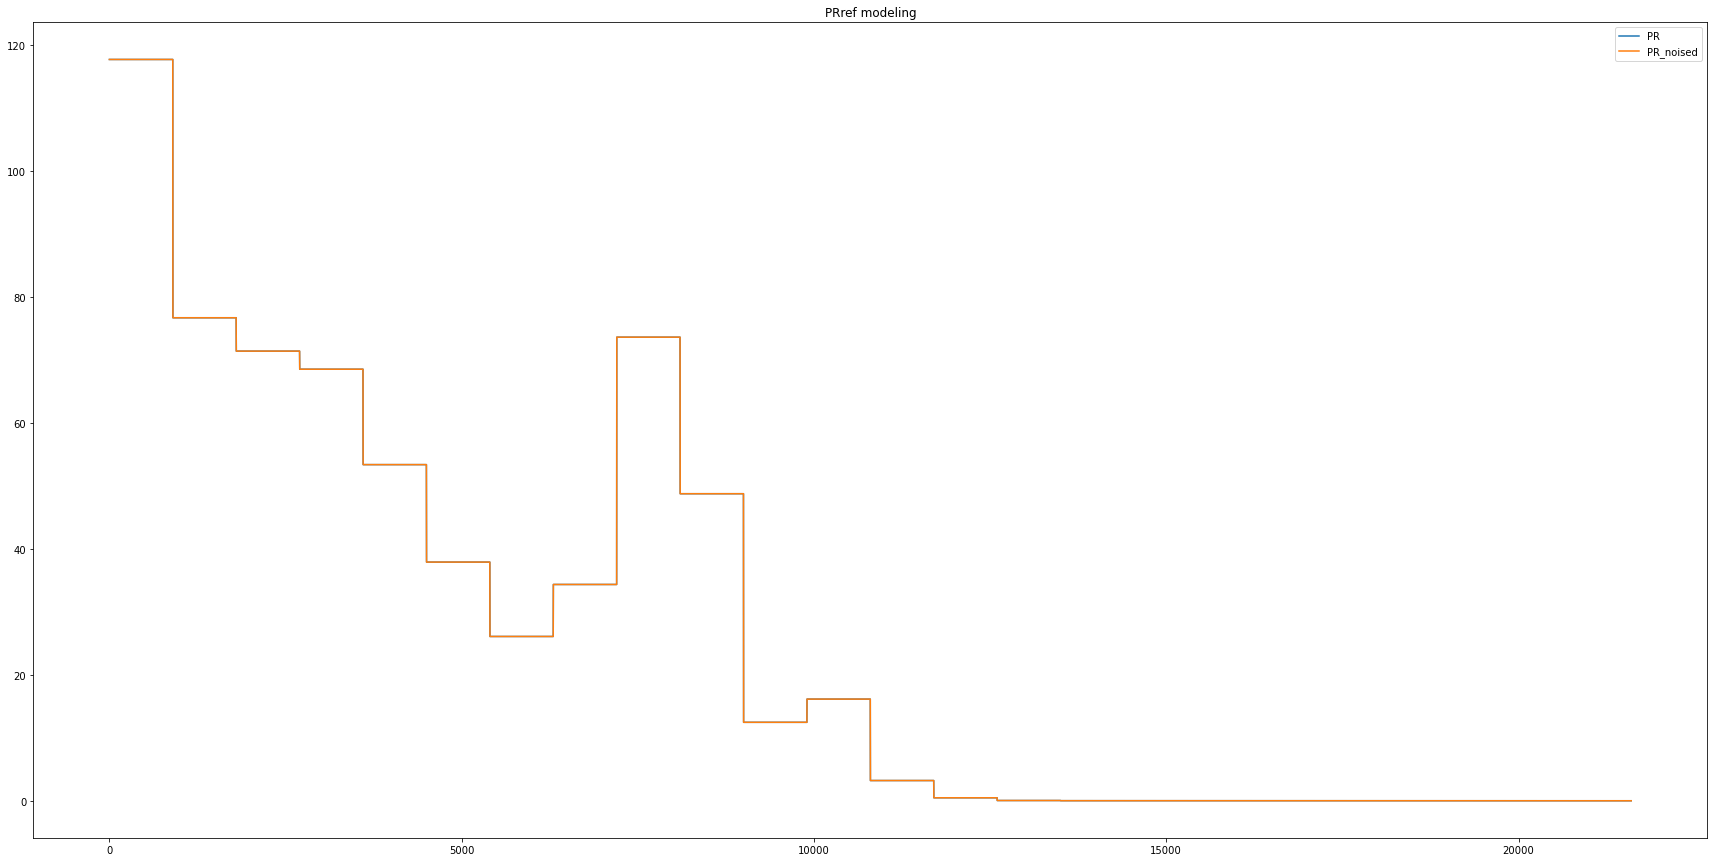

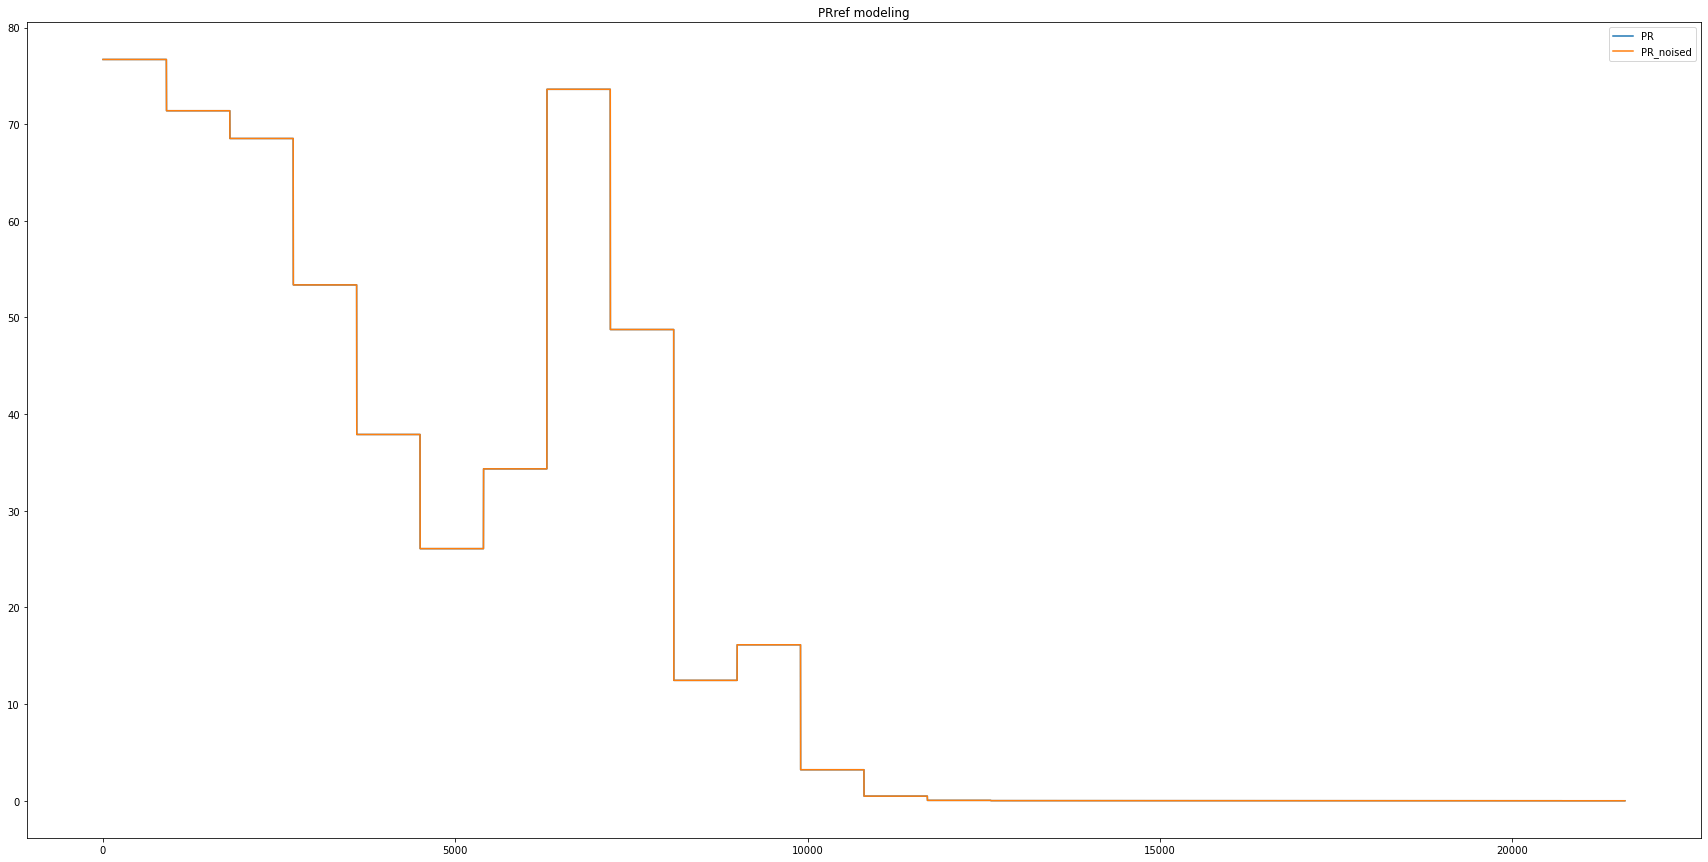

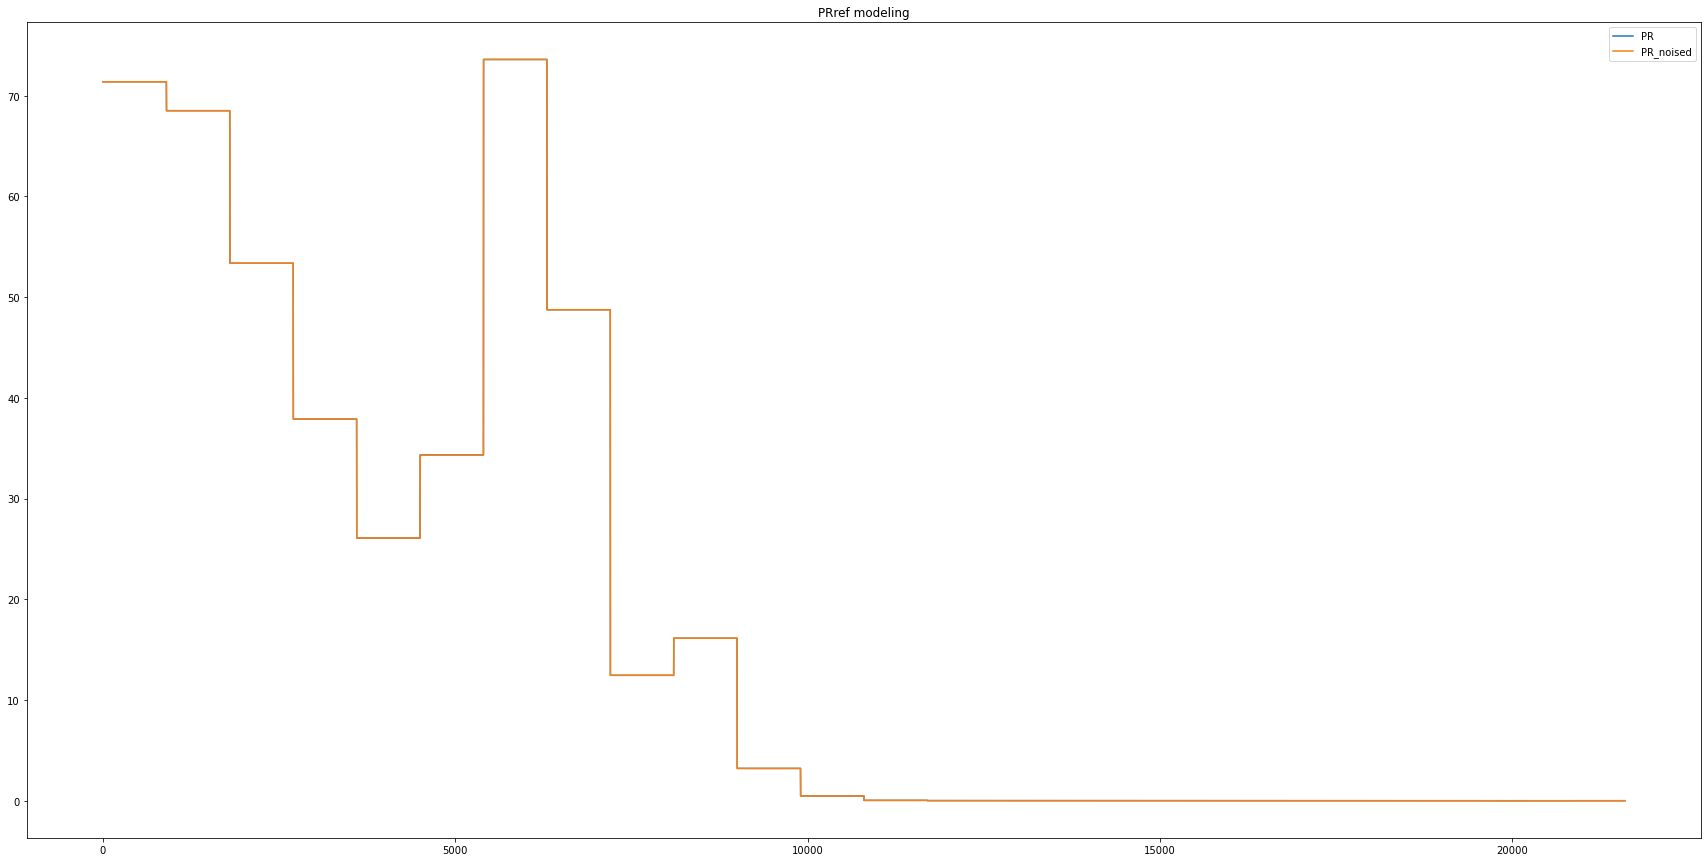

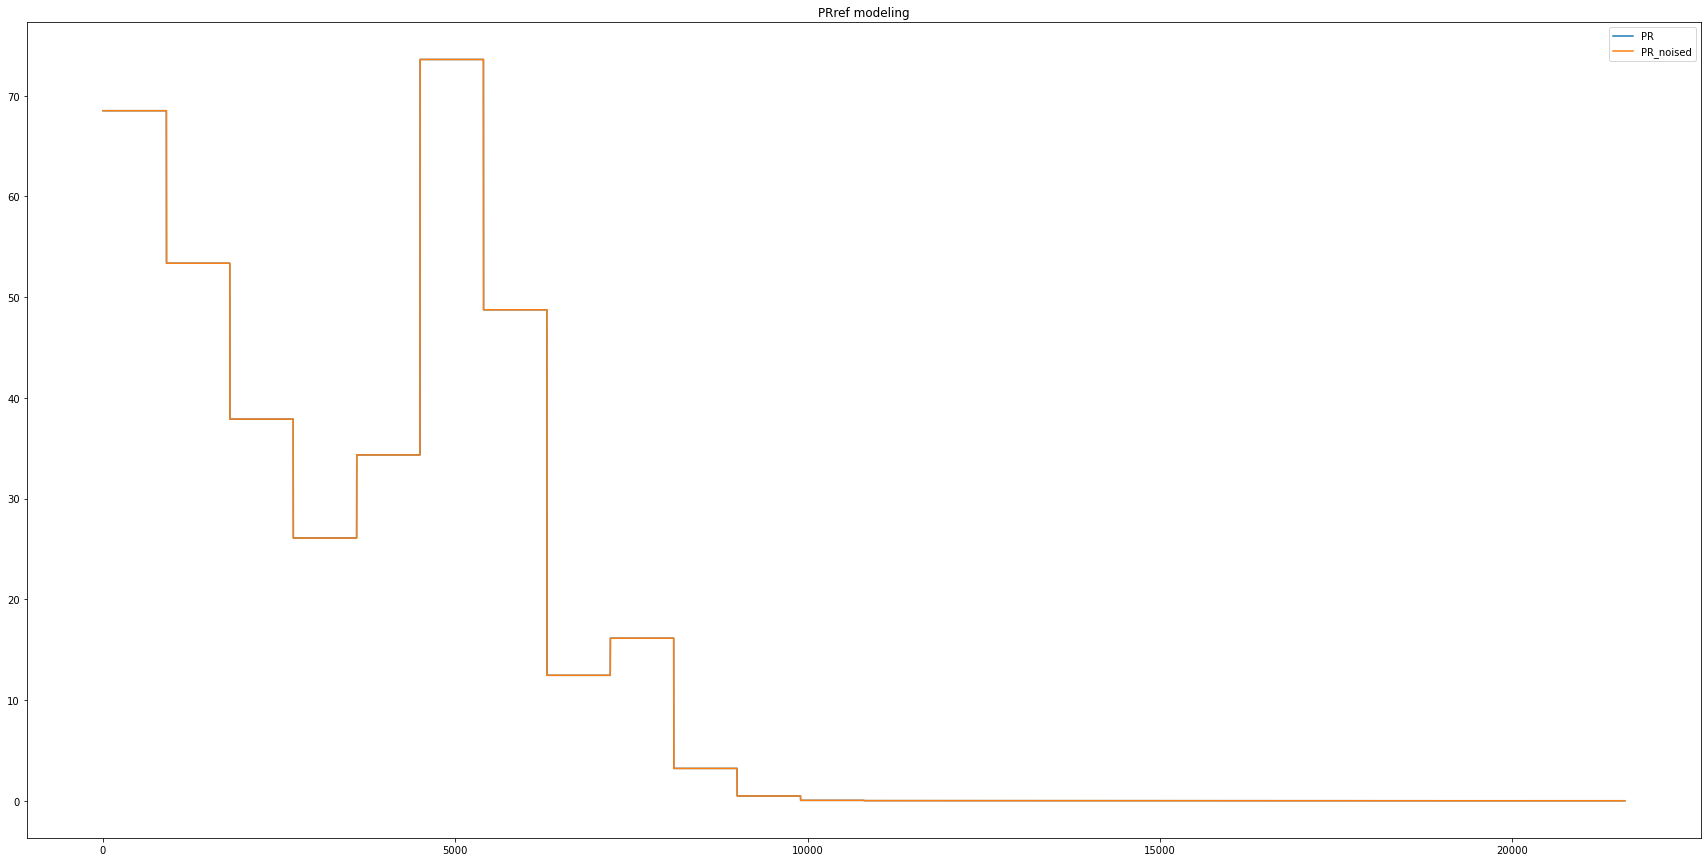

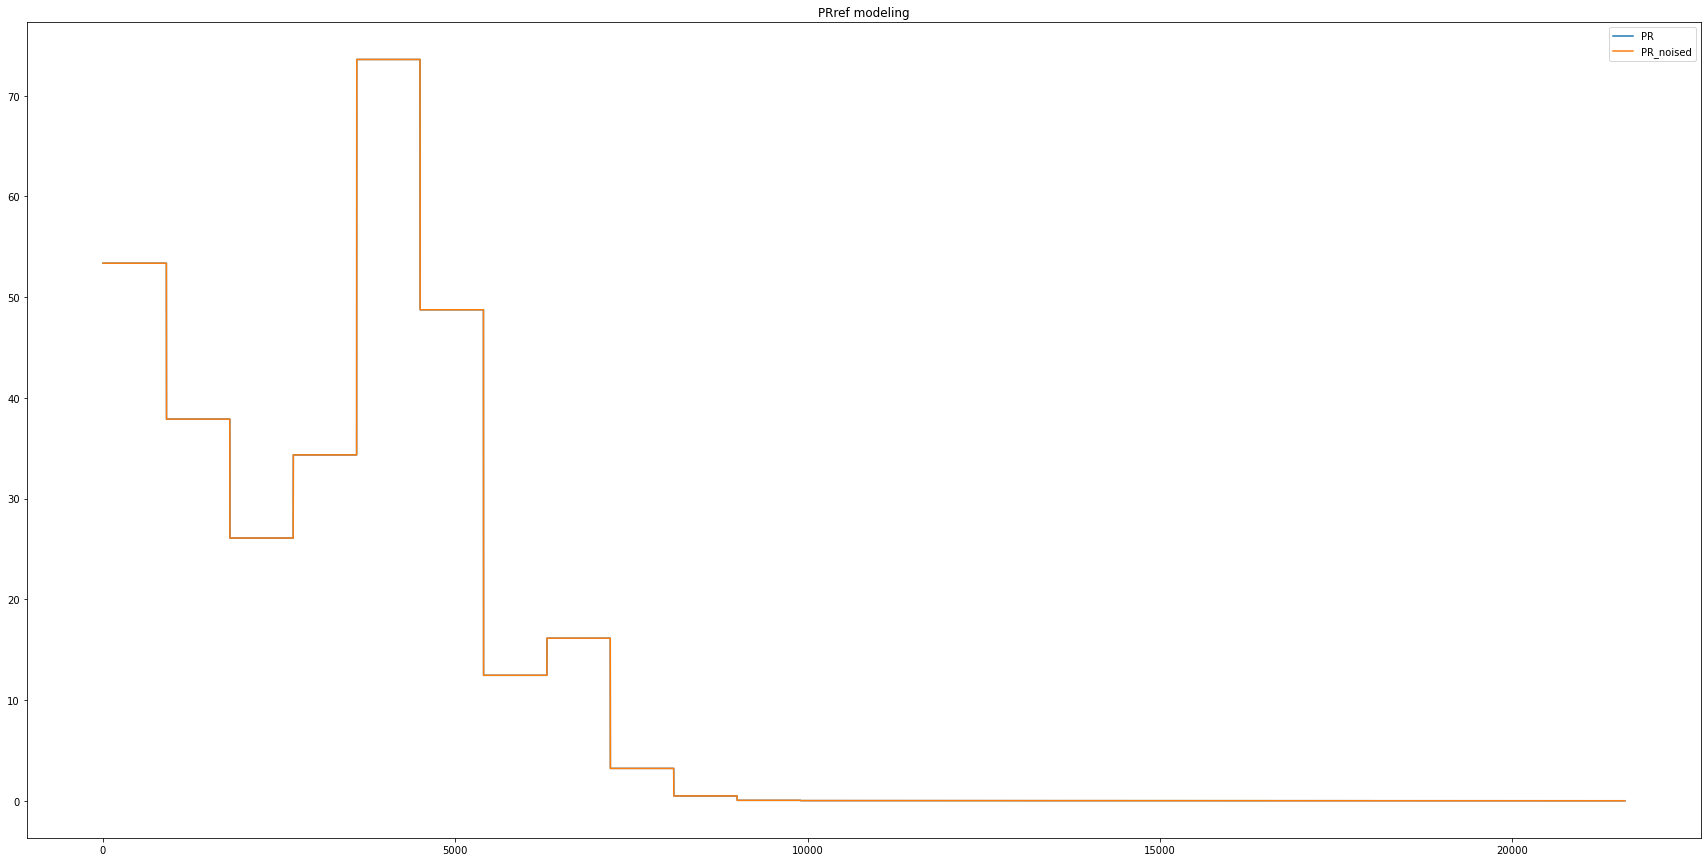

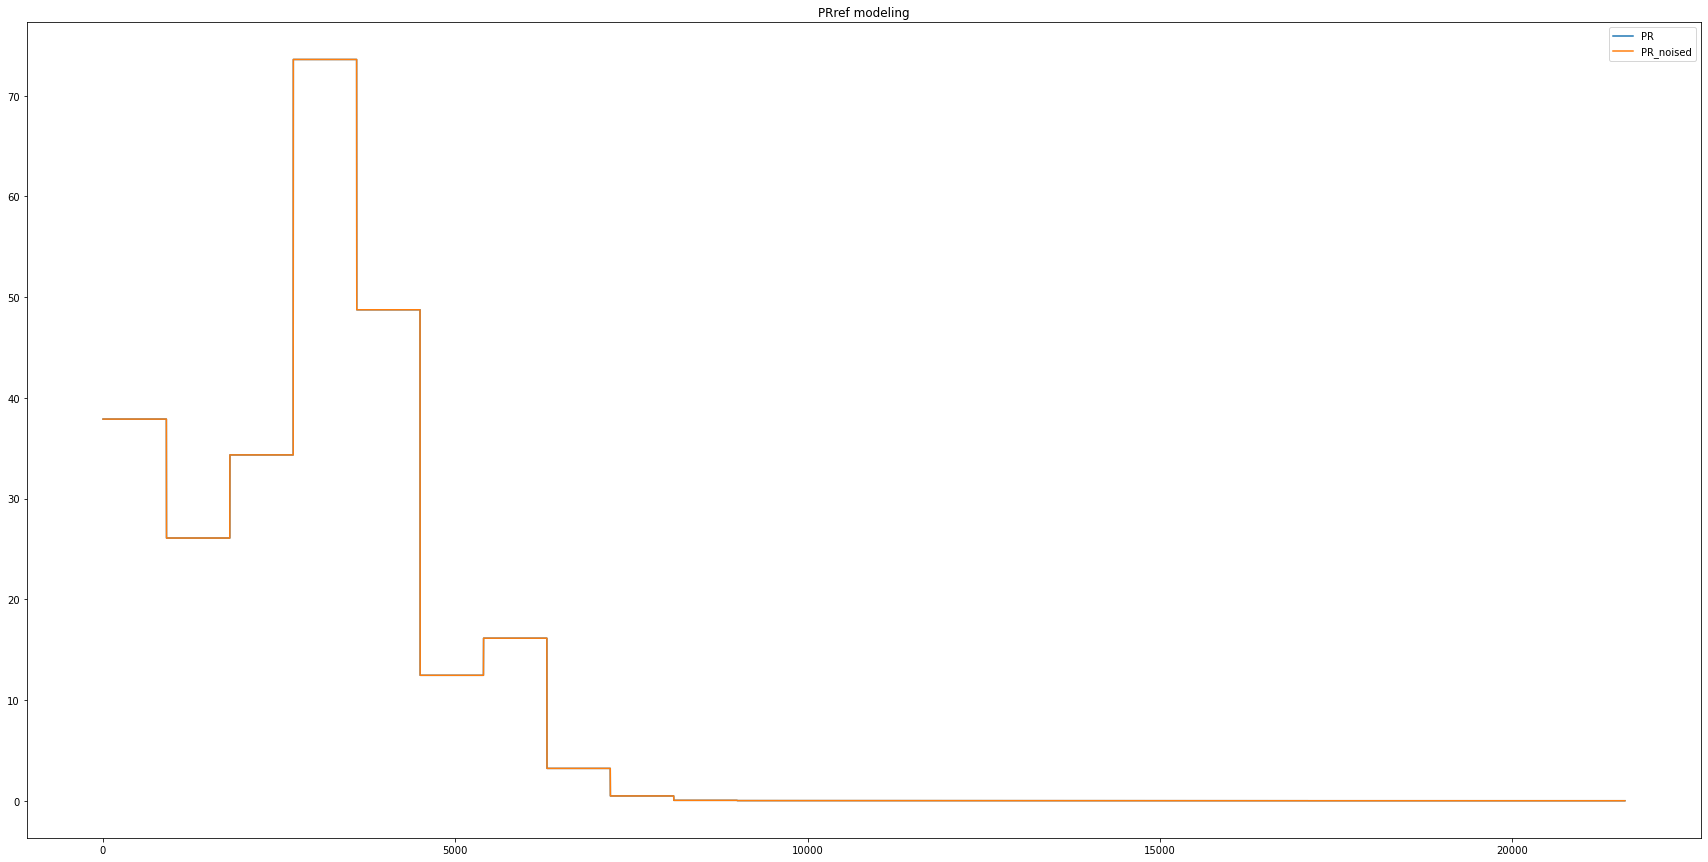

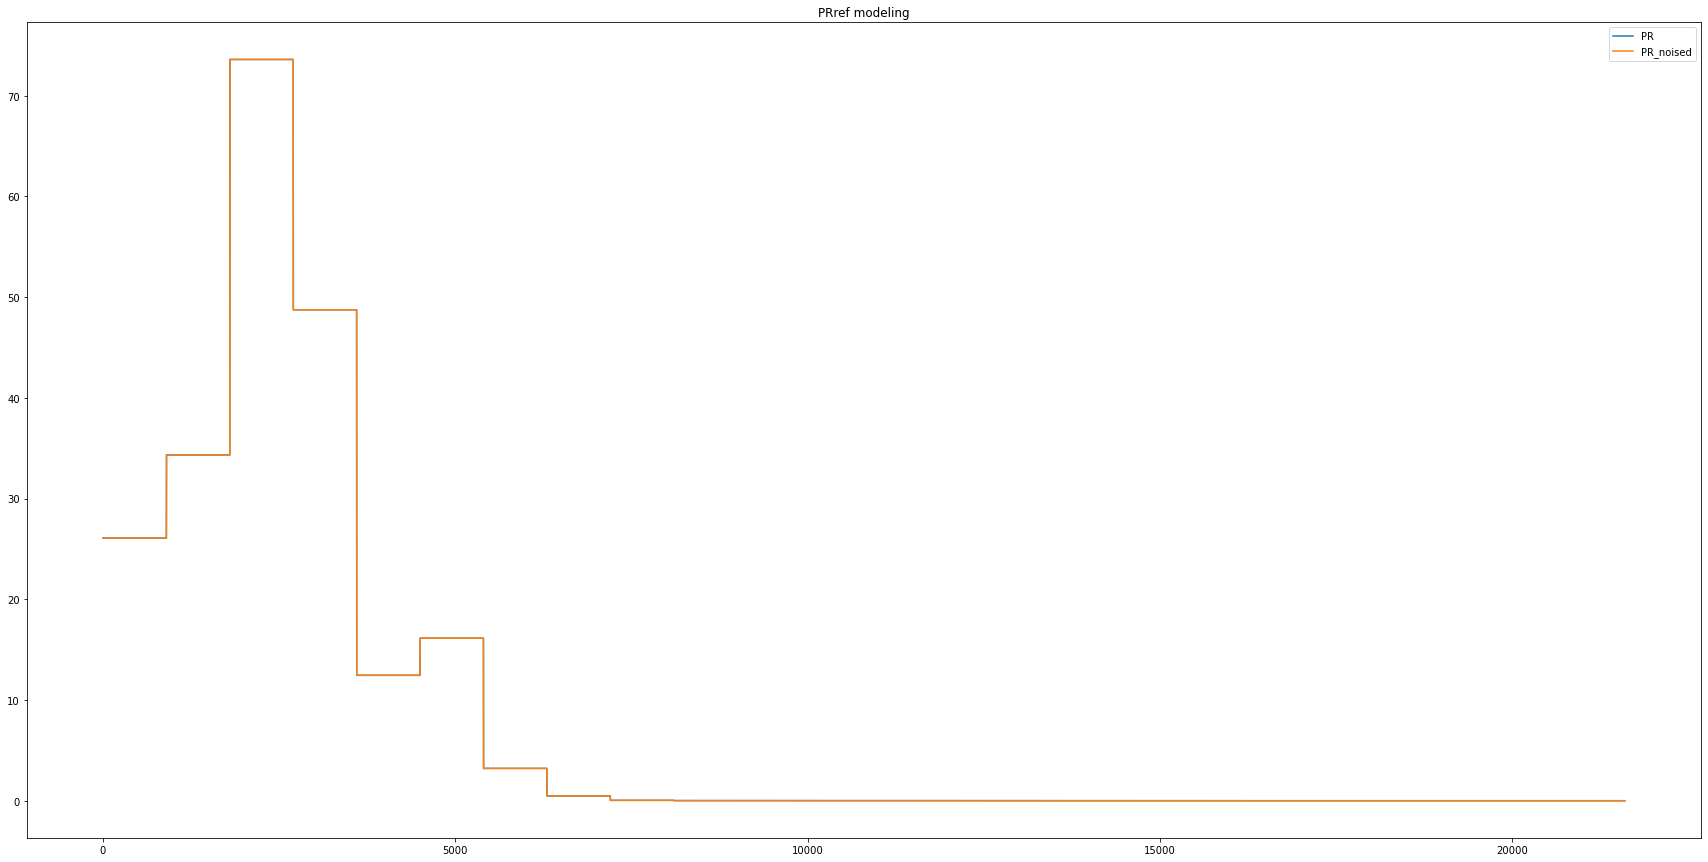

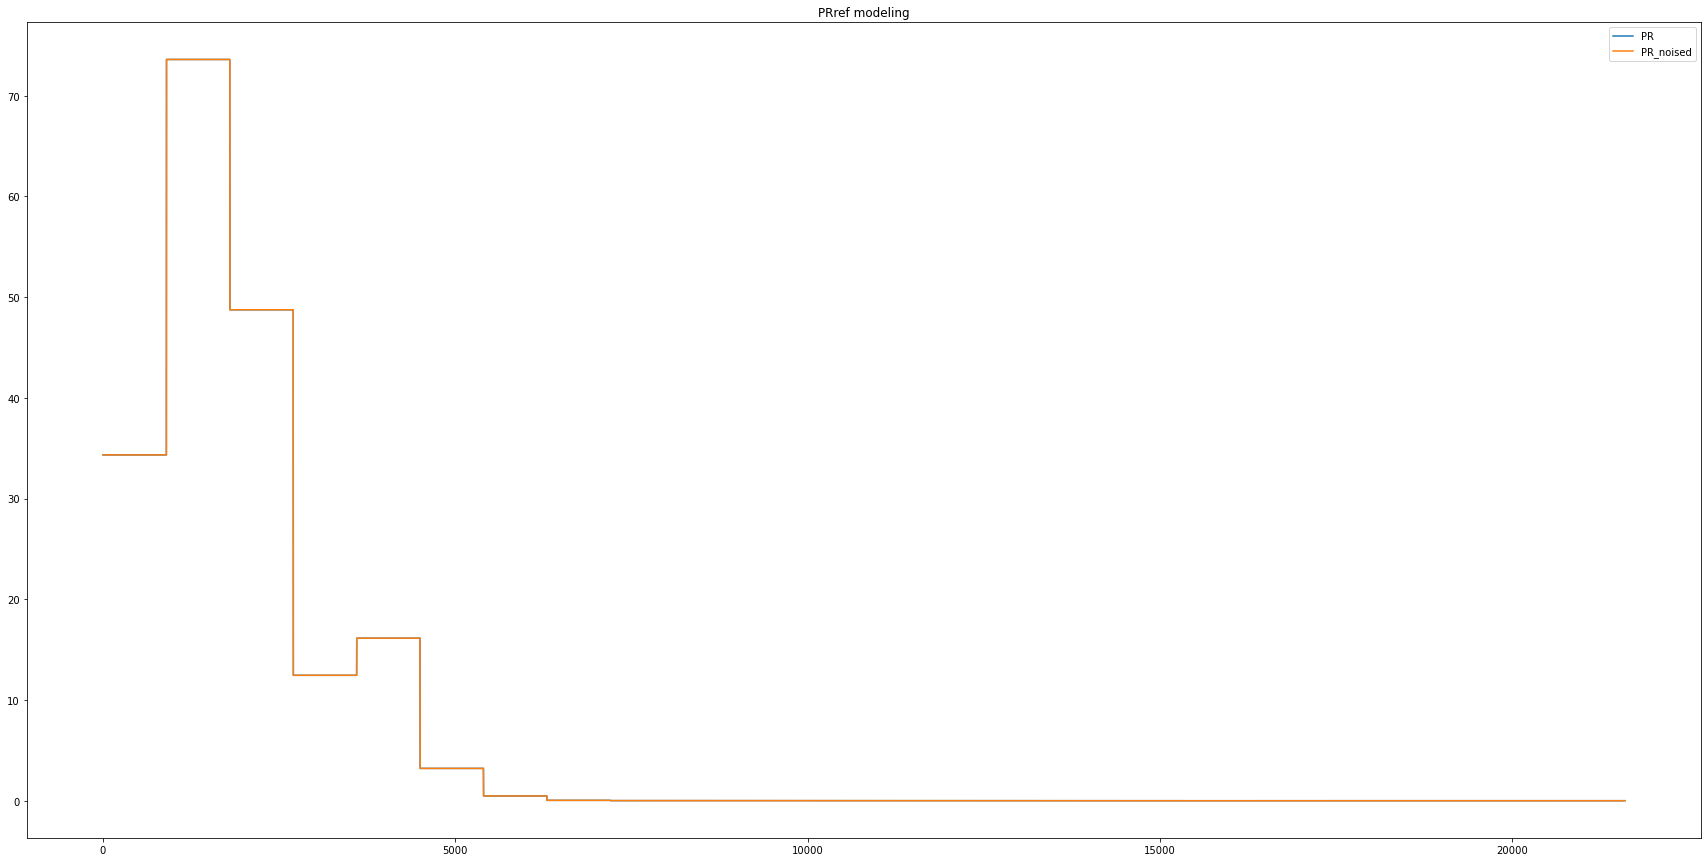

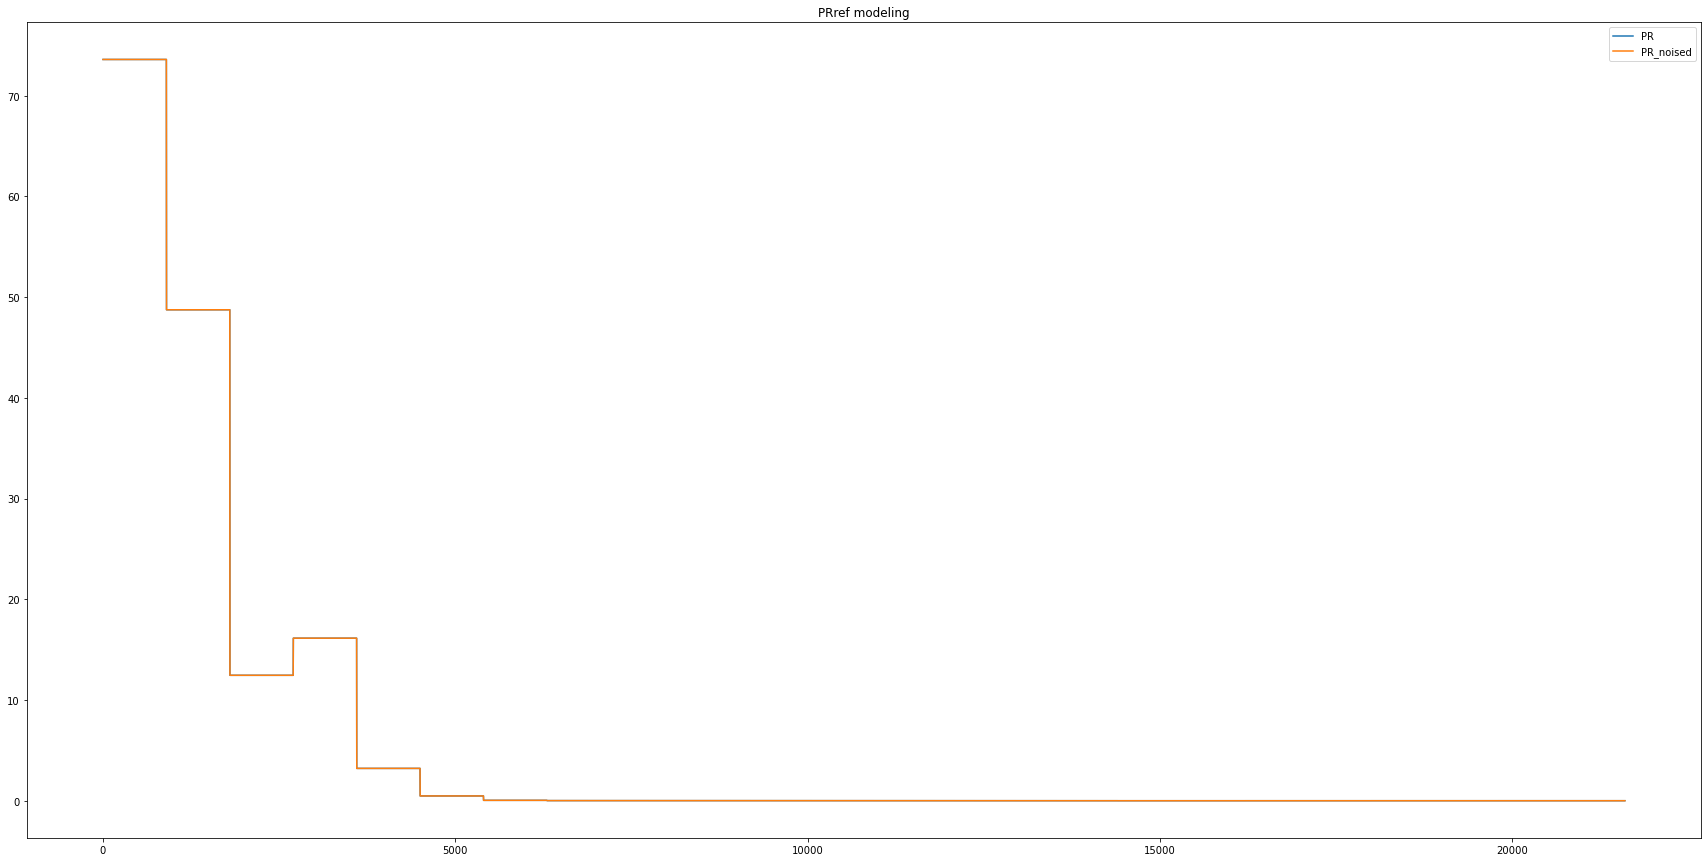

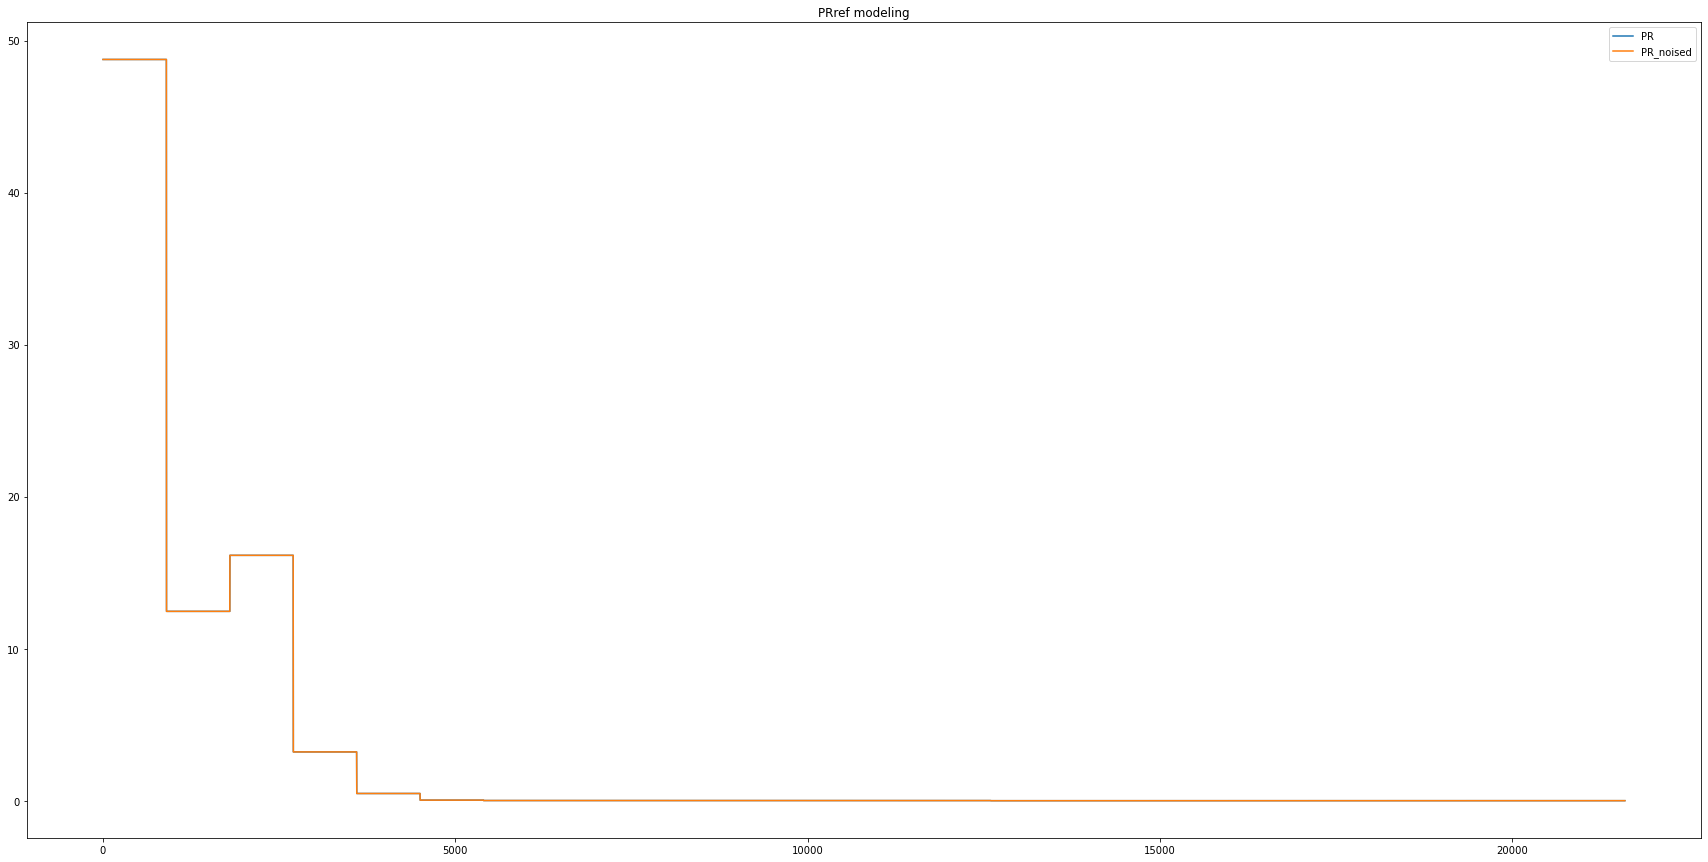

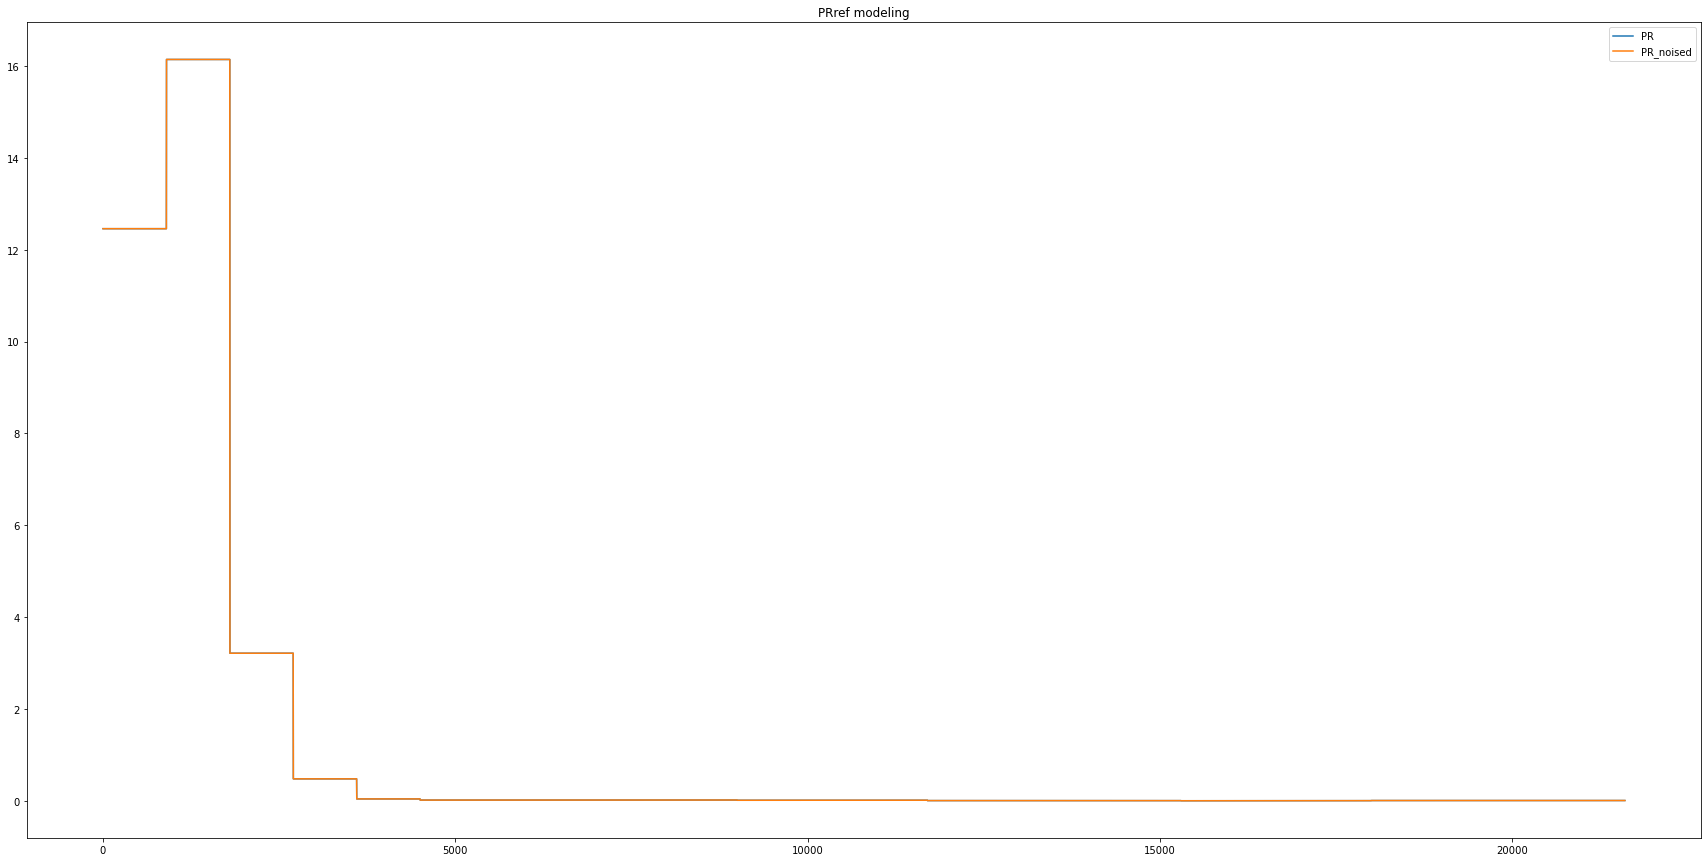

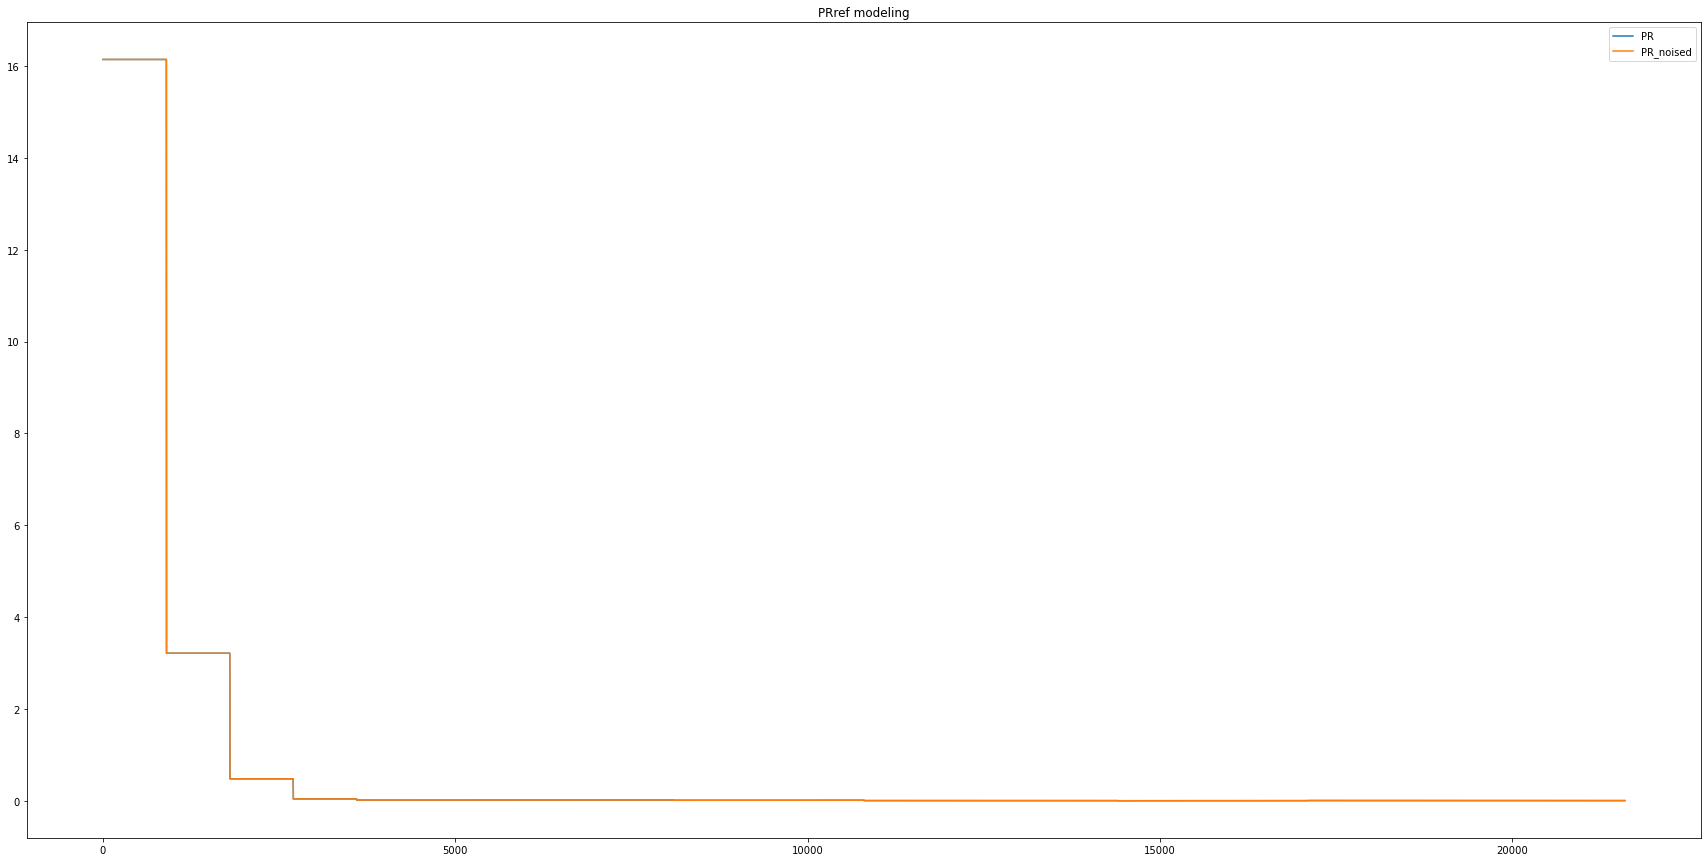

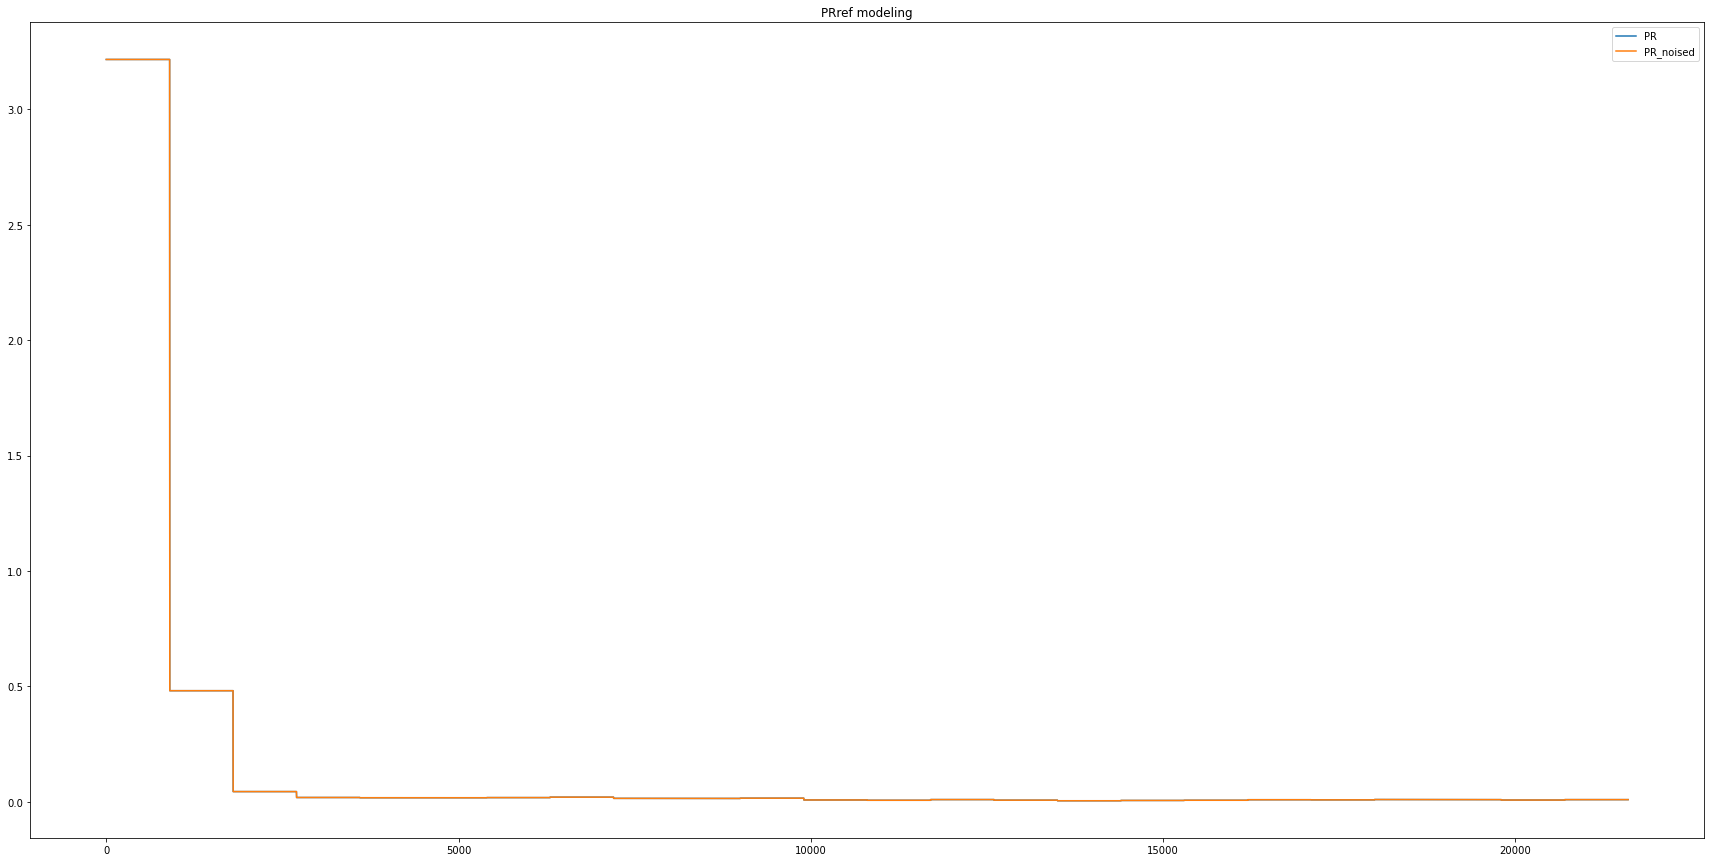

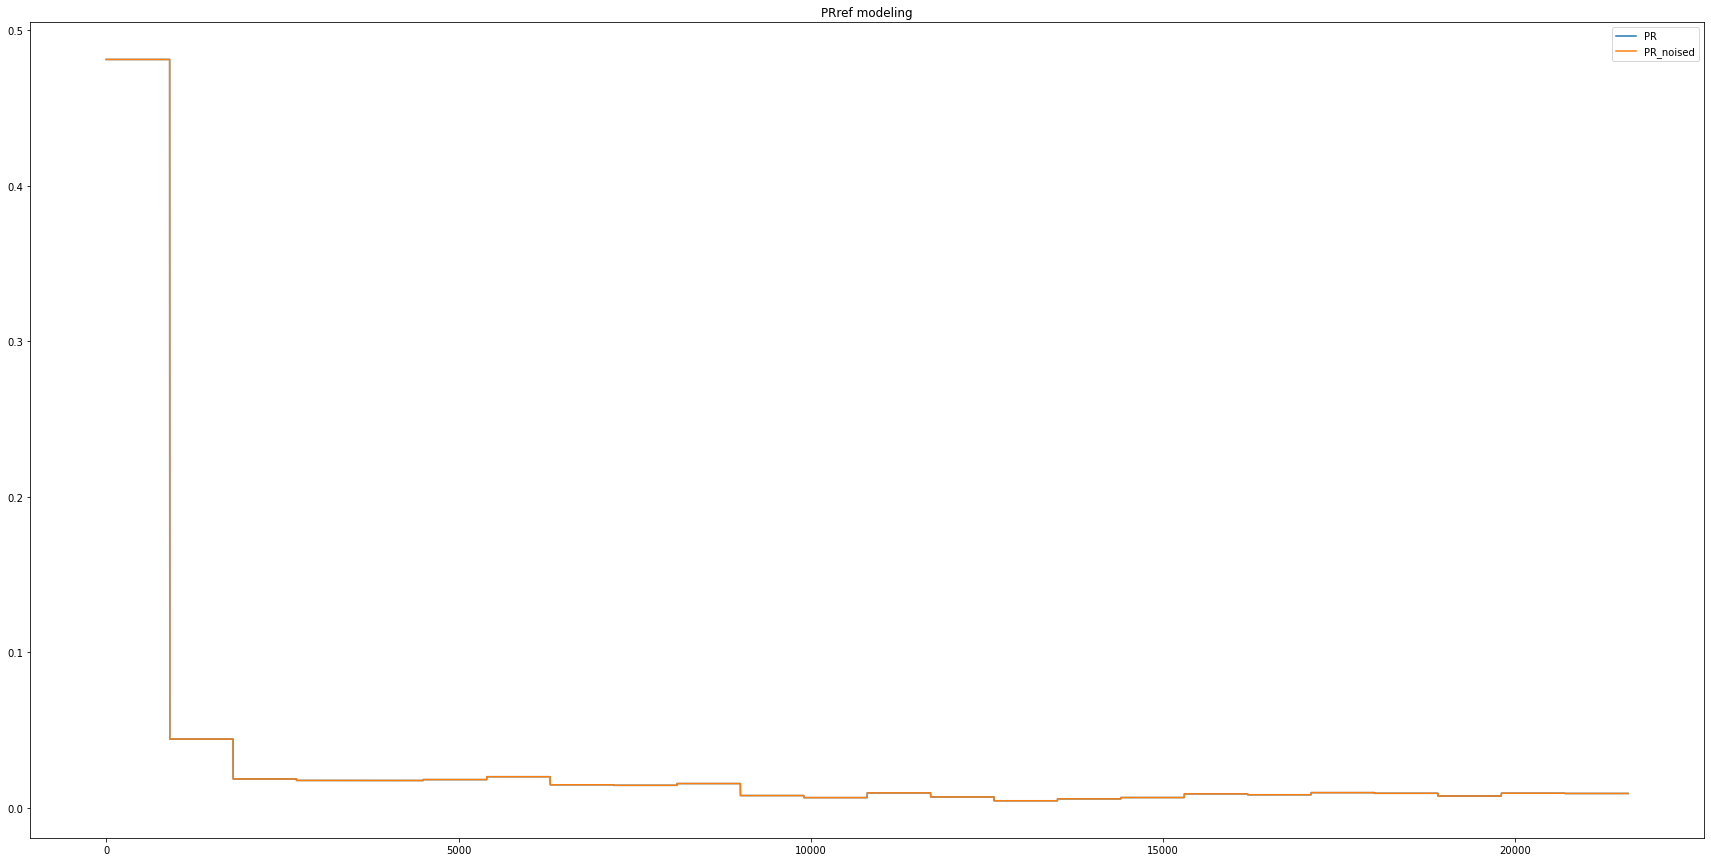

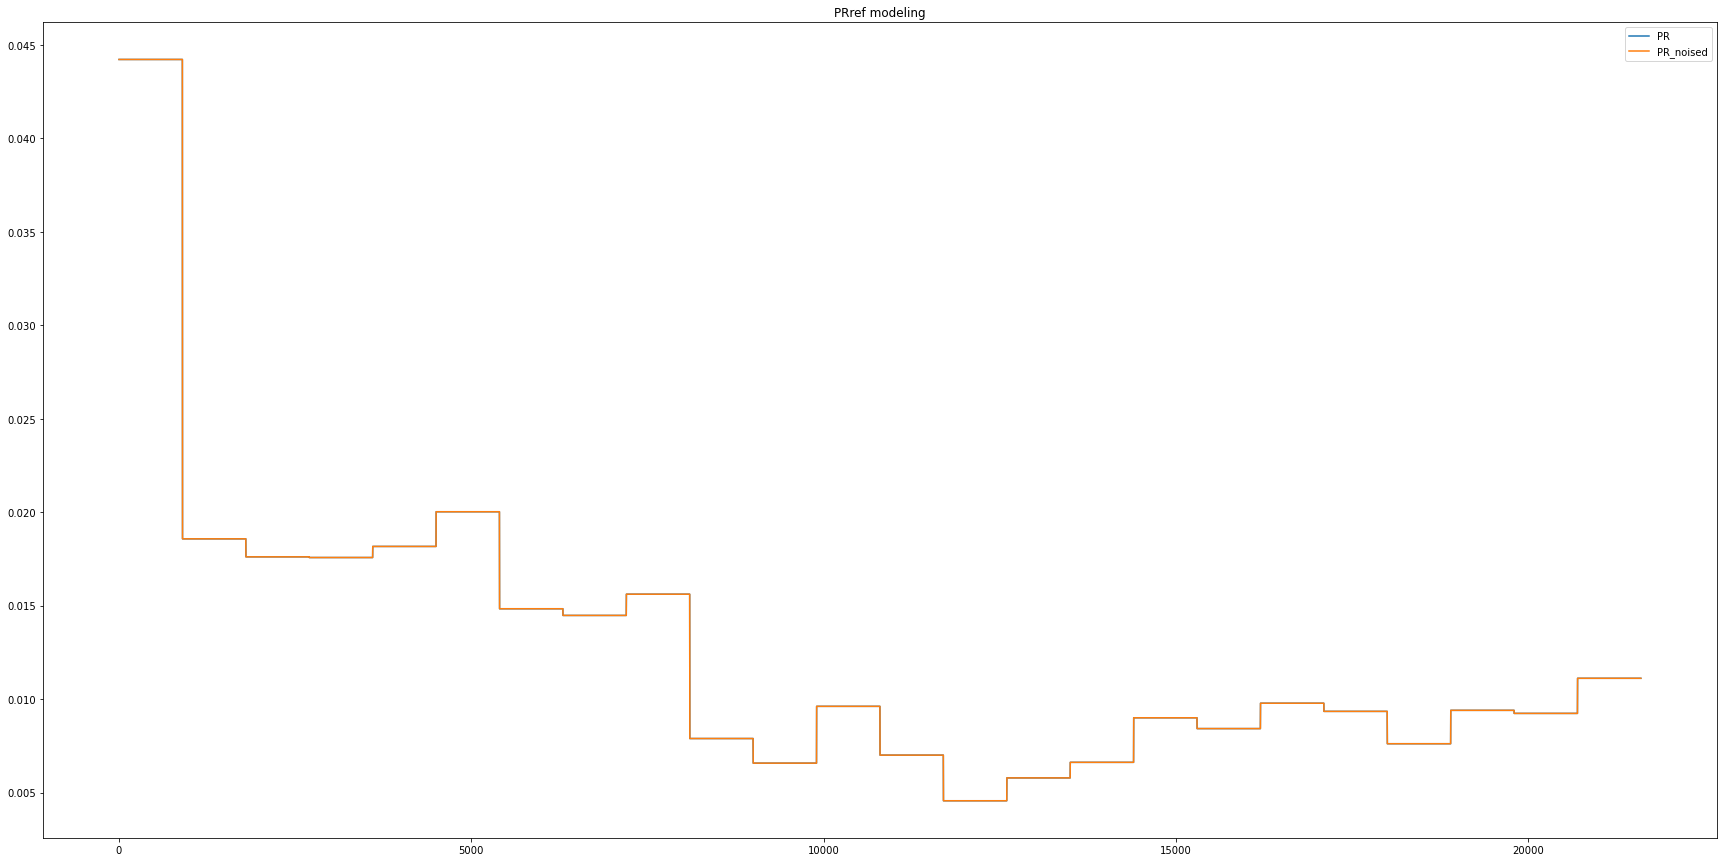

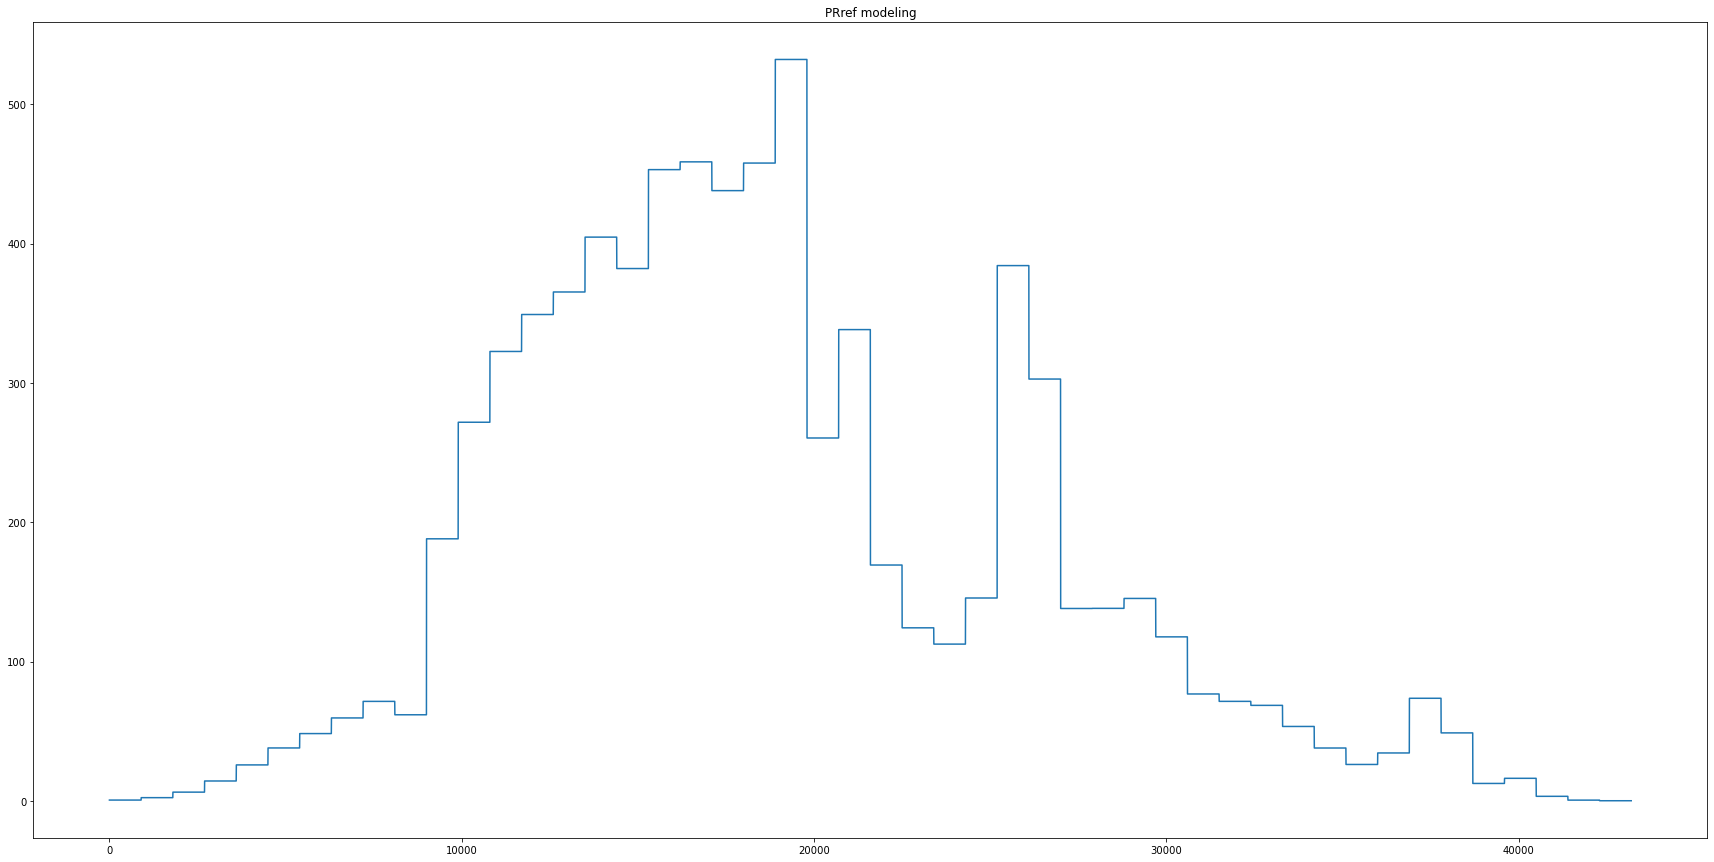

In [6]:
simulate_PRref_generation(simulation_time = 60 * 60 * 12, delta_t=1, Delta_t = 15*60)